<a href="https://colab.research.google.com/github/nitajadav8/Legal_TextSumm/blob/main/TextProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/justnlp/summarization

/content/drive/MyDrive/justnlp/summarization


# Train Data

In [3]:
import json
import pandas as pd
def load_jsonl(path):
    records = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            records.append(json.loads(line))
    return pd.DataFrame(records)

train_path='./dataset/train/train_judg.jsonl'
judg=load_jsonl(train_path)

In [ ]:
judg.head()

ID                                           Judgment
0    id_10  Case :- WRIT - C No. - 11383 of 2023\nPetition...
1  id_1000  Versus\nAppearance:\nand\nDate : 22/09/2023\n1...
2  id_1001  Non-Reportable\nCriminal Appeal No._________ o...
3  id_1002  ---- Appellant\nVersus\nUmesh Sharma S/o Late...
4  id_1003  1Whether Reporters of Local Papers may be allo...

In [ ]:
judg.shape

(1200, 2)

In [4]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:

judg["sentence_count"] = judg["Judgment"].apply(lambda x: len(nltk.sent_tokenize(x)))
judg["unique_token_count"] = judg["Judgment"].apply(
    lambda x: len(set(nltk.word_tokenize(x.lower())))
)
print(judg[["ID", "sentence_count", "unique_token_count"]])

           ID  sentence_count  unique_token_count
0       id_10             258                 725
1     id_1000              51                 459
2     id_1001              56                 515
3     id_1002              79                 680
4     id_1003              60                 585
...       ...             ...                 ...
1195   id_995             309                1563
1196   id_996             346                1508
1197   id_997              33                 390
1198   id_998              80                 482
1199   id_999             100                 572

[1200 rows x 3 columns]


In [7]:
judg['Judgment'].isnull().sum()

np.int64(0)

In [12]:
duplicates = judg[judg.duplicated(subset=["ID", "Judgment"], keep=False)]
len(duplicates)

0

In [13]:
print(judg['sentence_count'].min())
print(judg['sentence_count'].max())
print(judg['sentence_count'].mean())

1
5690
284.4691666666667


In [9]:
all_tokens = judg["Judgment"].apply(lambda x: nltk.word_tokenize(x.lower()))
judg_vocab = set([token for row in all_tokens for token in row])


In [15]:
len(judg_vocab)

214204

In [16]:
train_ref_path='./dataset/train/train_ref_summ.jsonl'
ref=load_jsonl(train_ref_path)

In [17]:
ref.head()

ID                                            Summary
0    id_10  The Allahabad High Court on Thursday stayed th...
1  id_1000  A convict in Gujarat who had secured bail in 2...
2  id_1001  A police officer failing in their fundamental ...
3  id_1002  The Chhattisgarh High Court recently observed ...
4  id_1003  The Gujarat High Court recently quashed a Firs...

In [18]:
ref.shape

(1200, 2)

In [19]:
ref['Summary'].isnull().sum()

np.int64(0)

In [20]:
duplicates = ref[ref.duplicated(subset=["ID", "Summary"], keep=False)]
len(duplicates)

0

In [39]:
ref['word']=ref['Summary'].apply(lambda x: len(nltk.word_tokenize(x)))
print(ref['word'].mean())
print(ref['word'].min())
print(ref['word'].max())

609.9591666666666
29
2412


In [22]:

ref["s_sentence_count"] = ref["Summary"].apply(lambda x: len(nltk.sent_tokenize(x)))
ref["s_unique_token_count"] = ref["Summary"].apply(
    lambda x: len(set(nltk.word_tokenize(x.lower())))
)
print(ref[["ID", "s_sentence_count", "s_unique_token_count"]])

           ID  s_sentence_count  s_unique_token_count
0       id_10                22                   305
1     id_1000                17                   215
2     id_1001                17                   239
3     id_1002                17                   191
4     id_1003                16                   234
...       ...               ...                   ...
1195   id_995                26                   284
1196   id_996                20                   293
1197   id_997                18                   216
1198   id_998                14                   213
1199   id_999                23                   214

[1200 rows x 3 columns]


In [24]:
print(ref['s_unique_token_count'].min())
print(ref['s_unique_token_count'].max())
print(ref['s_unique_token_count'].mean())

22
549
243.5975


In [25]:
print(ref['s_sentence_count'].min())
print(ref['s_sentence_count'].max())
print(ref['s_sentence_count'].mean())

1
73
19.948333333333334


In [27]:
s_all_tokens = ref["Summary"].apply(lambda x: nltk.word_tokenize(x.lower()))
sum_vocab = set([token for row in s_all_tokens for token in row])
len(sum_vocab)

24913

In [28]:
sum_vocab

{'gole',
 'grants-in-aid',
 'vahana',
 'defended',
 'hurriedly',
 'agave',
 'ananga',
 'mischievously',
 'chhanaji',
 'persuaded',
 'card-holders',
 'shawali',
 'represent',
 'leaders',
 '2.9.22',
 'pursuance',
 'contracts/projects',
 'spread',
 '7/23',
 'goddess',
 'medico-legal',
 'non-fulfilment',
 'parvathi',
 'smoke',
 'furnished',
 'hours/',
 'indirapuram',
 'clinch',
 'contradict',
 'countries',
 'jangam',
 'filed',
 'shahenshah',
 'implausibly',
 'disadvantages',
 'foetus',
 'yards',
 'bls-3',
 'tapas',
 '14.10.2023',
 'pistol/revolver',
 'reactionary',
 'viral',
 'abilities',
 'spiked',
 '18',
 'government-owned',
 'behaviours',
 'overheard',
 'repentance',
 'mysore',
 'paramilitary',
 'bedi',
 'navroz',
 'memorial',
 'mz',
 'deflection',
 'blamed',
 'inhuman',
 'rescind',
 'aliza',
 'prashansa',
 'firm',
 'hand',
 'evidence/depositions',
 'editing',
 'authored',
 'else',
 'jalanapurkar',
 'decisive',
 'share-holders',
 'zs',
 'gist',
 'erp',
 'neeha',
 'restrict',
 'internshi

In [29]:
# Common words
common_vocab = judg_vocab & sum_vocab

# Words only in judgments (less important for summaries)
extra_judg_vocab = judg_vocab - sum_vocab


In [31]:
len(common_vocab)

22358

In [32]:
len(extra_judg_vocab)

191846

In [33]:
extra_judg_vocab

{'ground…the',
 'c0psince',
 'dorroboratlon',
 'niko',
 'allahaba',
 'ors.12',
 'authoris',
 'valve',
 '27/3/2021',
 '‗arbitral',
 'personbe',
 'oréal',
 '-law',
 '-equipped',
 'atalls',
 'dccisions',
 '14th',
 'pe4',
 '963/2021',
 'jordan',
 'assassinction',
 'upi/023719158414/upi/yashpatil00',
 'secondly.─engages',
 'bevond',
 'catch-',
 'veblokel',
 'pacifists',
 'case-laws',
 'exhs.46',
 '24.1.',
 'fatherwas',
 'ictur',
 'age:23',
 'card/iciciemi',
 'cloncnt',
 '35.17',
 '80,180/',
 'defrauds',
 'daphne',
 'denial.',
 'ls3',
 'wasnoted',
 '//www.hind',
 'carpets',
 '27.06.2013',
 '1-wife',
 '19/21',
 'lnpursuance',
 'cw8',
 'janakpuri',
 'genorolly',
 'synchron',
 'ewaltor',
 'tating',
 'expenditureincurred',
 'inlarrntin5',
 'shutter',
 'prioritizes',
 'made/published/circulated',
 '94-a',
 '-possessed',
 '―obc',
 '5.16.',
 '499a',
 'g452en',
 'tpocno',
 '6091-',
 'plotline',
 'nazionale',
 '–hinoo',
 'bonlbapoone',
 '6p8j1y941',
 'sims/numbers',
 'ben',
 'effectivel',
 'dopsorjs'

In [34]:
extra_sum_vocab = sum_vocab - judg_vocab

In [37]:
extra_sum_vocab

{"'chance",
 'sarimol',
 'locals…',
 '5-year-old',
 'context-specific',
 'providence',
 'श्रीमद्भगवद्गीता',
 'jasjit',
 'three-bench',
 "'thought",
 'संस्कृति',
 'agave',
 '69,0000',
 'xfactor',
 'shahnas',
 'card-holders',
 'yudhishthira',
 "'revisited",
 'situations/',
 'non-price',
 'long-time',
 '2.9.22',
 'govenor',
 '9/10.08.2021.the',
 'terror-accused',
 'vinit',
 'danger\xadous',
 '₹50',
 'statutories',
 't1.mylivecricket.club',
 'pic.twitter.com/0iid1smu1i',
 'headless',
 'shivlinga',
 'phanindra',
 'cervelli',
 'multi-purpose',
 'dhankhar',
 '90s',
 'jayanandan',
 'semi-digested',
 "'gaddars",
 'ready-to-use',
 'roughed',
 'pic.twitter.com/2dafakr2rf',
 'mouth-watering',
 'beloning',
 'hours/',
 '8-page',
 '45-page',
 'kiren',
 '₹1,500',
 '65000',
 'frl-reliance',
 'victim-woman',
 'top-notch',
 'suit.civil',
 'there\u200b',
 'auto-parts',
 'sherbir',
 '30,2022',
 'owner/occupier',
 'reagrding',
 'www.burgerkingind.co.in',
 '₹24,470',
 'wanted-accused',
 'bls-3',
 "'last",
 '

In [41]:
#reliability check of legal pegasus tokenizer for the dataset
from transformers import PegasusTokenizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm

tokenizer = PegasusTokenizer.from_pretrained("nsi319/legal-pegasus")


dataset_vocab = set()
for text in list(judg["Judgment"]) + list(ref["Summary"]):
    dataset_vocab.update(word_tokenize(text.lower()))

# Stats
single_token = []
split_token = []

for word in tqdm(dataset_vocab, desc="Checking coverage"):
    tokens = tokenizer.tokenize(word)
    if len(tokens) == 1:
        single_token.append(word)
    else:
        split_token.append((word, tokens))

print("\n Coverage Report")
print(f"Total unique words in dataset vocab: {len(dataset_vocab)}")
print(f"Words covered as single token: {len(single_token)} ({len(single_token)/len(dataset_vocab)*100:.2f}%)")
print(f"Words split into multiple tokens: {len(split_token)} ({len(split_token)/len(dataset_vocab)*100:.2f}%)")

print("\nExamples of words split into multiple tokens:")
for w, t in split_token[:20]:
    print(f"{w} -> {t}")

Checking coverage: 100%|██████████| 216759/216759 [00:06<00:00, 35667.97it/s]


 Coverage Report
Total unique words in dataset vocab: 216759
Words covered as single token: 23125 (10.67%)
Words split into multiple tokens: 193634 (89.33%)

Examples of words split into multiple tokens:
ground…the -> ['▁ground', '...', 'the']
c0psince -> ['▁c', '0', 'p', 'since']
dorroboratlon -> ['▁do', 'r', 'robo', 'rat', 'lon']
niko -> ['▁n', 'iko']
allahaba -> ['▁all', 'a', 'haba']
ors.12 -> ['▁or', 's', '.', '12']
authoris -> ['▁author', 'is']
27/3/2021 -> ['▁27', '/3', '/', '2021']
‗arbitral -> ['▁', '̳', 'ar', 'bit', 'ral']
personbe -> ['▁person', 'be']
oréal -> ['▁or', 'é', 'al']
-law -> ['▁-', 'law']
-equipped -> ['▁-', 'equipped']
atalls -> ['▁at', 'all', 's']
dccisions -> ['▁dc', 'cision', 's']
14th -> ['▁14', 'th']
pe4 -> ['▁pe', '4']
963/2021 -> ['▁96', '3/', '2021']
assassinction -> ['▁assassin', 'ction']
upi/023719158414/upi/yashpatil00 -> ['▁up', 'i', '/', '023', '719', '158', '414', '/', 'up', 'i', '/', 'y', 'ash', 'pati', 'l', '00']


In [42]:
#cleaning data
import re
def clean_text(df, column):
  df[column]=df[column].apply(lambda x: x.lower())
  df[column] = df[column].apply(lambda x: re.sub(r'http|https:\S+|www\.\S+', '', x))
  df[column] = df[column].apply(lambda x:re.sub(r'[^\x00-\x7F]+', ' ', x))
  df[column] = df[column].apply(lambda x: re.sub(r'[^a-z0-9.?\s]', ' ', x))
  df[column] = df[column].apply(lambda x: re.sub(r'-\s*\n\s*', '', x))
  df[column] = df[column].apply(lambda x: re.sub(r'\n{2,}', '\n\n', x))
  df[column]=df[column].apply(lambda x: re.sub(r'([^\n])\n([^\n])', r'\1 \2',x))
  df[column] = df[column].apply(lambda x:  re.sub(r'[^\x09\x0A\x0D\x20-\x7E]', ' ', x))
  df[column] = df[column].apply(lambda x: re.sub(r"\s+", " ", x))
  print("after cleaning")
  df["word_count"] = df[column].apply(lambda x: len(nltk.word_tokenize(x)))
  df["sentence_count"] = df[column].apply(lambda x: len(nltk.sent_tokenize(x)))
  print(df[["ID", "word_count","sentence_count"]])
  print(df['word_count'].min())
  print(df['word_count'].max())
  print(df['word_count'].mean())
  return df

In [43]:
judg=clean_text(judg,'Judgment')

after cleaning
           ID  word_count  sentence_count
0       id_10        3496             291
1     id_1000        1856              52
2     id_1001        1465              56
3     id_1002        2297              77
4     id_1003        1899              59
...       ...         ...             ...
1195   id_995        7797             256
1196   id_996        8534             268
1197   id_997        1063              27
1198   id_998        2049              57
1199   id_999        2680              82

[1200 rows x 3 columns]
161
140293
7728.201666666667


In [44]:
ref=clean_text(ref,'Summary')

after cleaning
           ID  word_count  sentence_count
0       id_10         727              22
1     id_1000         571              16
2     id_1001         528              17
3     id_1002         423              17
4     id_1003         469              16
...       ...         ...             ...
1195   id_995         707              26
1196   id_996         744              22
1197   id_997         562              18
1198   id_998         452              13
1199   id_999         638              22

[1200 rows x 3 columns]
27
2181
571.2291666666666


In [47]:
all_tokens = judg["Judgment"].apply(lambda x: nltk.word_tokenize(x.lower()))
judg_vocab = set([token for row in all_tokens for token in row])
s_all_tokens = ref["Summary"].apply(lambda x: nltk.word_tokenize(x.lower()))
sum_vocab = set([token for row in s_all_tokens for token in row])

In [49]:
print(len(judg_vocab))
print(len(sum_vocab))

180325
22489


In [48]:
#reliability check of legal pegasus tokenizer for the dataset after cleaning
from transformers import PegasusTokenizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm

tokenizer = PegasusTokenizer.from_pretrained("nsi319/legal-pegasus")


dataset_vocab = set()
for text in list(judg["Judgment"]) + list(ref["Summary"]):
    dataset_vocab.update(word_tokenize(text.lower()))

# Stats
single_token = []
split_token = []

for word in tqdm(dataset_vocab, desc="Checking coverage"):
    tokens = tokenizer.tokenize(word)
    if len(tokens) == 1:
        single_token.append(word)
    else:
        split_token.append((word, tokens))

print("\n Coverage Report after cleaning")
print(f"Total unique words in dataset vocab: {len(dataset_vocab)}")
print(f"Words covered as single token: {len(single_token)} ({len(single_token)/len(dataset_vocab)*100:.2f}%)")
print(f"Words split into multiple tokens: {len(split_token)} ({len(split_token)/len(dataset_vocab)*100:.2f}%)")

print("\nExamples of words split into multiple tokens:")
for w, t in split_token[:20]:
    print(f"{w} -> {t}")

Checking coverage: 100%|██████████| 181712/181712 [00:07<00:00, 24976.43it/s]


 Coverage Report after cleaning
Total unique words in dataset vocab: 181712
Words covered as single token: 22840 (12.57%)
Words split into multiple tokens: 158872 (87.43%)

Examples of words split into multiple tokens:
c0psince -> ['▁c', '0', 'p', 'since']
dorroboratlon -> ['▁do', 'r', 'robo', 'rat', 'lon']
niko -> ['▁n', 'iko']
allahaba -> ['▁all', 'a', 'haba']
ors.12 -> ['▁or', 's', '.', '12']
authoris -> ['▁author', 'is']
personbe -> ['▁person', 'be']
atalls -> ['▁at', 'all', 's']
dccisions -> ['▁dc', 'cision', 's']
14th -> ['▁14', 'th']
pe4 -> ['▁pe', '4']
assassinction -> ['▁assassin', 'ction']
pursuance -> ['▁pur', 'su', 'ance']
bevond -> ['▁be', 'von', 'd']
pacifists -> ['▁pacifist', 's']
veblokel -> ['▁', 've', 'blok', 'el']
exhs.46 -> ['▁ex', 'hs', '.', '46']
24.1. -> ['▁24', '.', '1.']
fatherwas -> ['▁father', 'was']
ictur -> ['▁', 'ic', 'tur']


In [53]:
#compression for summary
def compression_fraction(document, summary):
    doc_len = len(word_tokenize(document))
    sum_len = len(word_tokenize(summary))

    if doc_len == 0:
        return None  # avoid division by zero

    compression = 1 - (sum_len / doc_len)
    return compression


In [ ]:

nltk.download("stopwords")

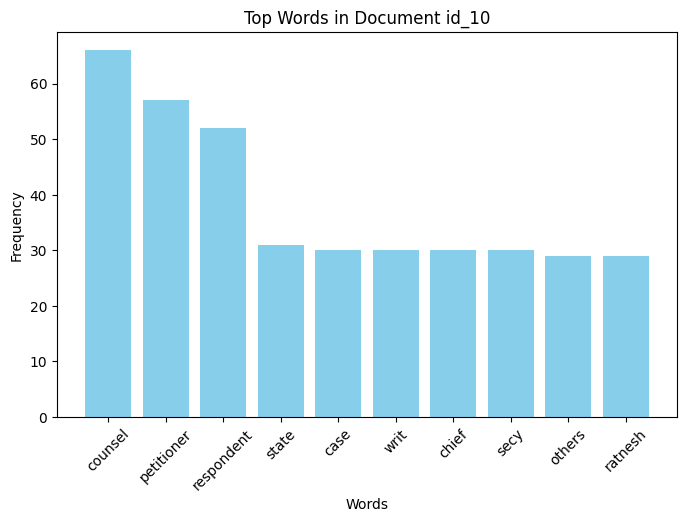

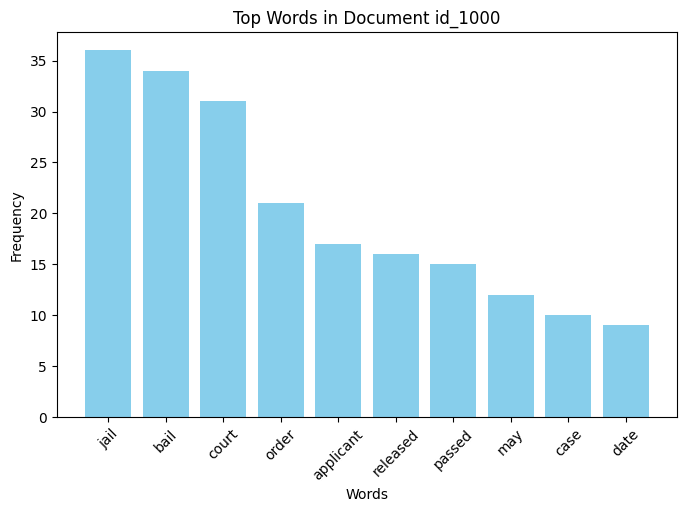

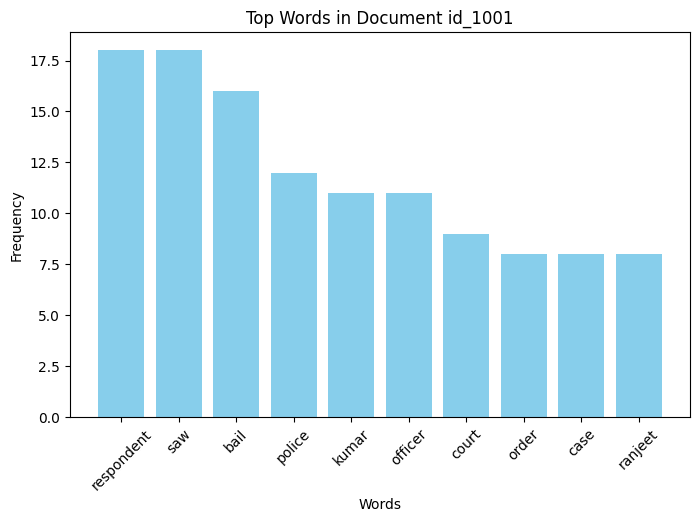

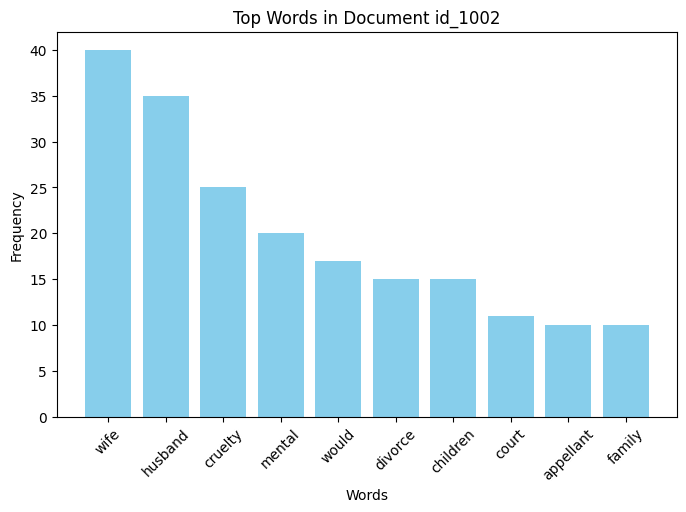

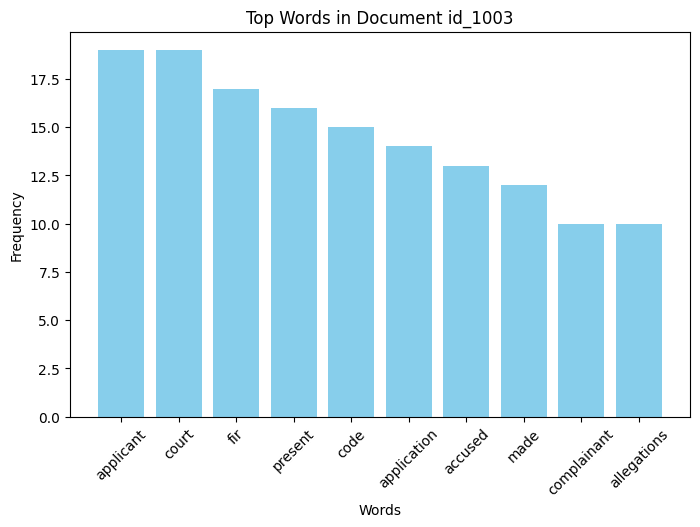

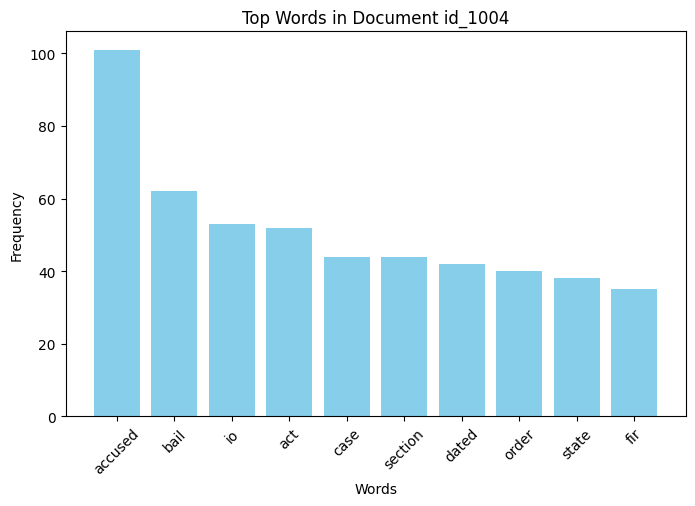

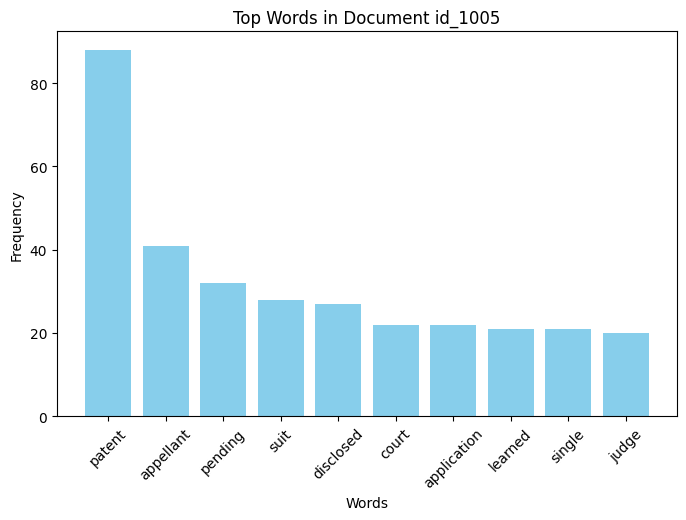

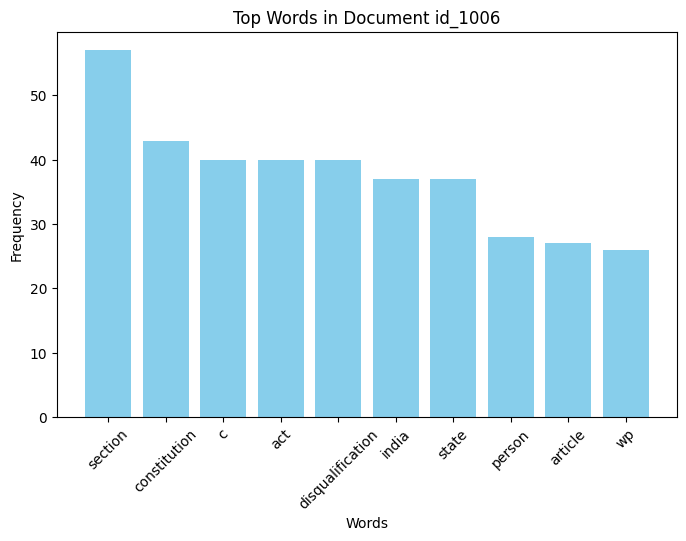

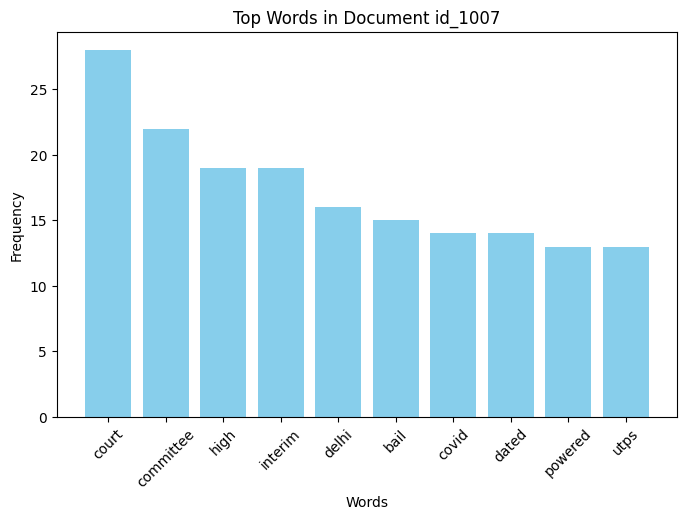

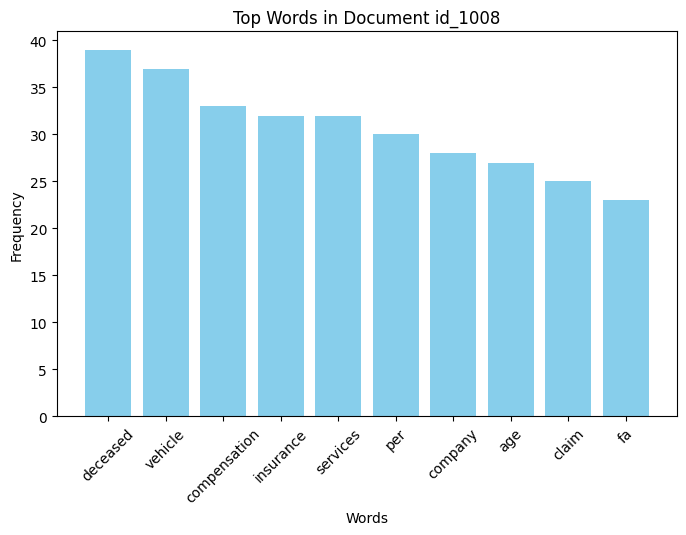

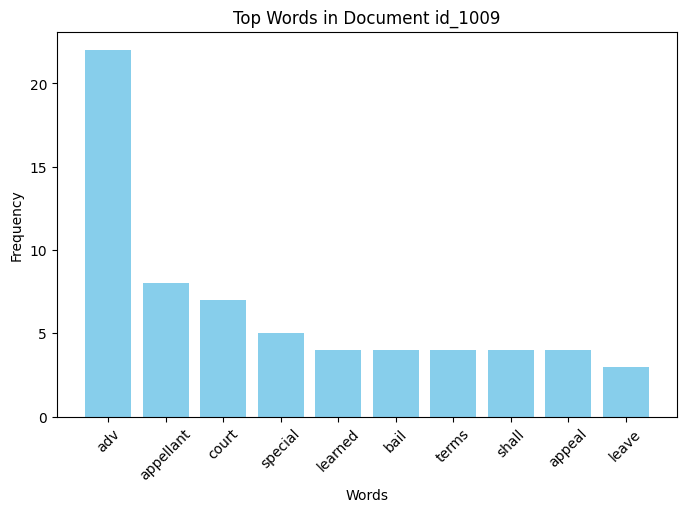

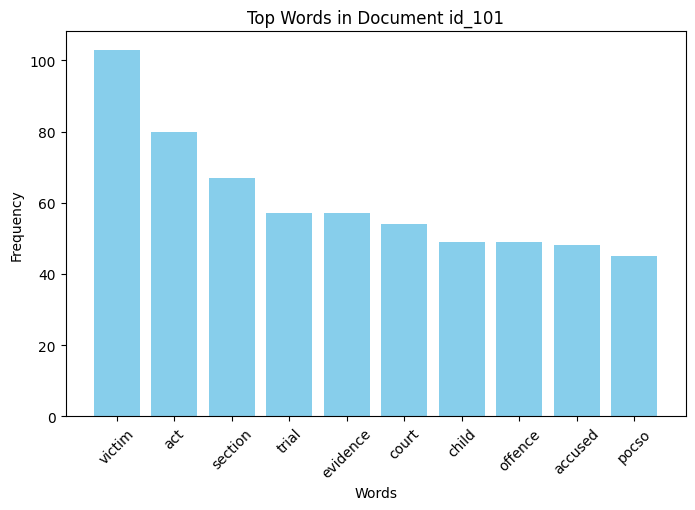

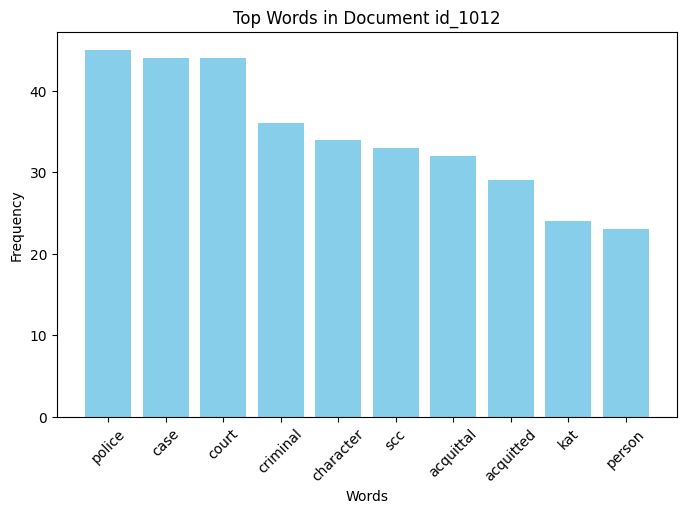

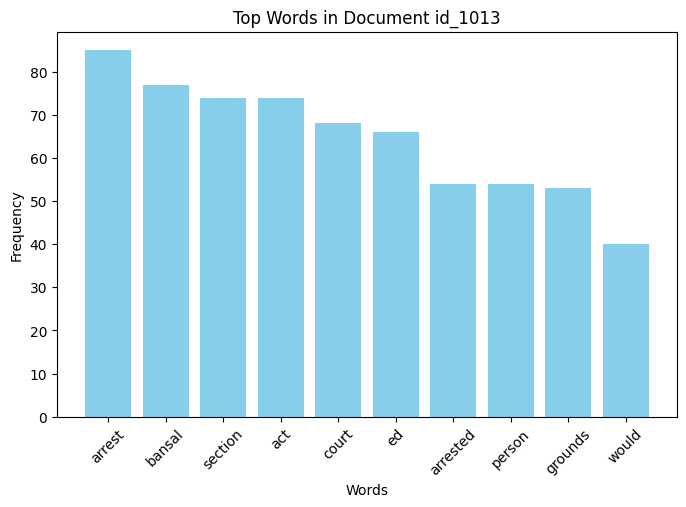

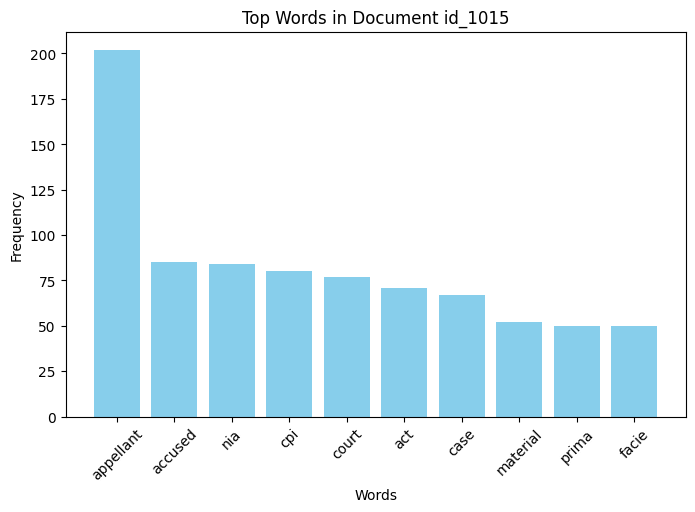

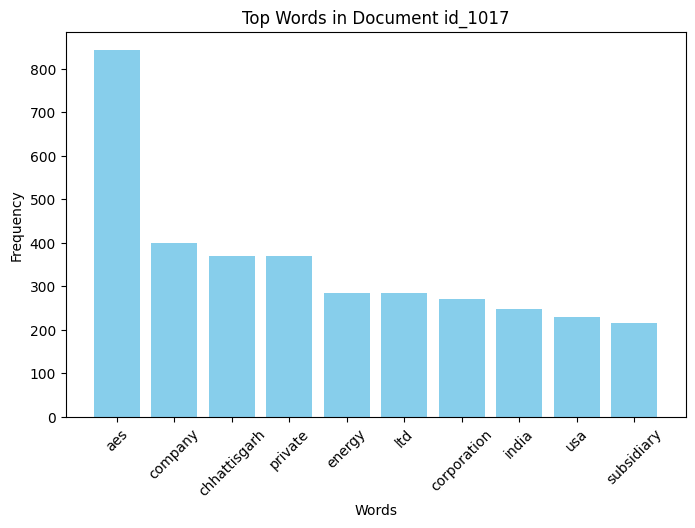

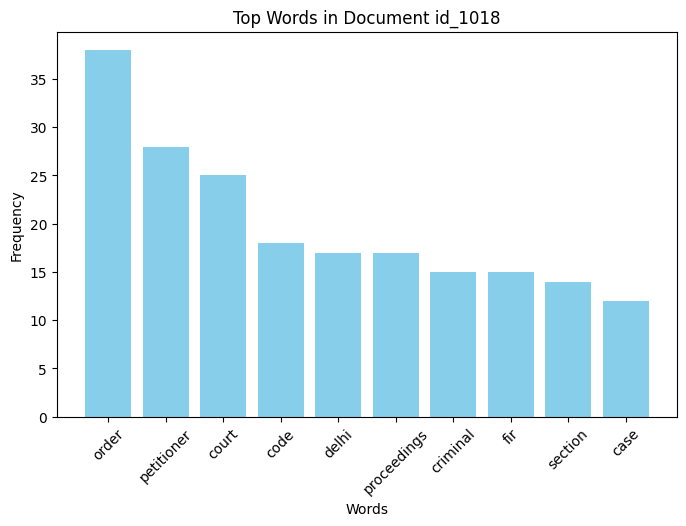

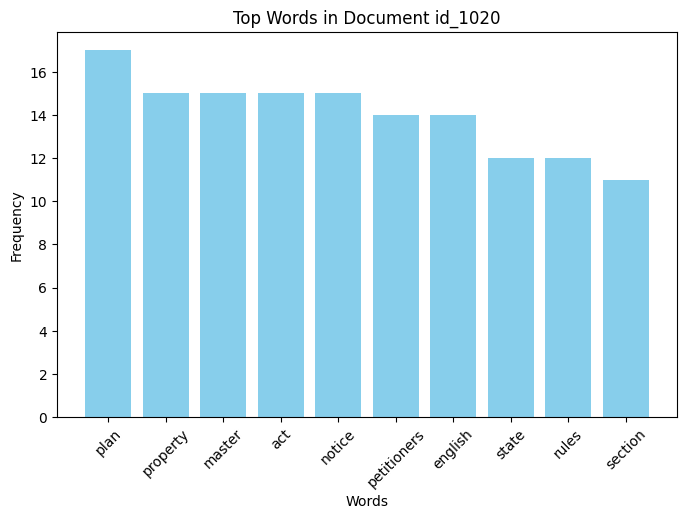

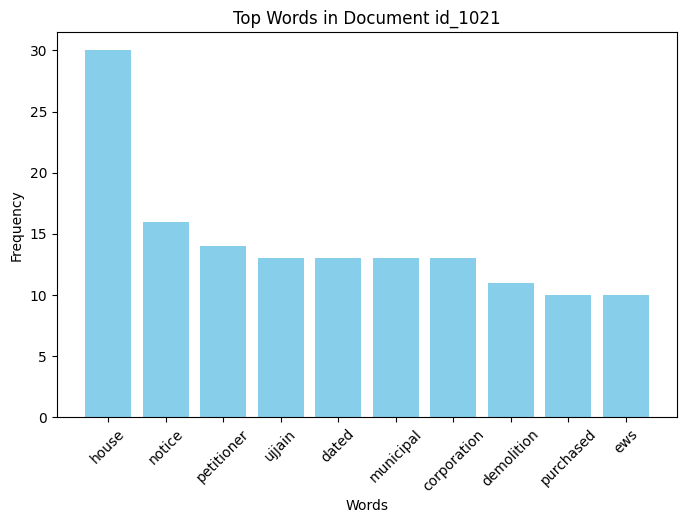

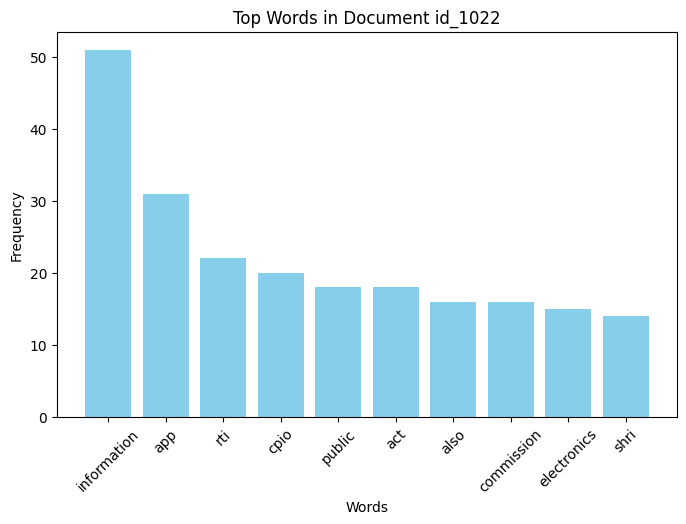

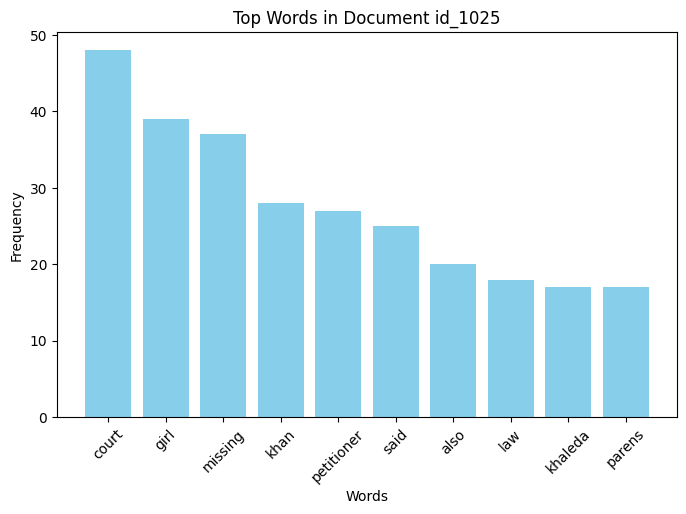

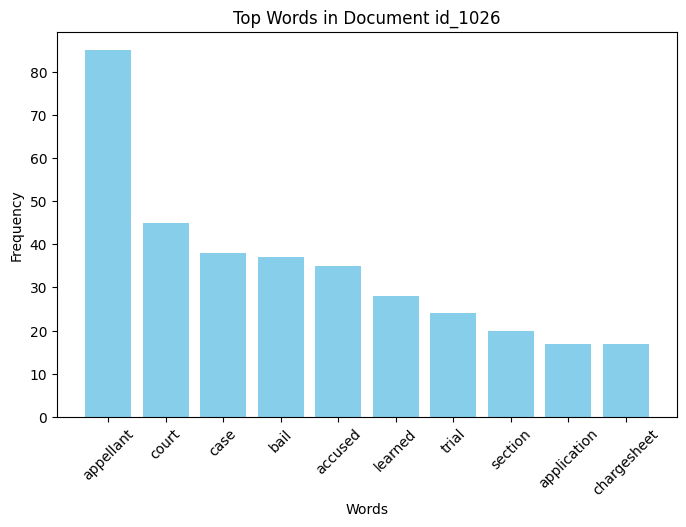

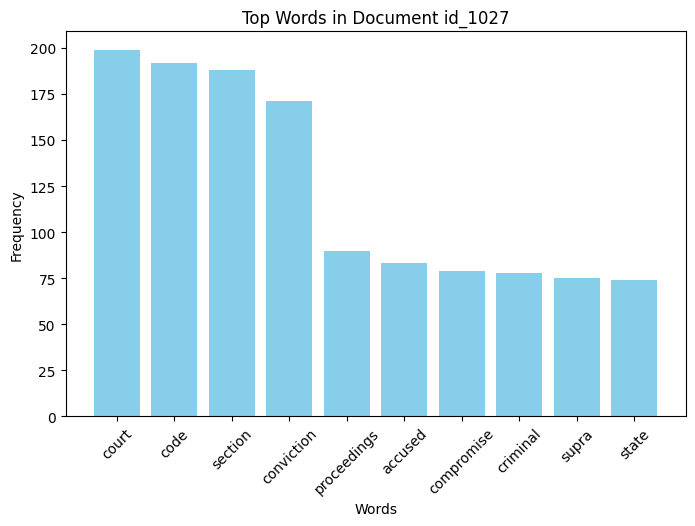

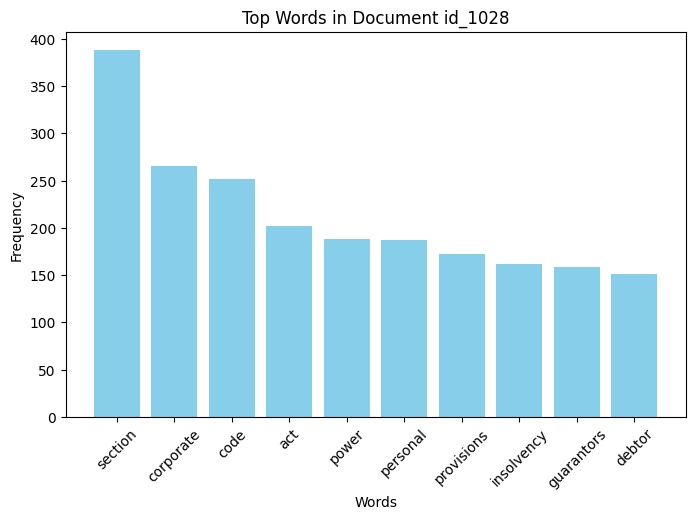

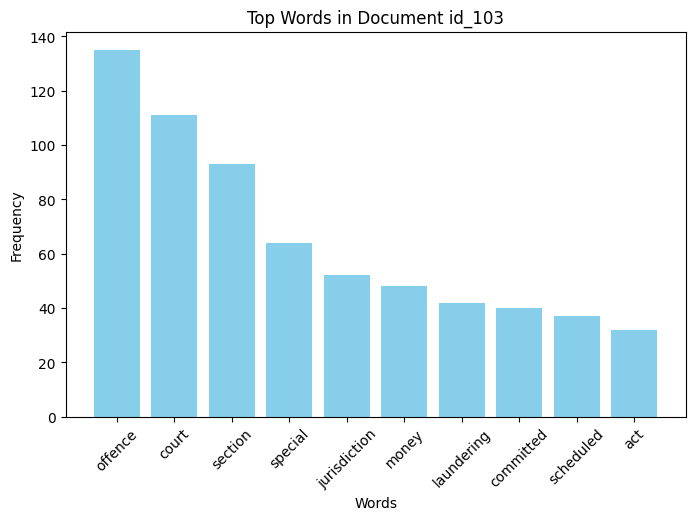

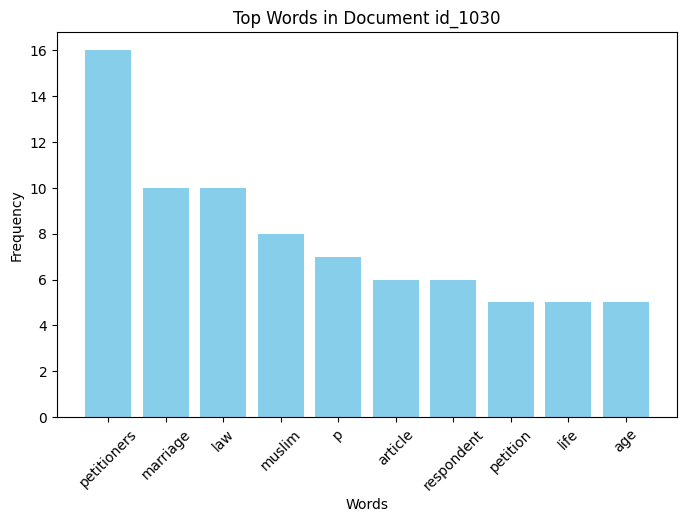

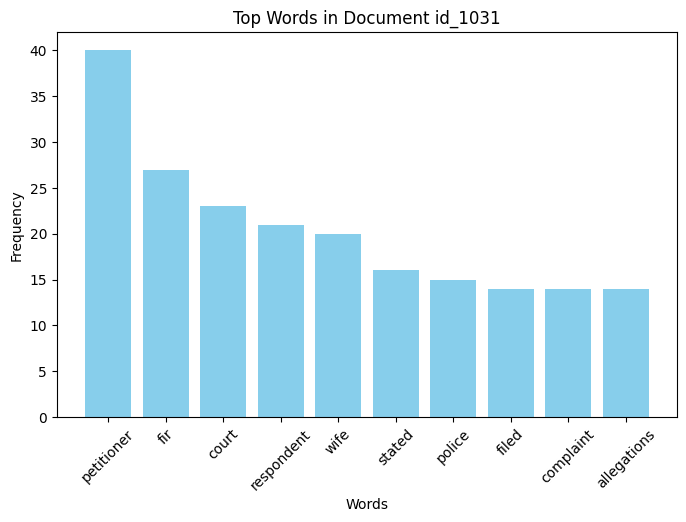

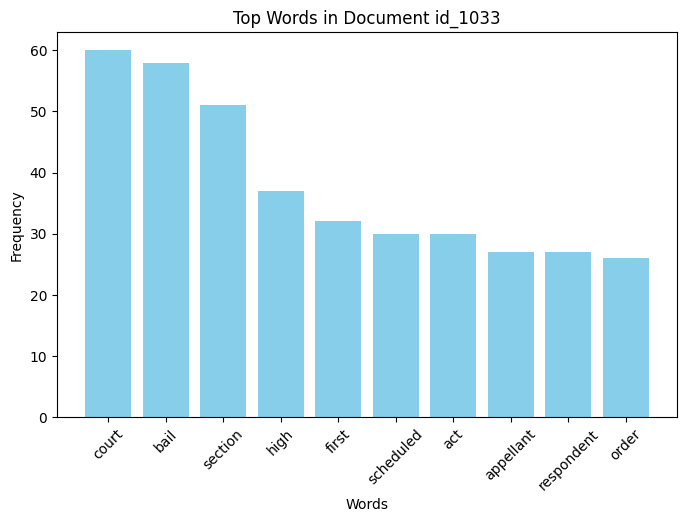

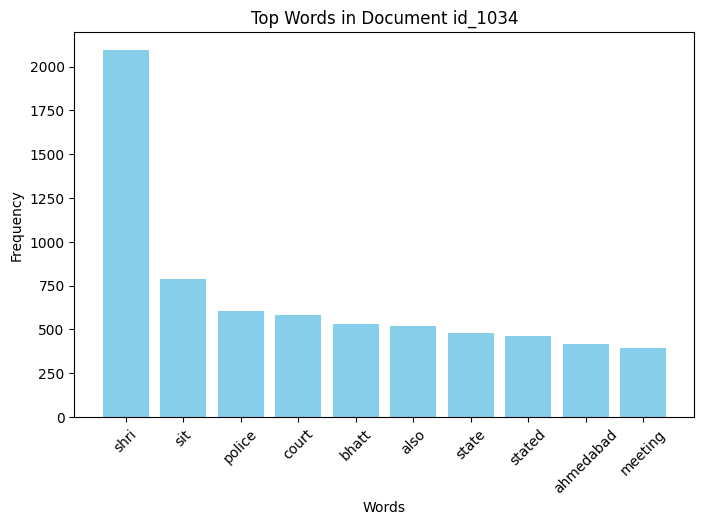

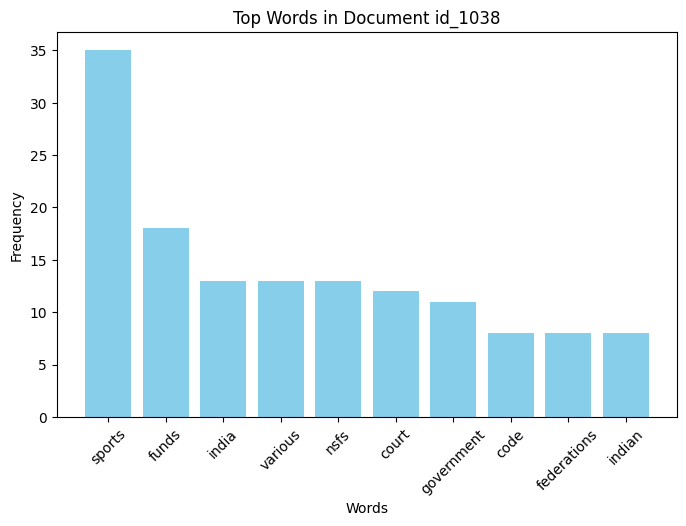

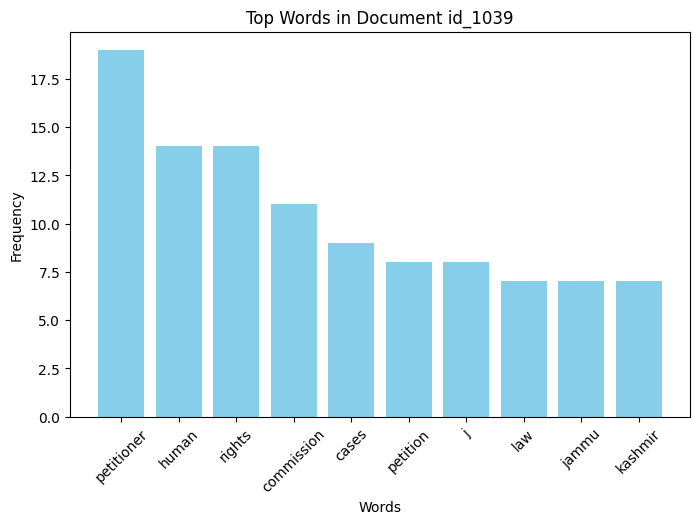

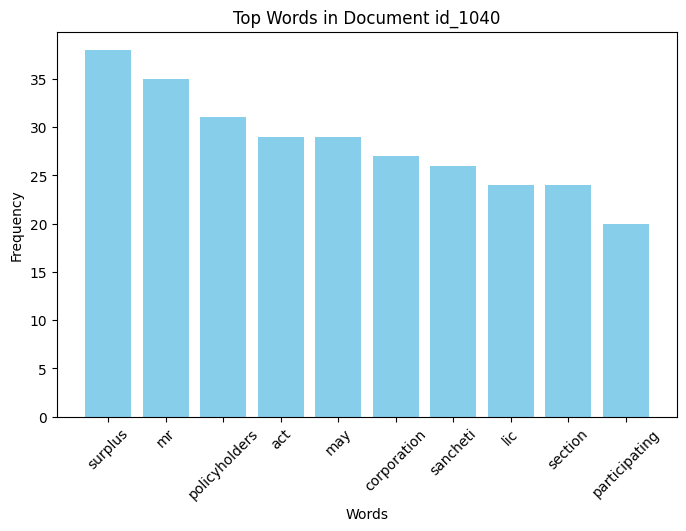

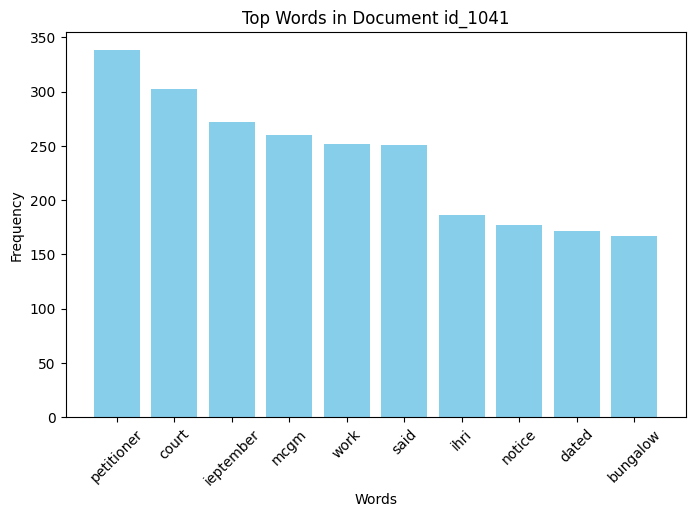

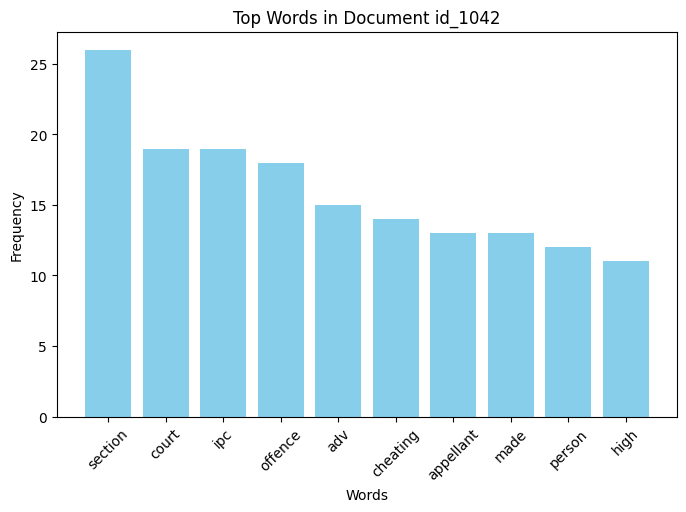

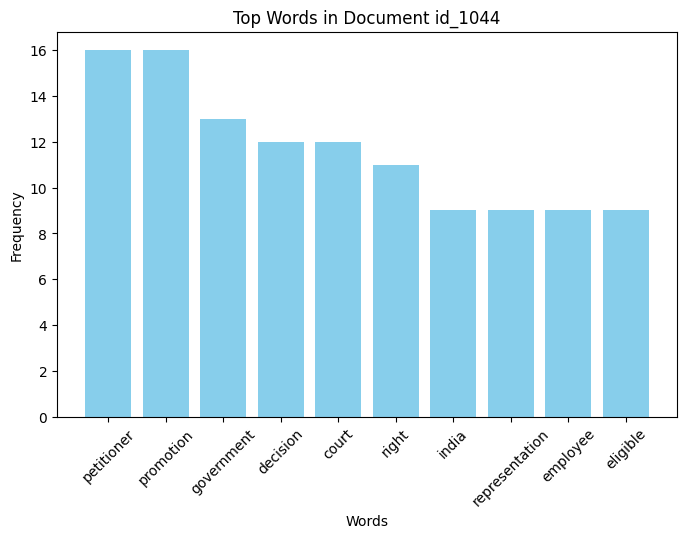

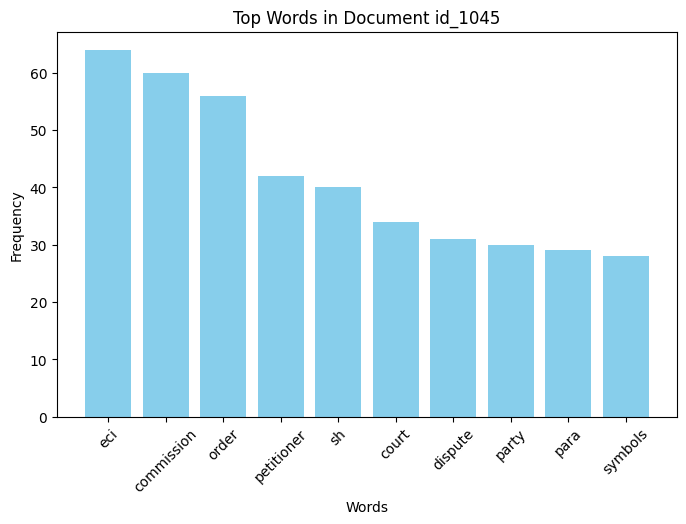

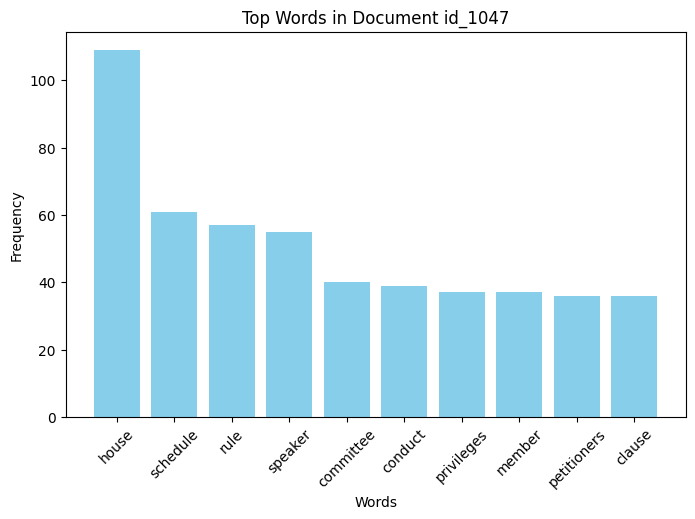

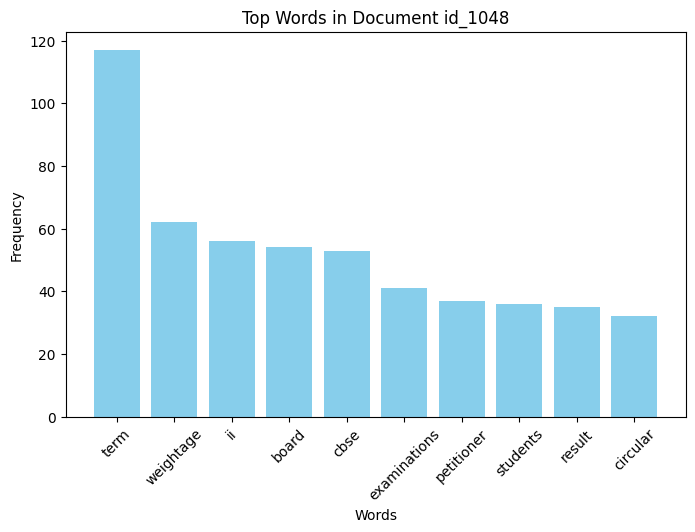

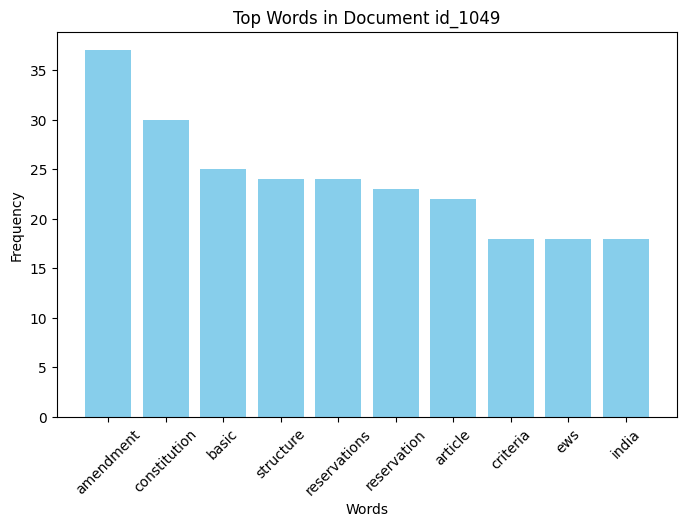

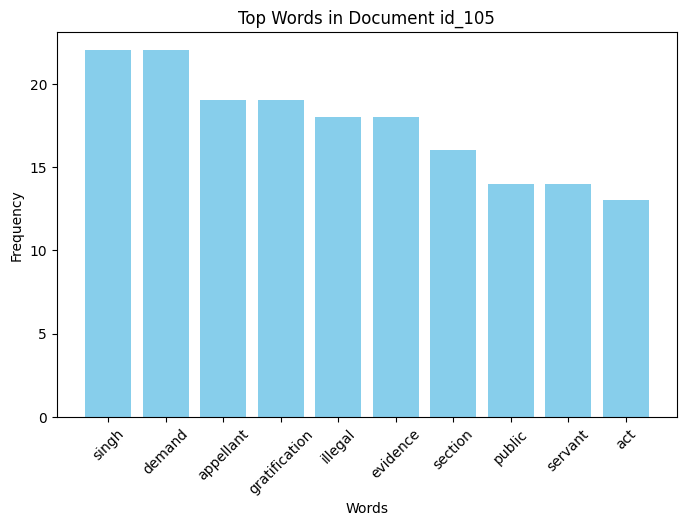

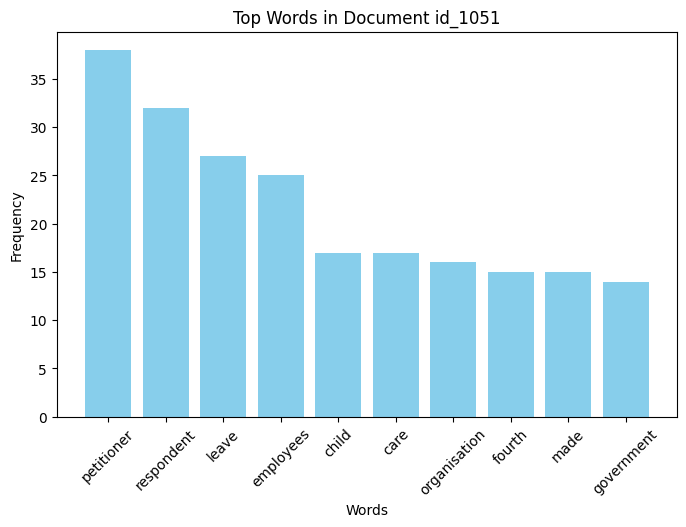

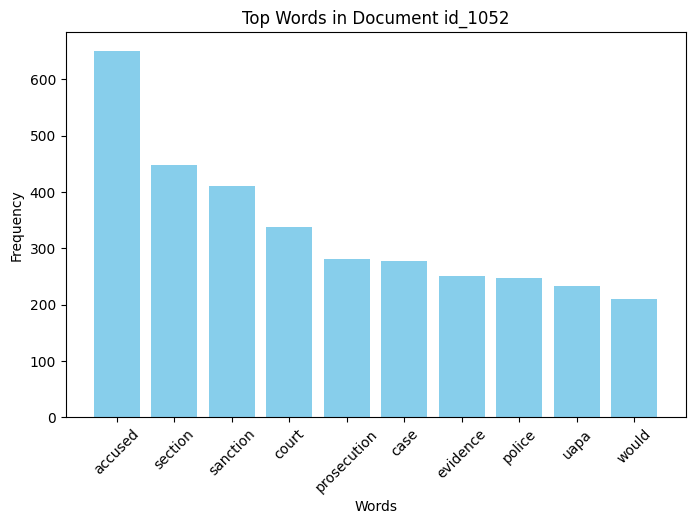

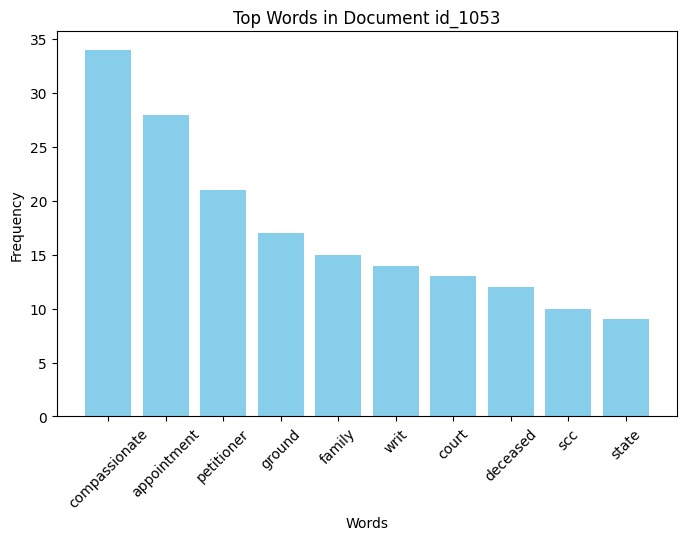

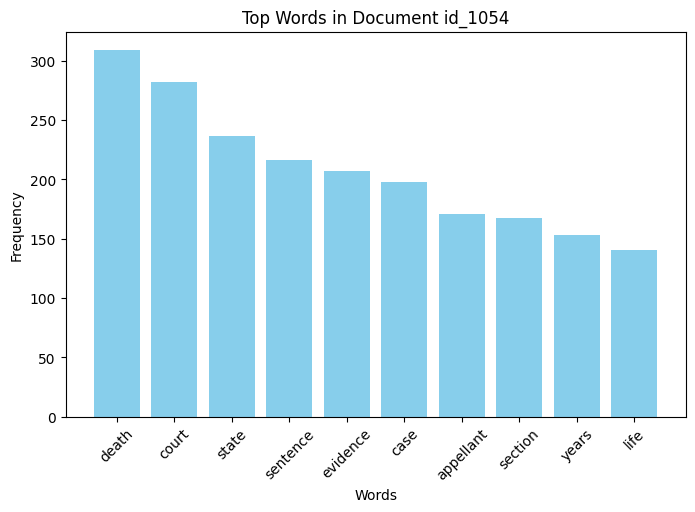

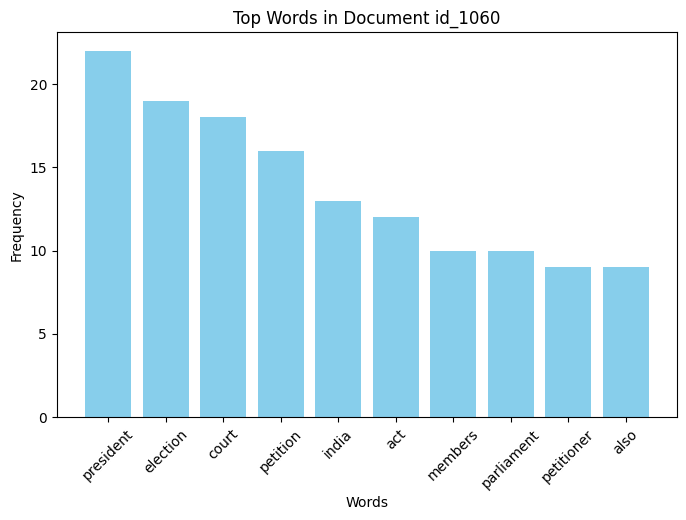

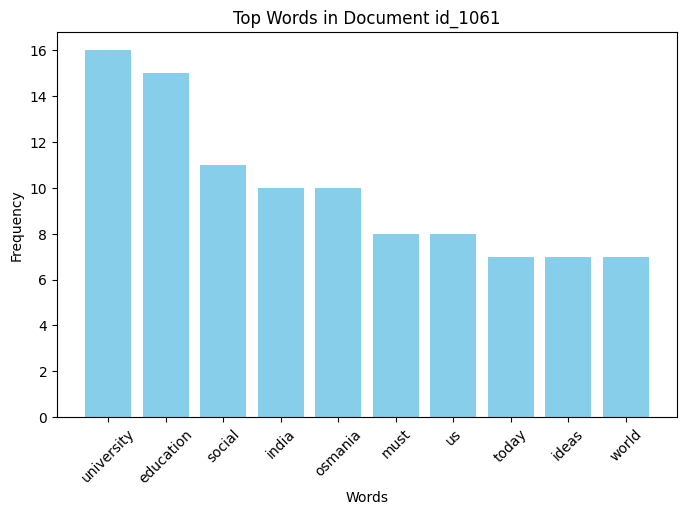

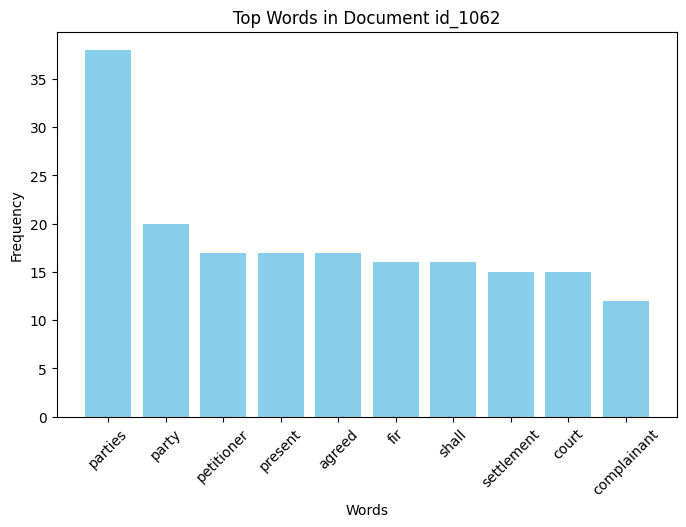

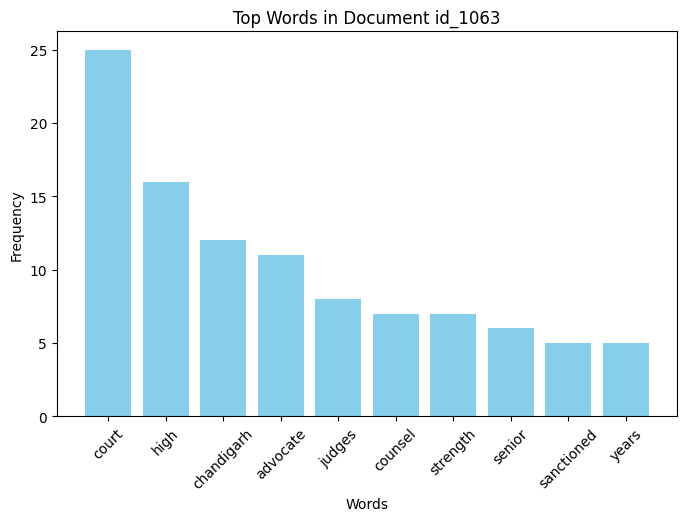

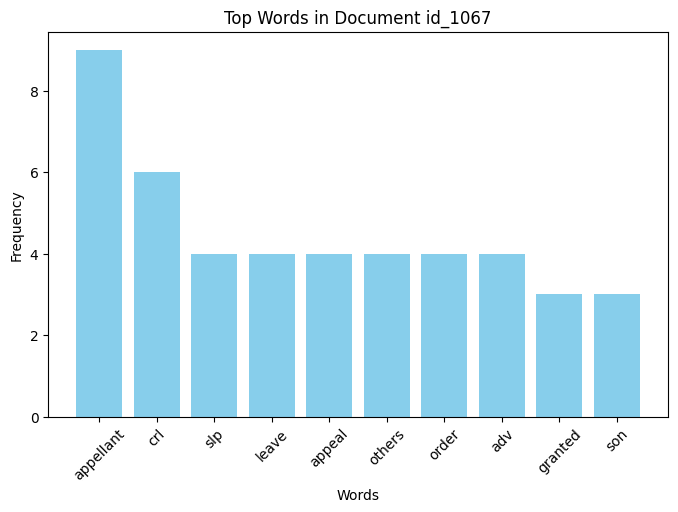

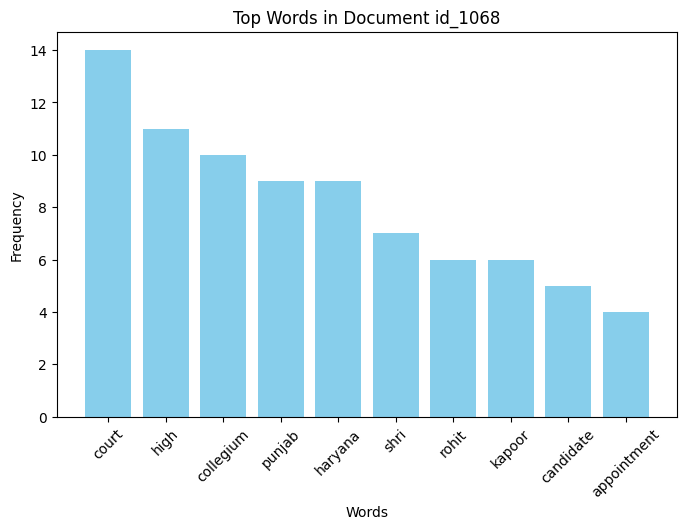

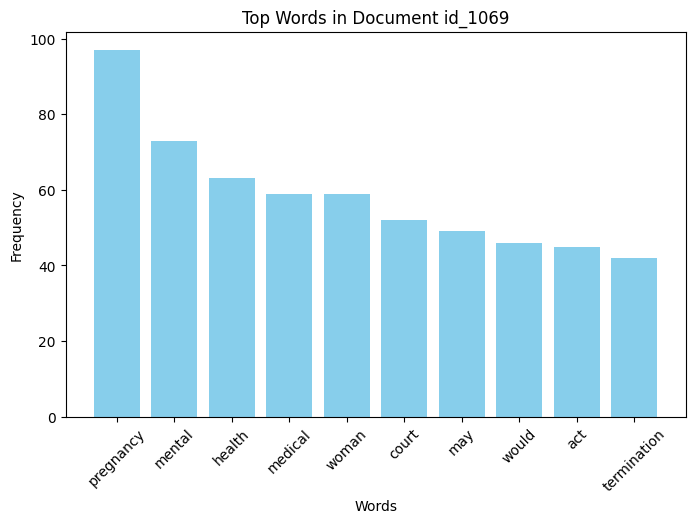

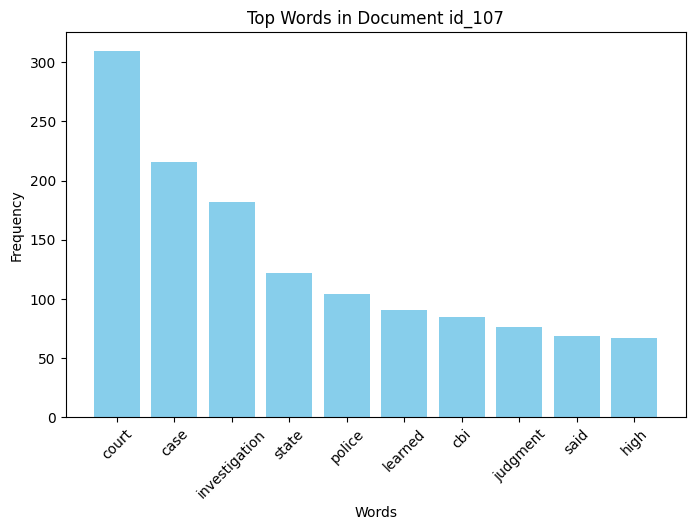

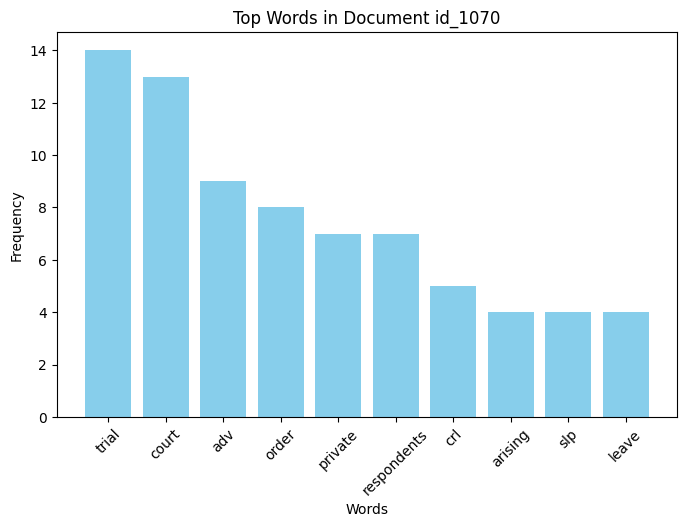

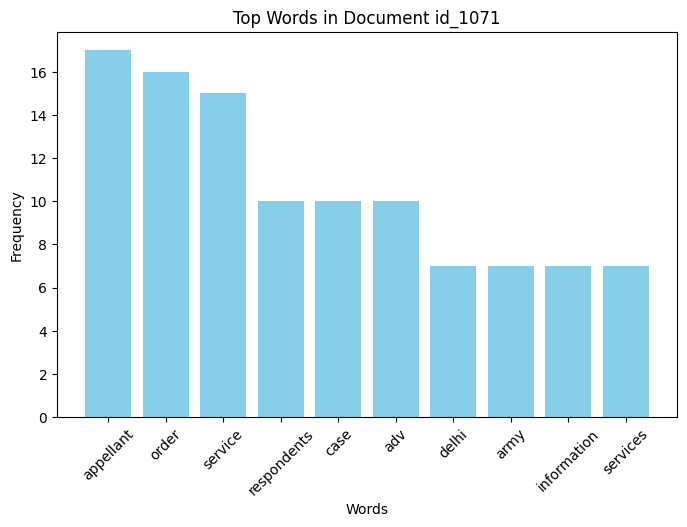

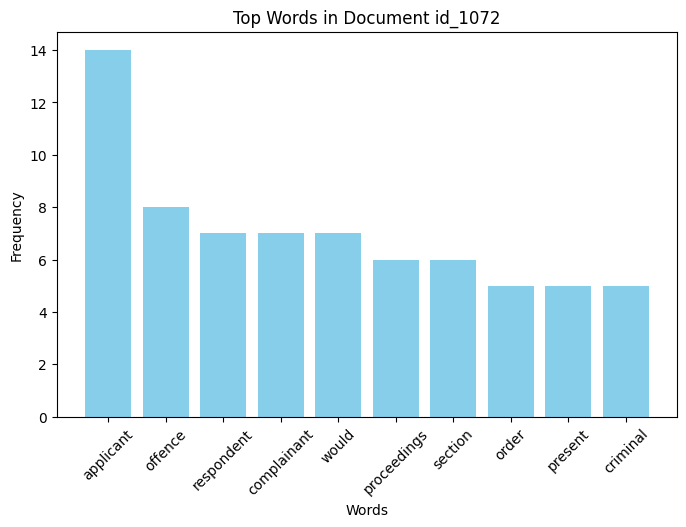

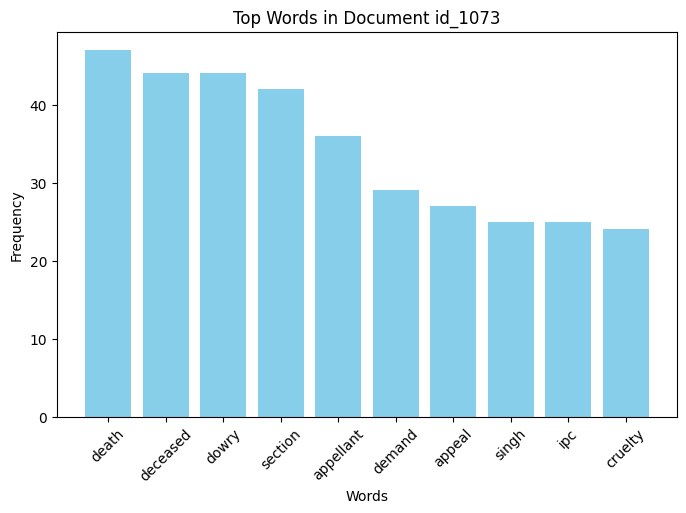

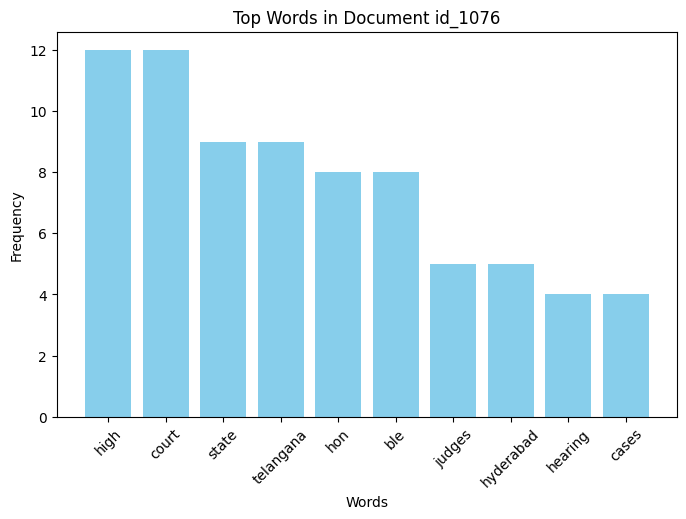

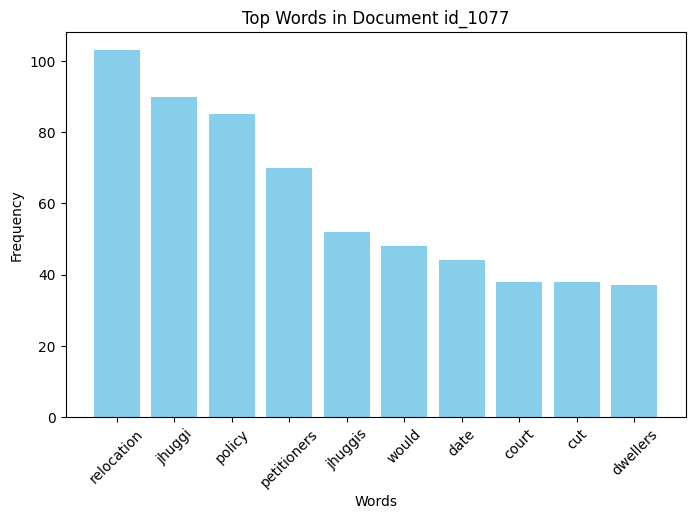

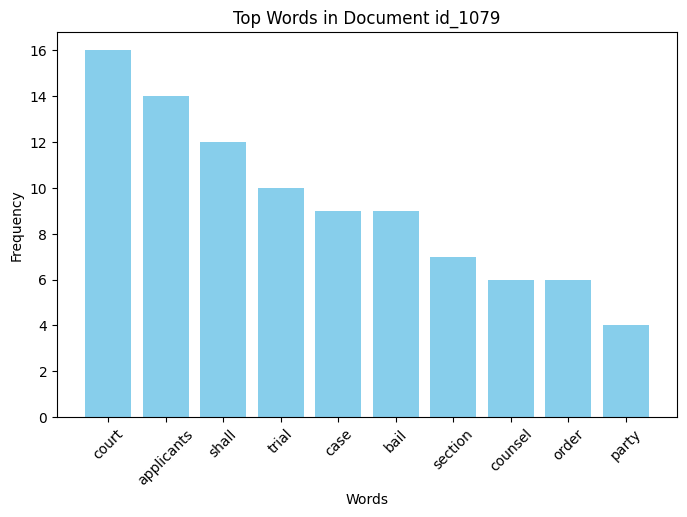

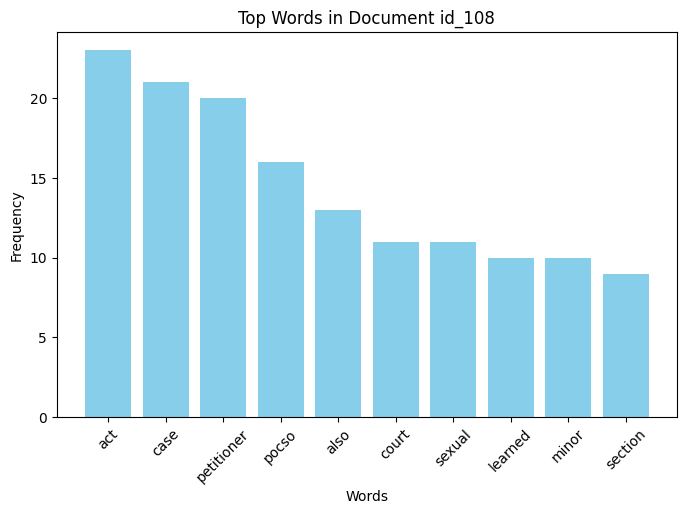

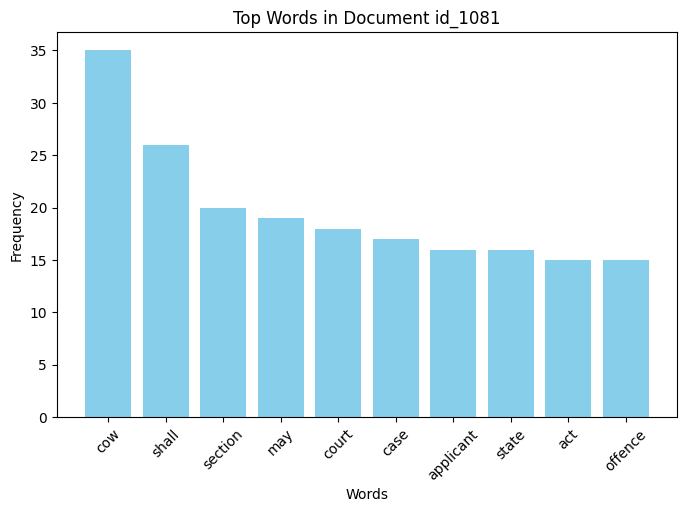

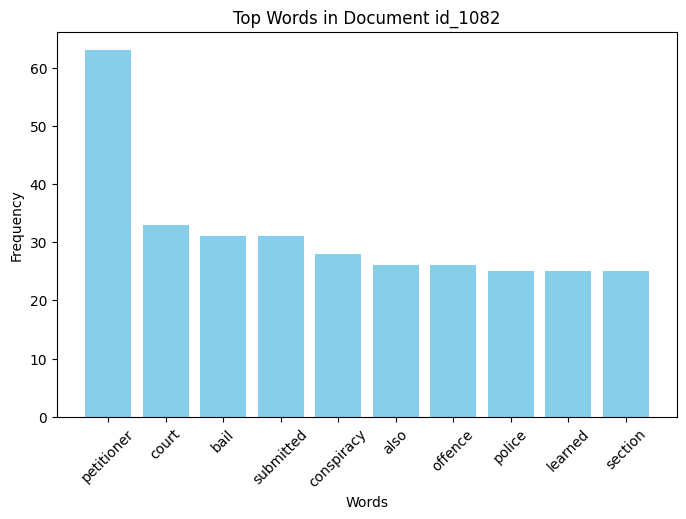

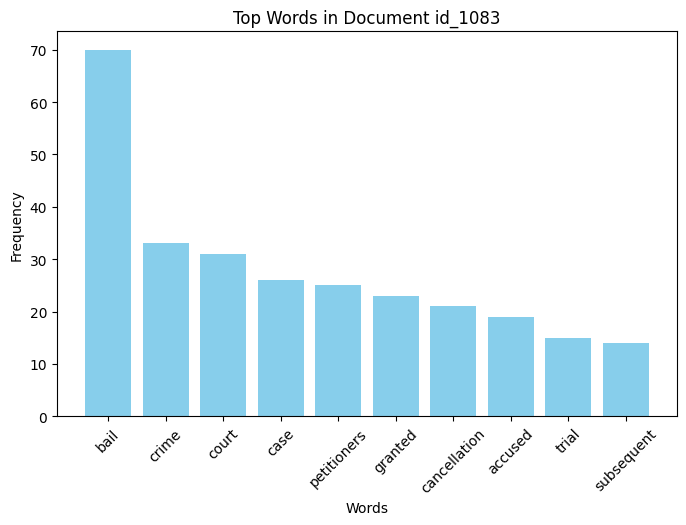

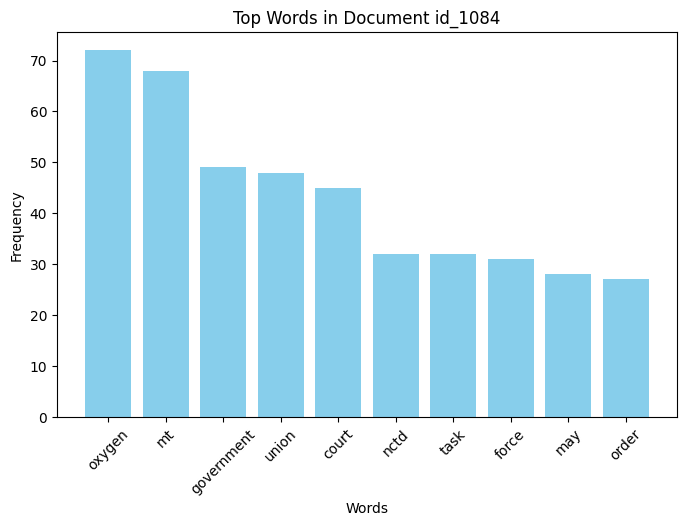

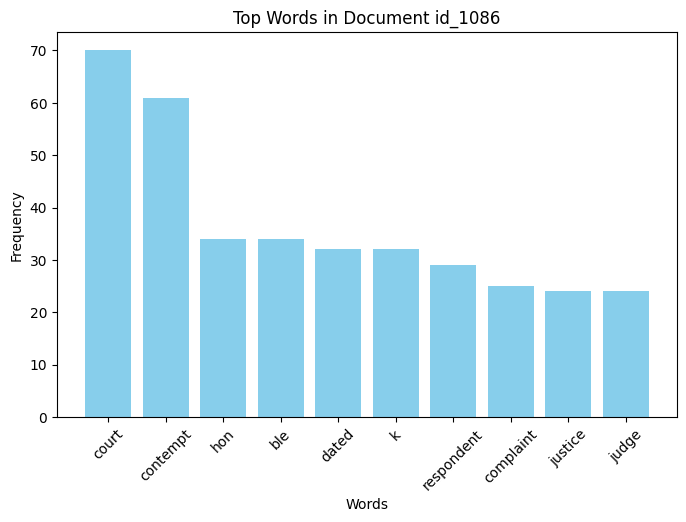

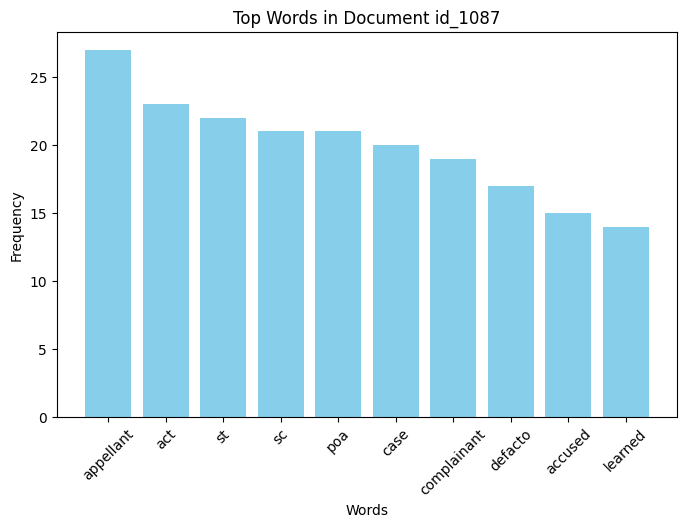

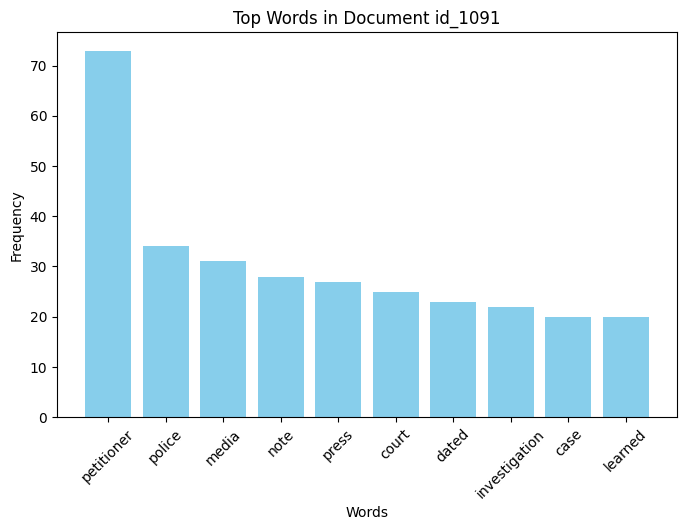

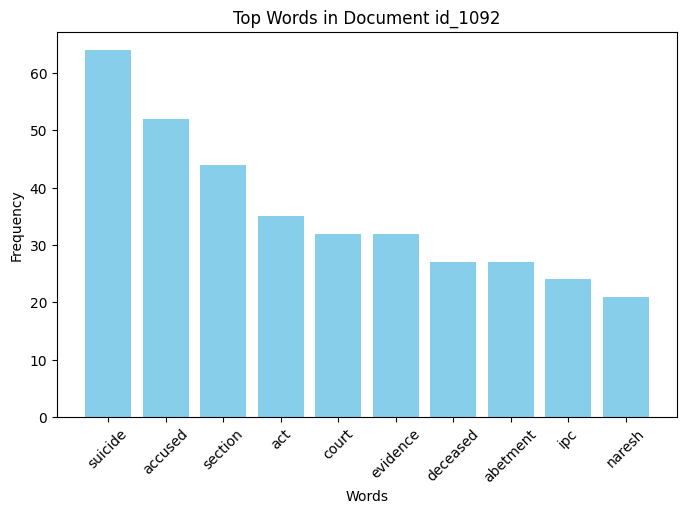

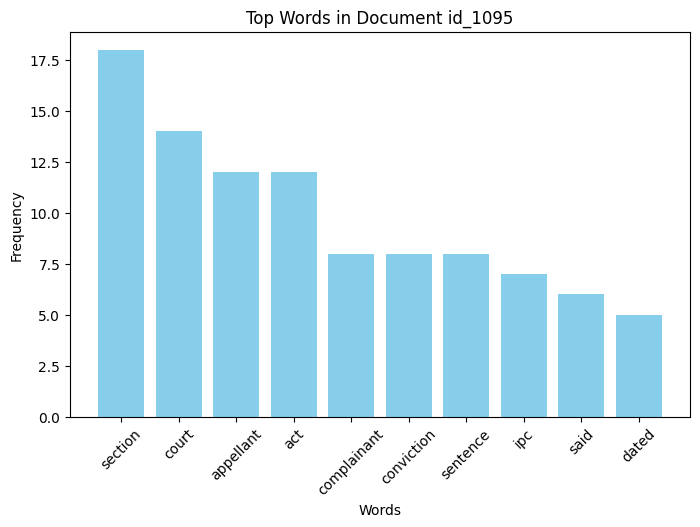

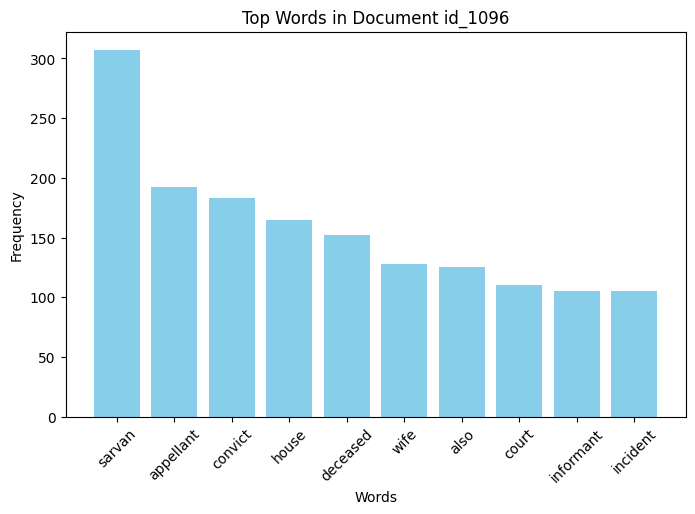

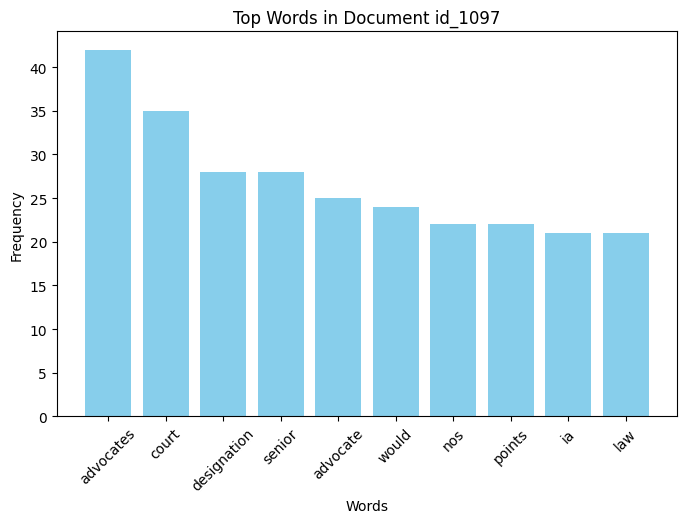

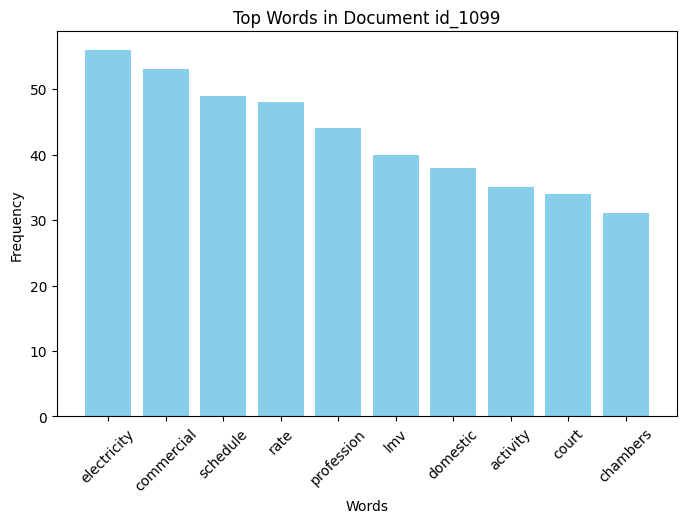

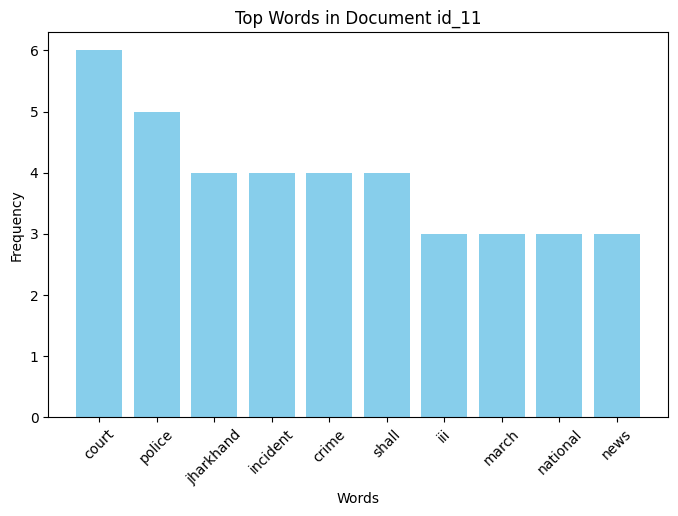

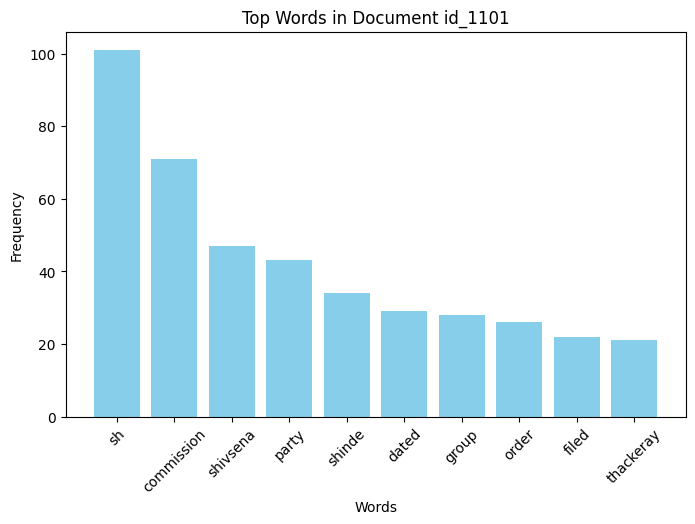

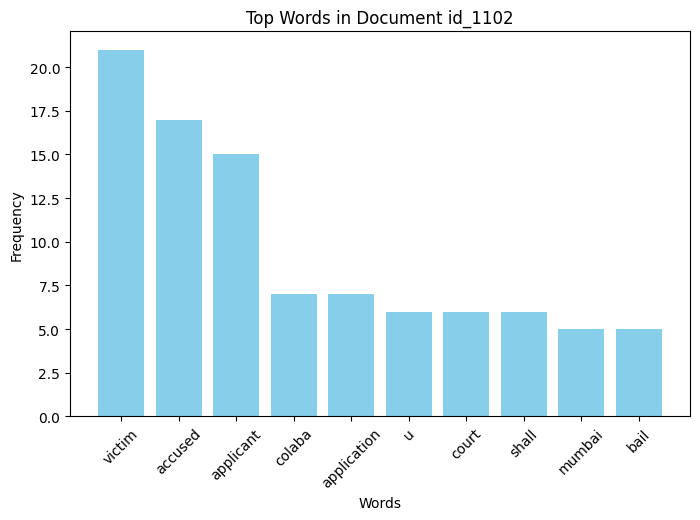

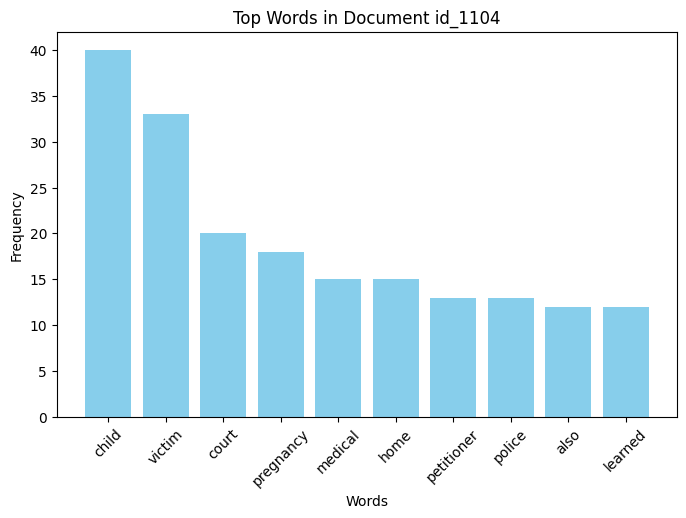

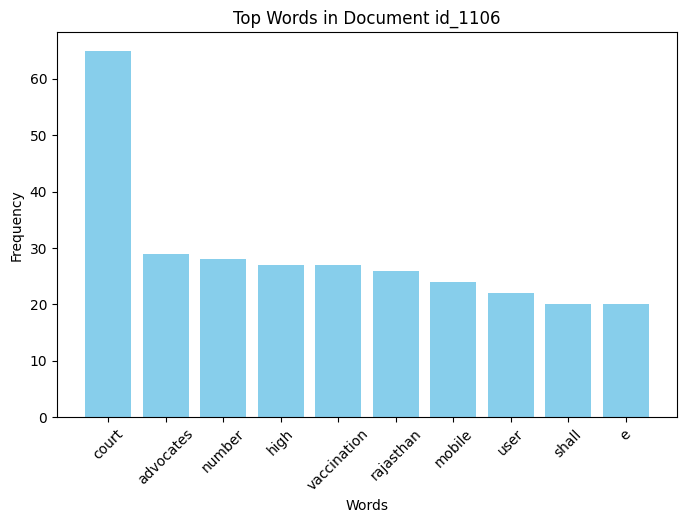

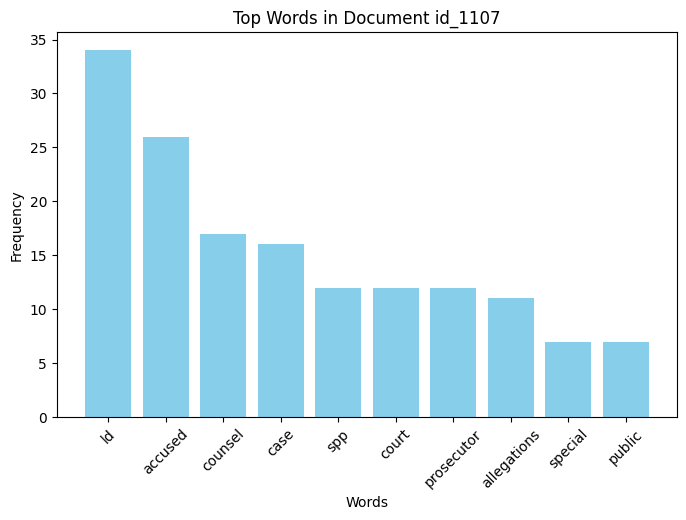

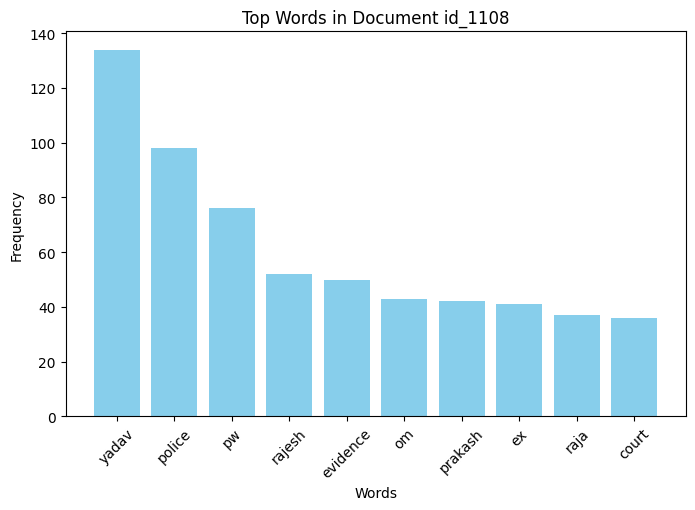

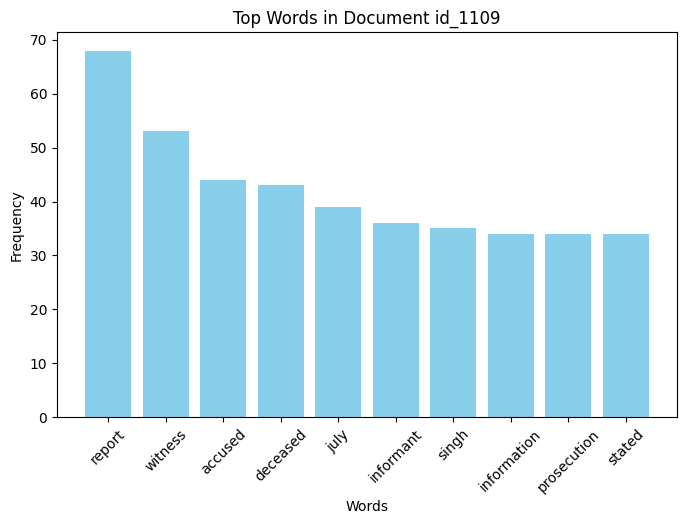

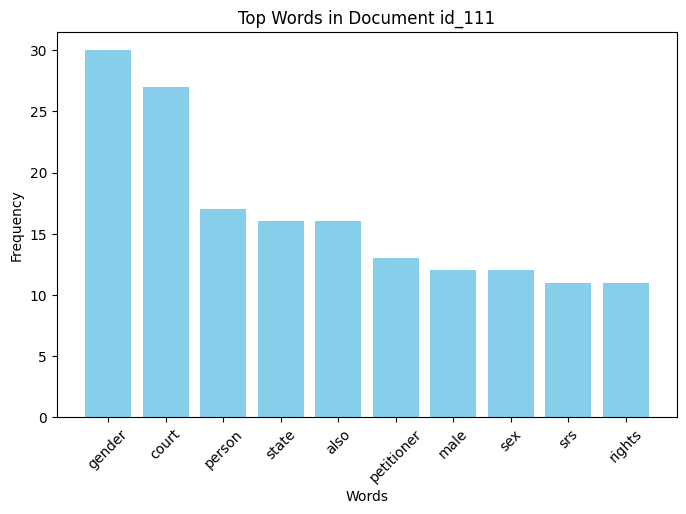

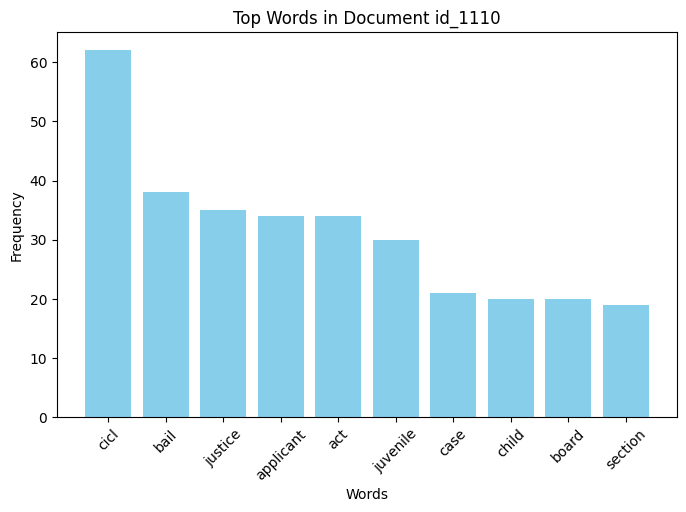

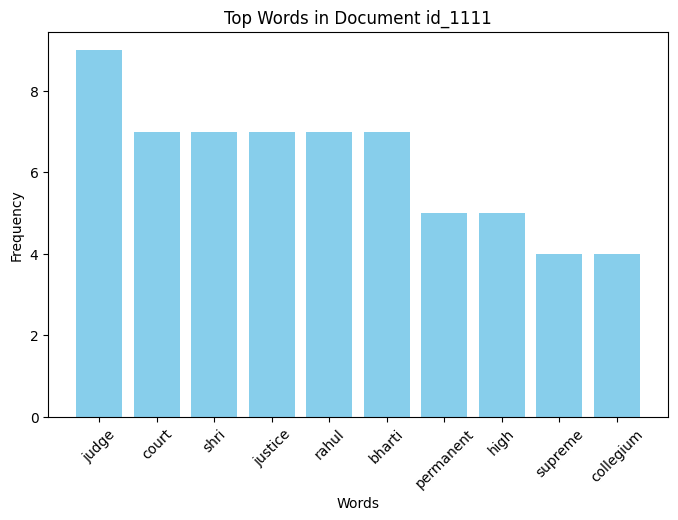

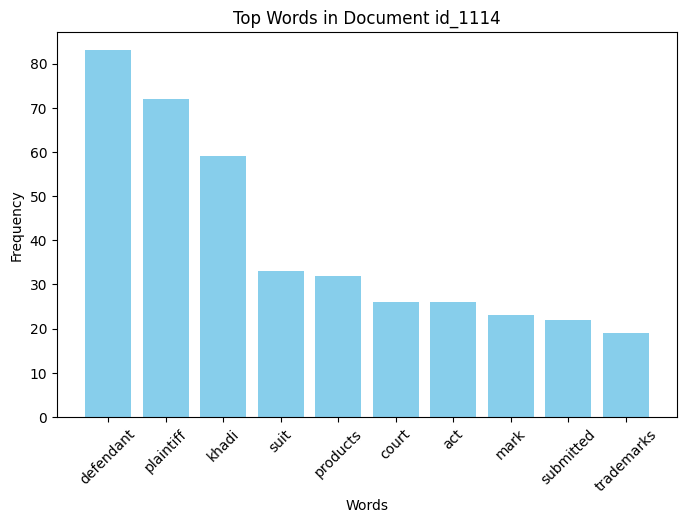

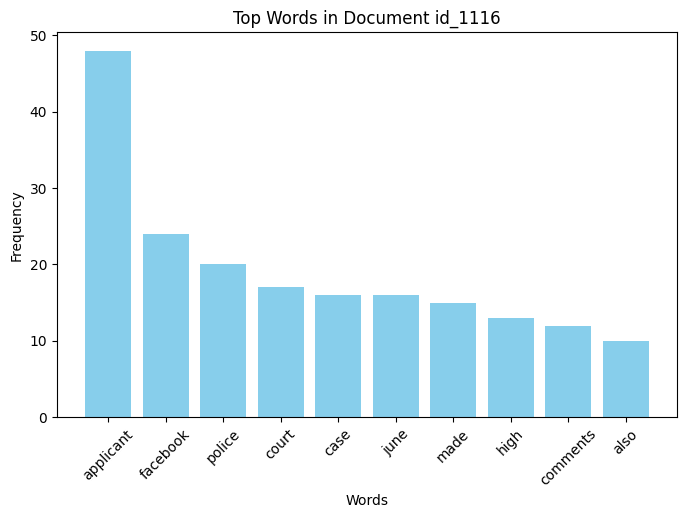

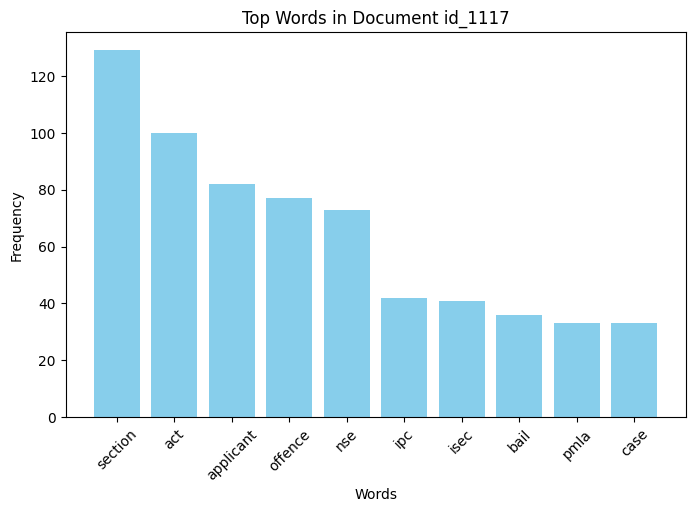

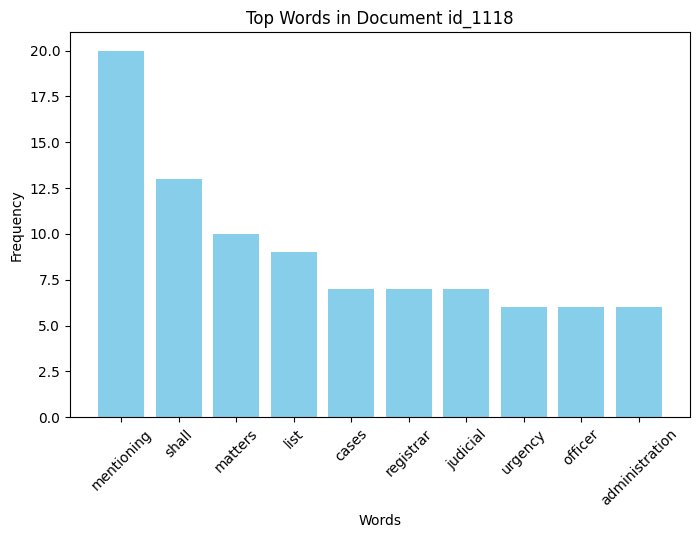

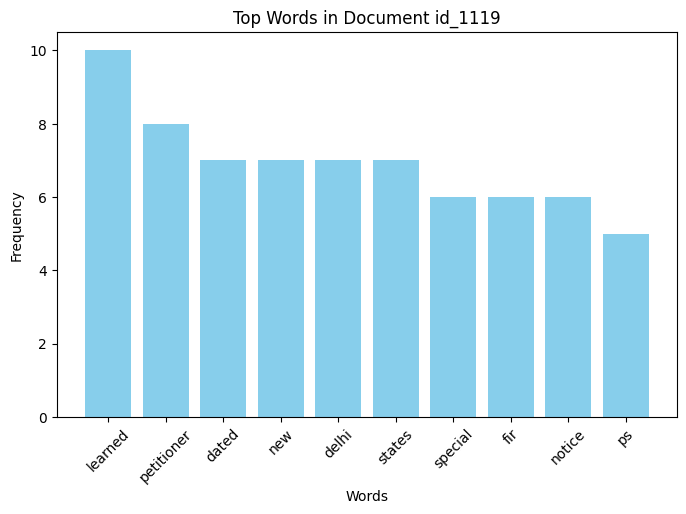

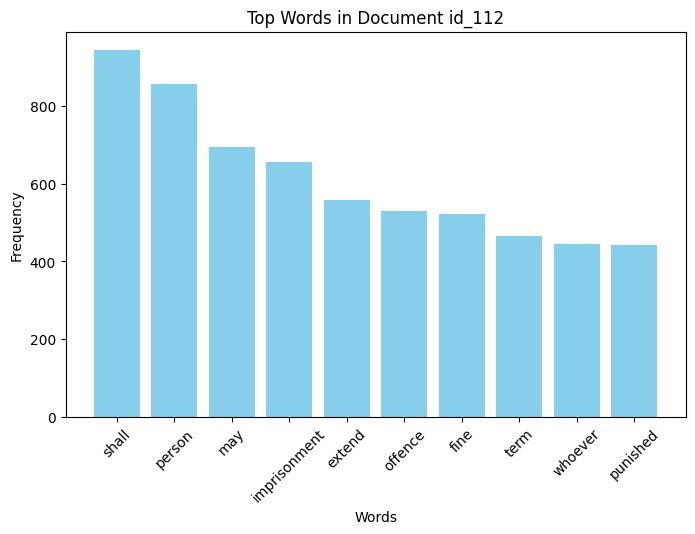

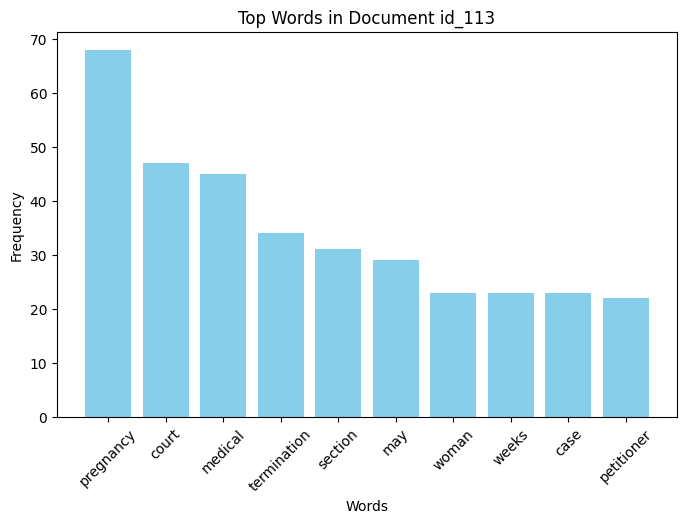

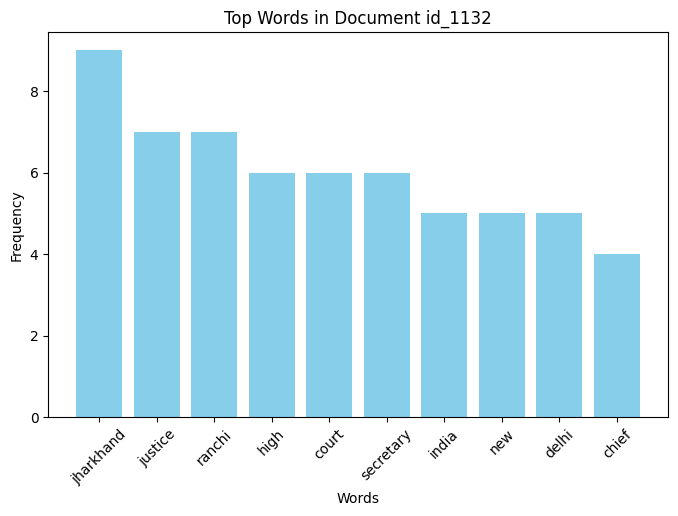

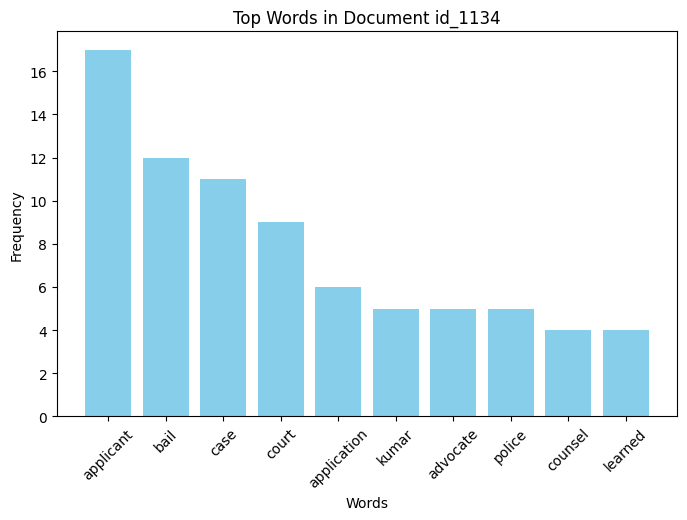

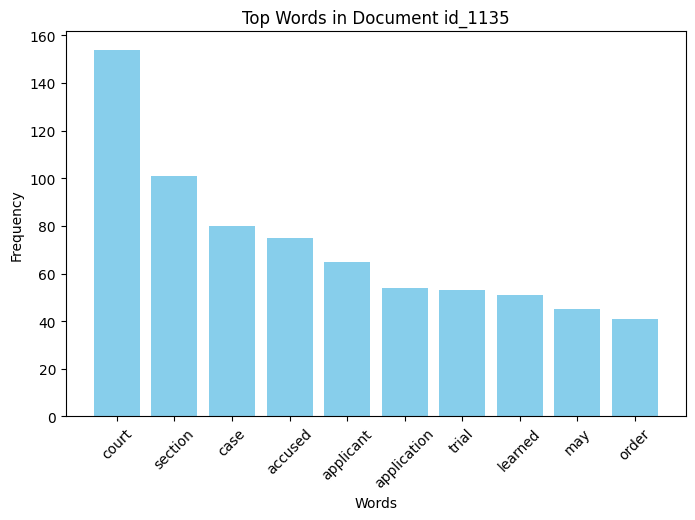

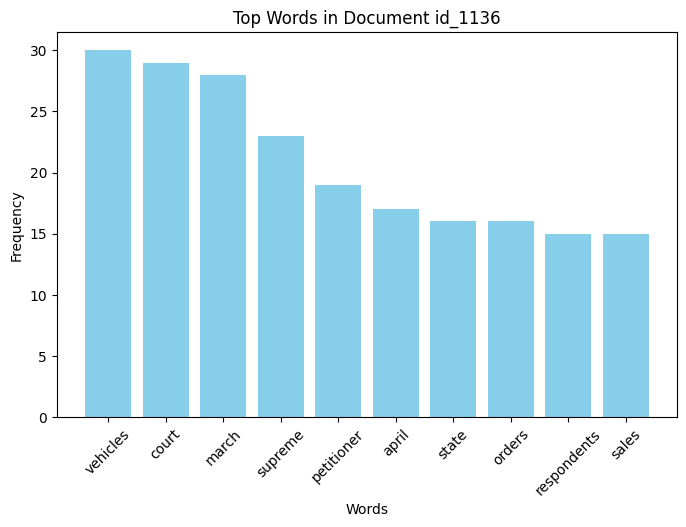

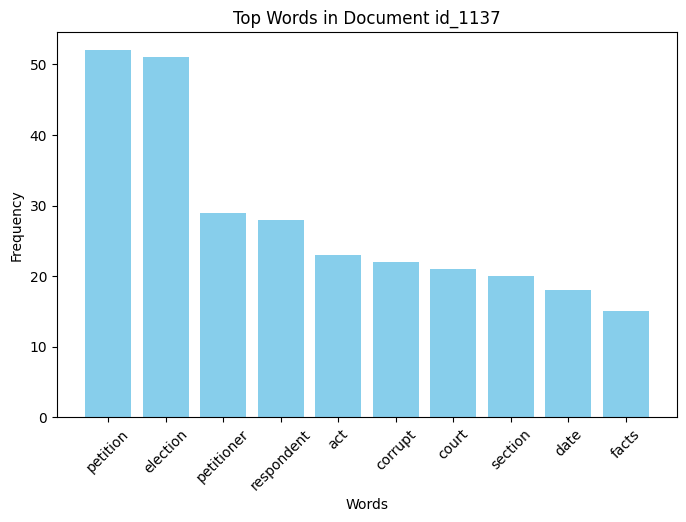

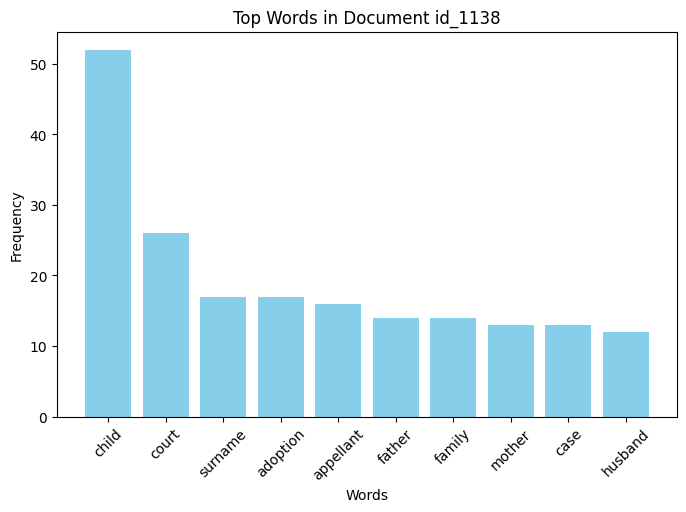

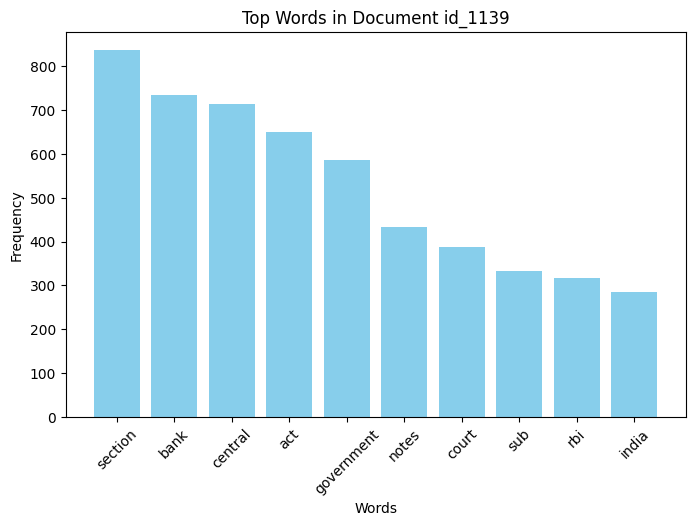

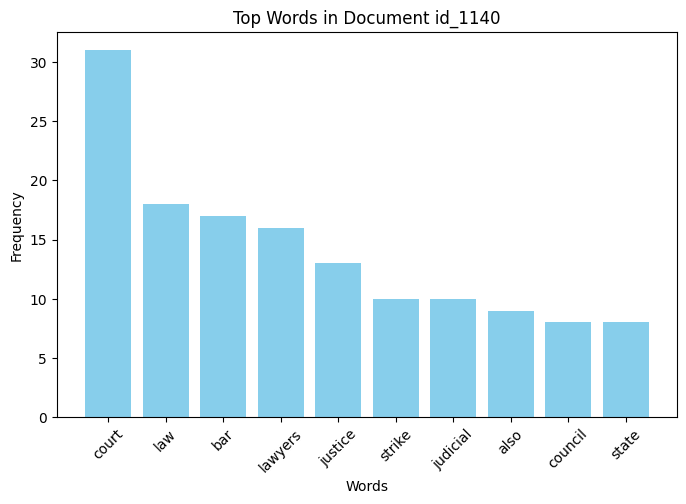

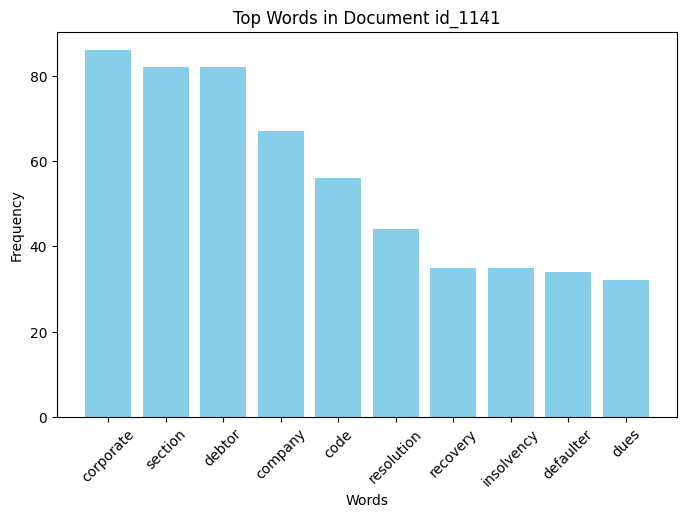

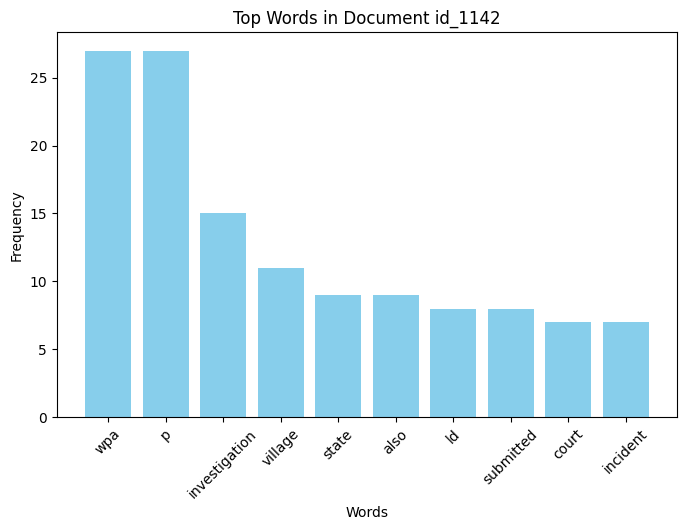

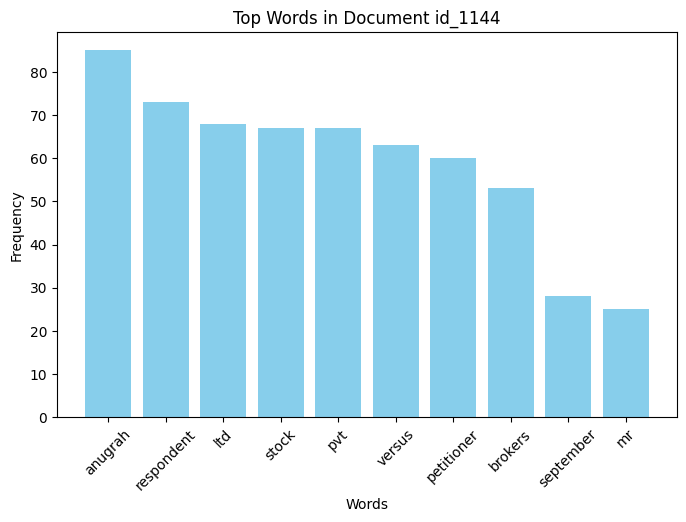

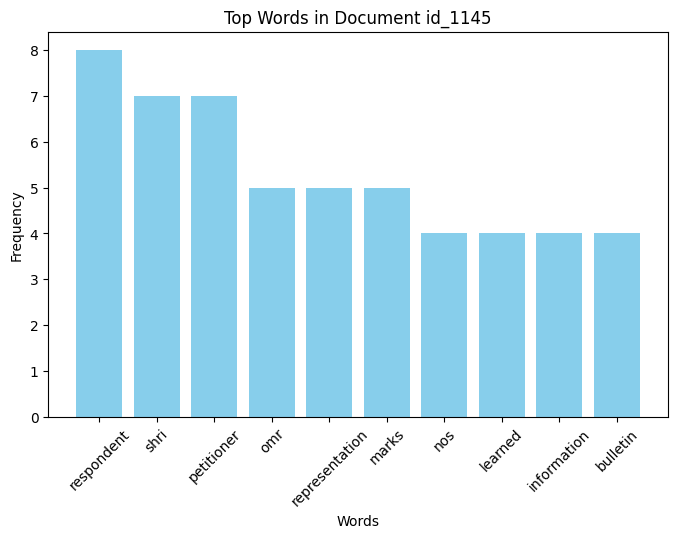

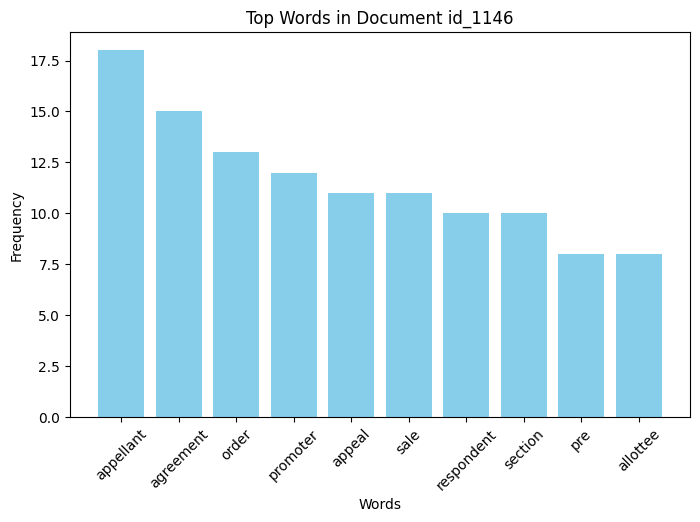

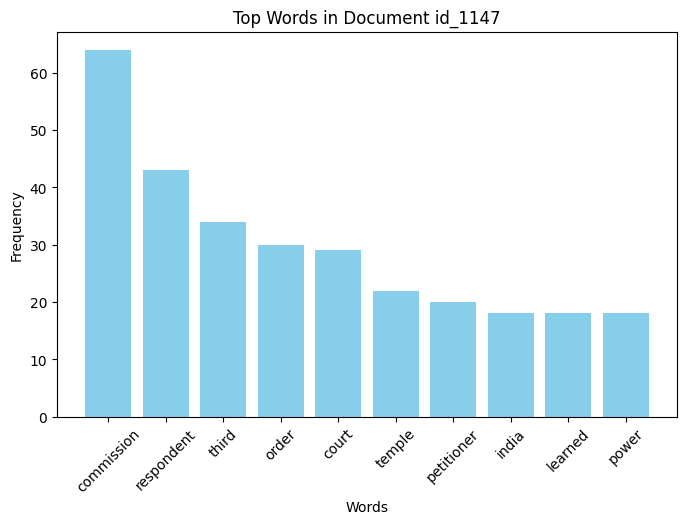

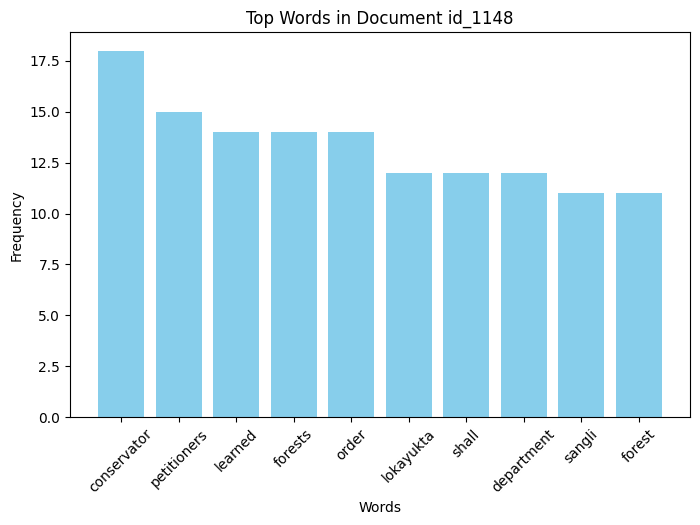

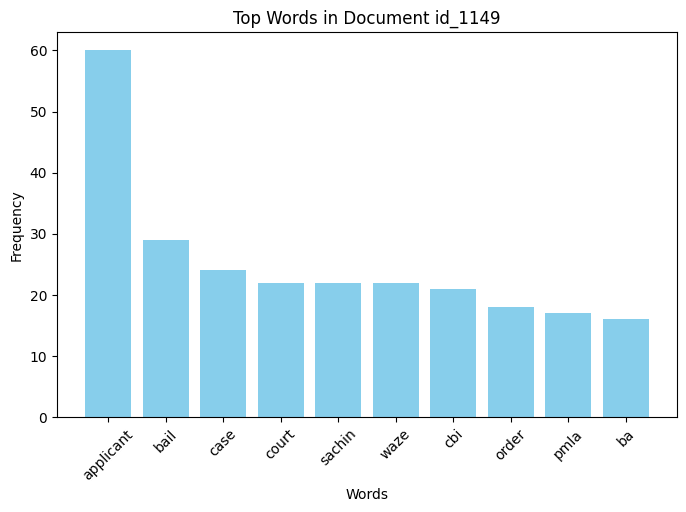

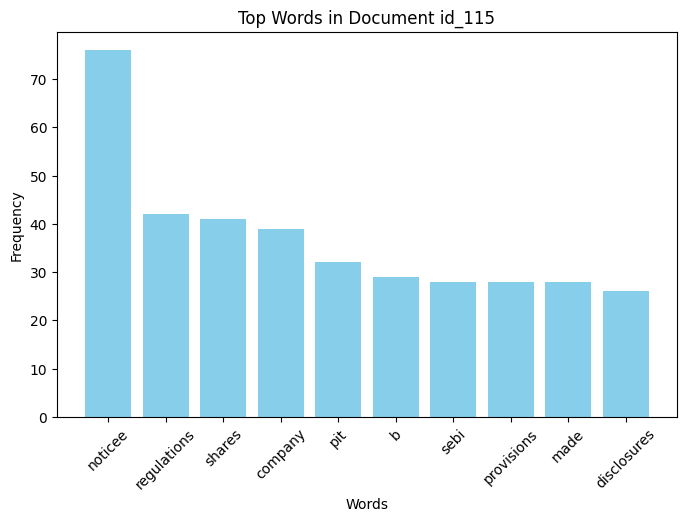

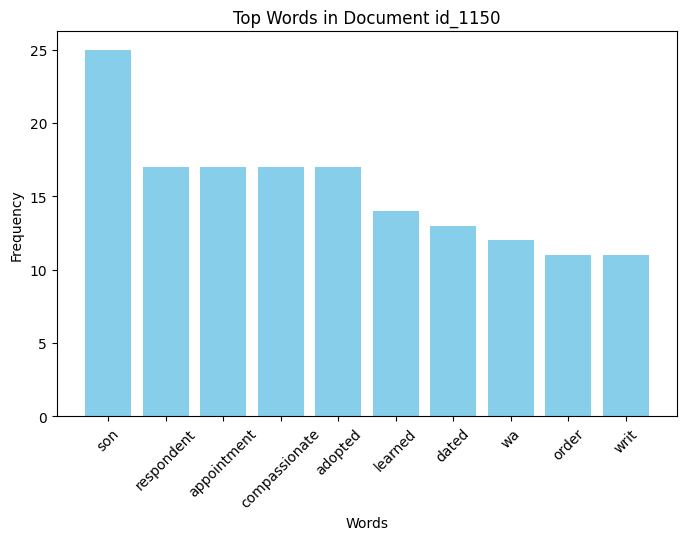

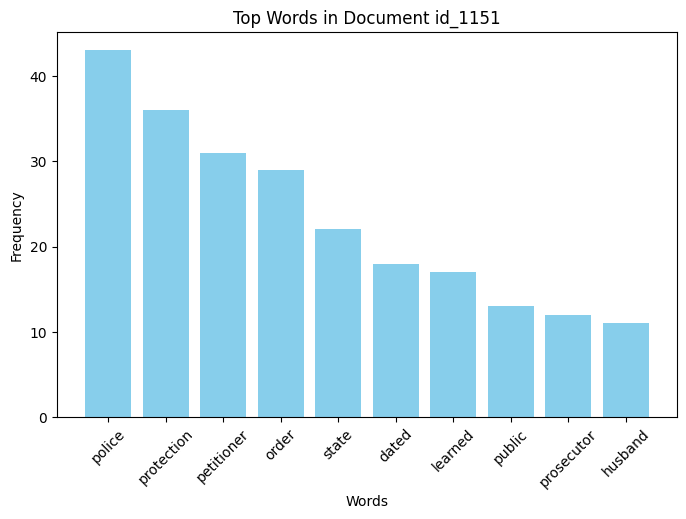

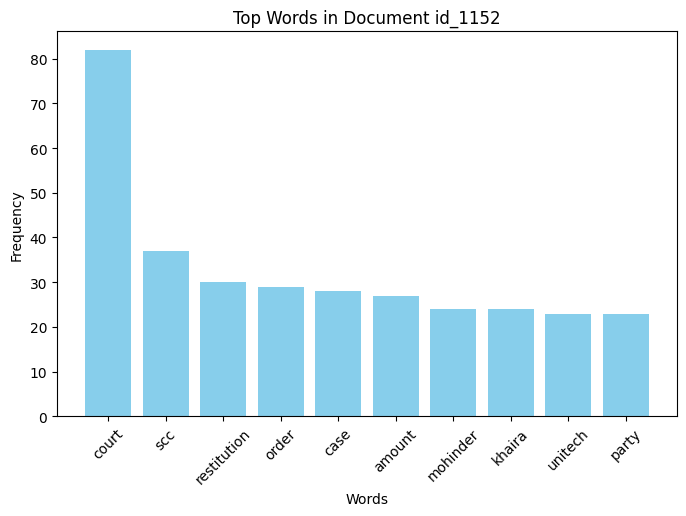

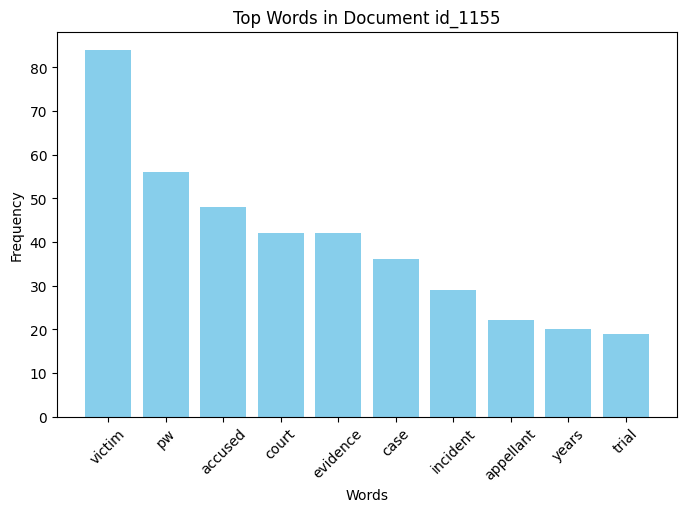

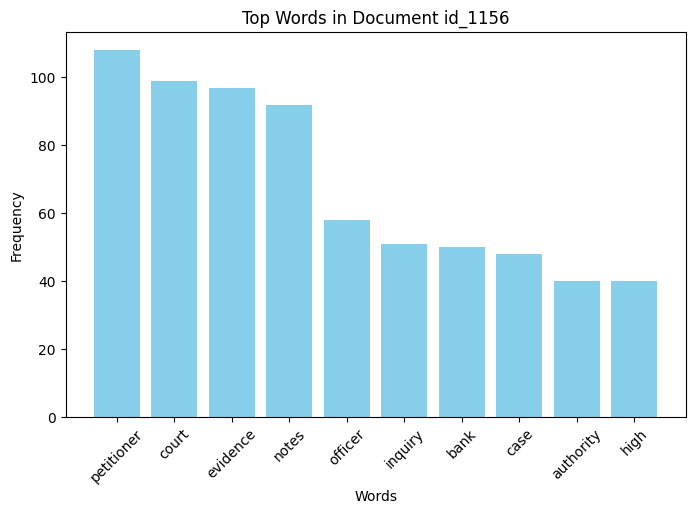

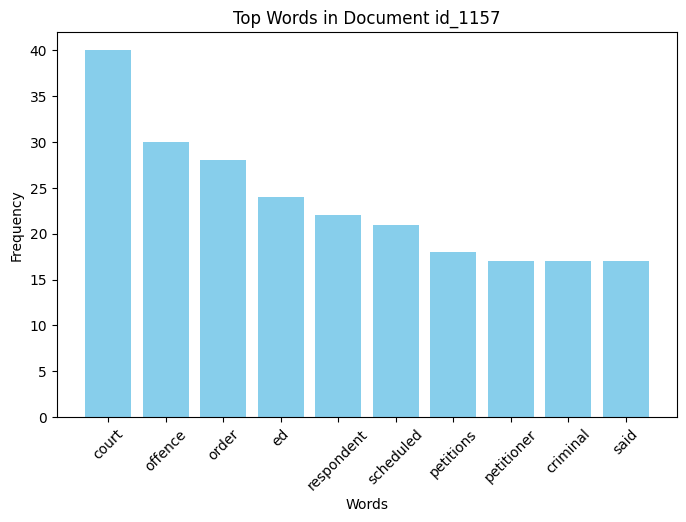

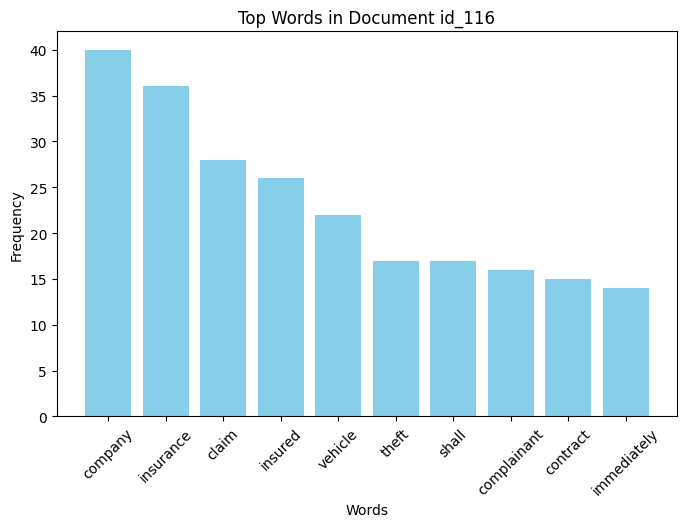

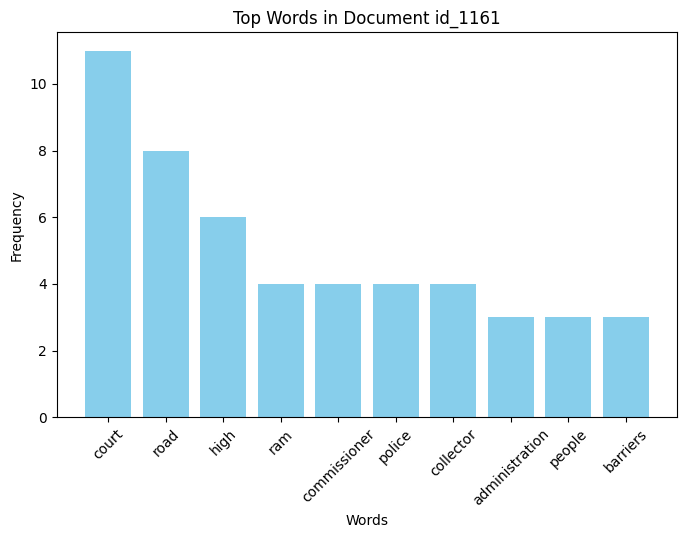

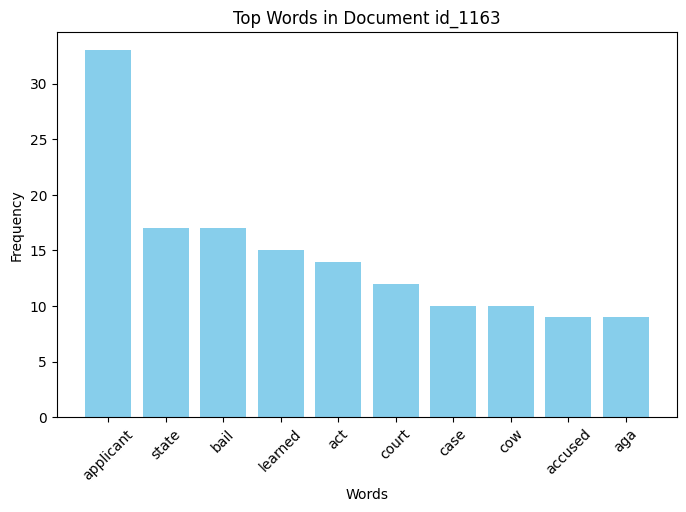

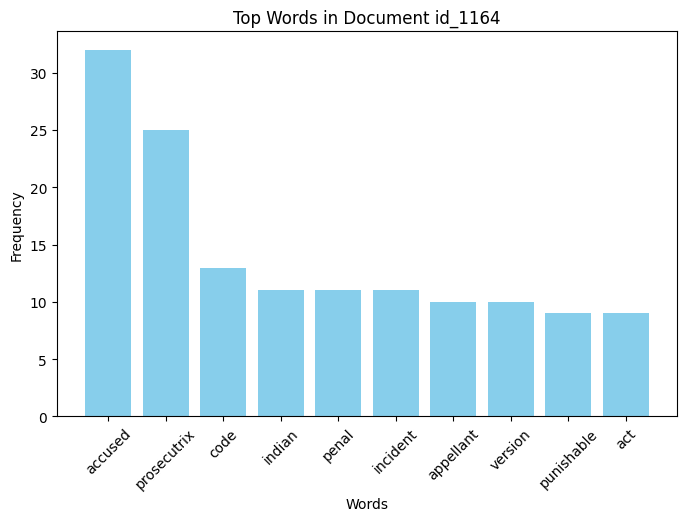

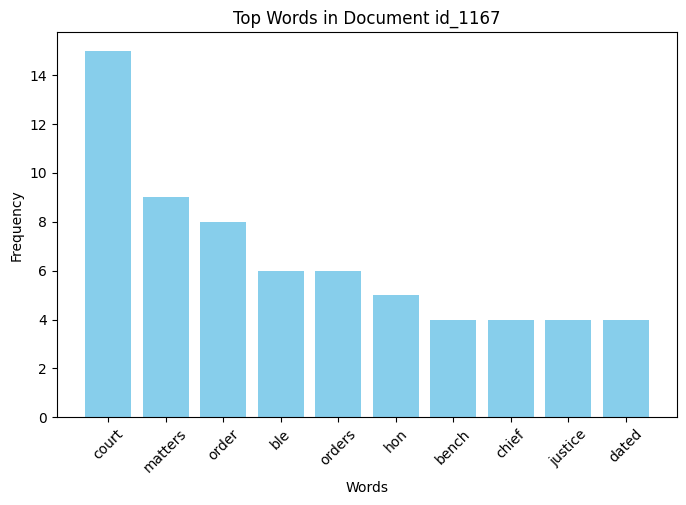

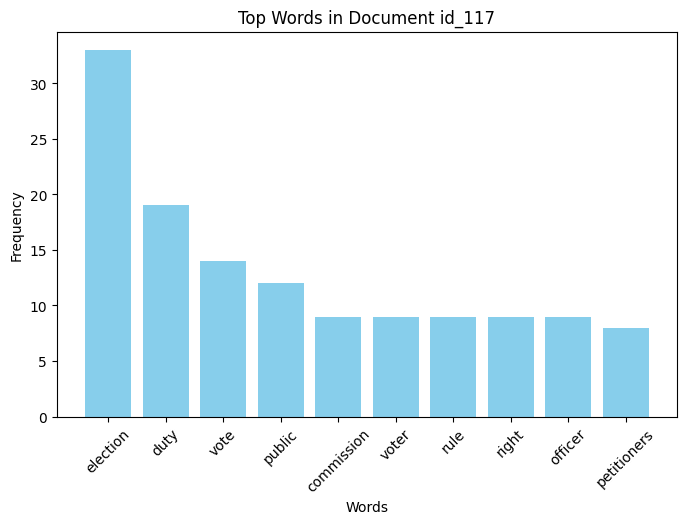

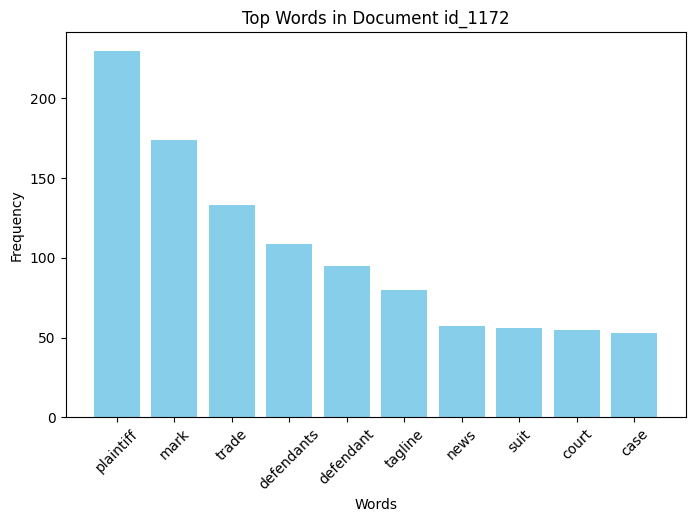

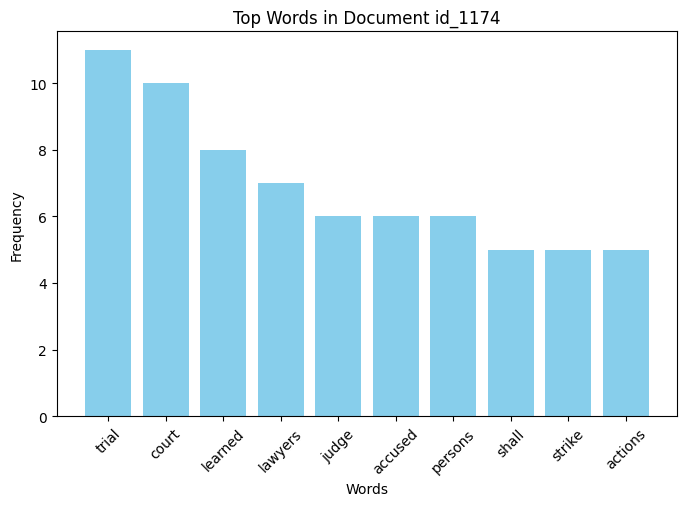

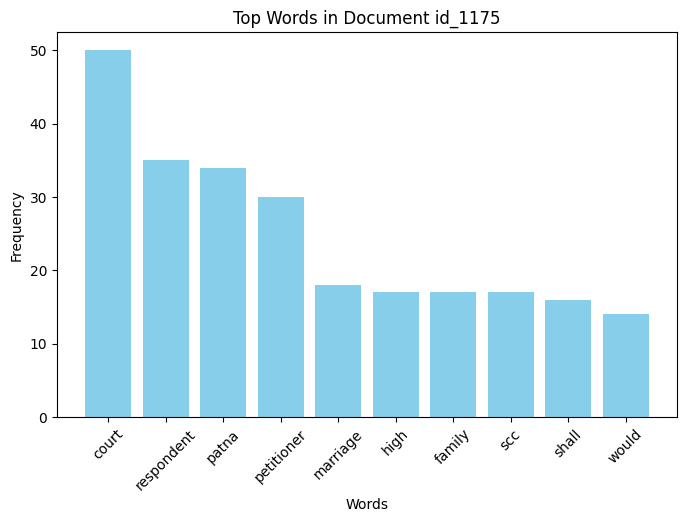

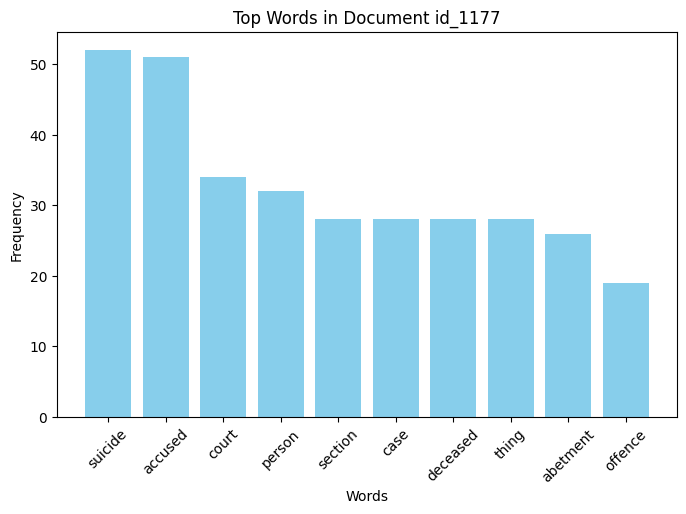

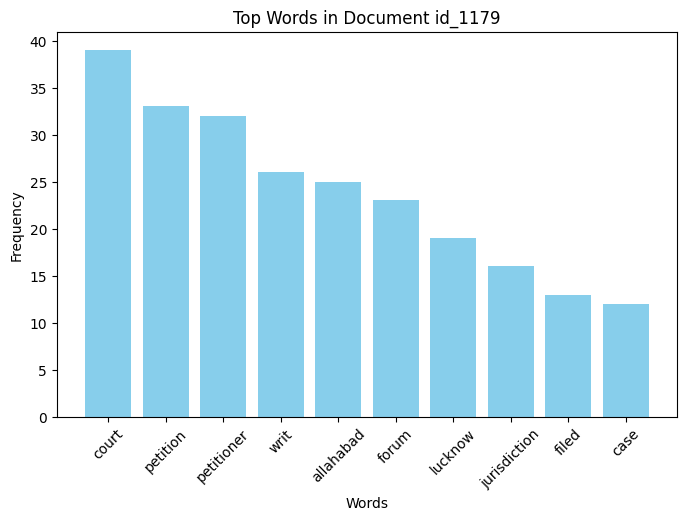

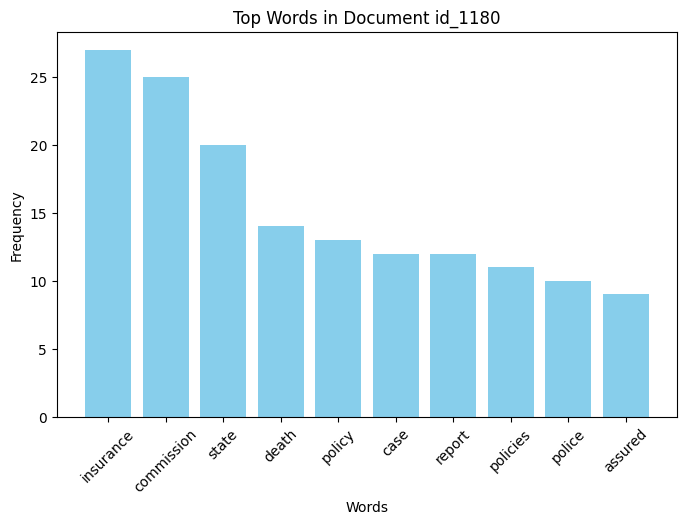

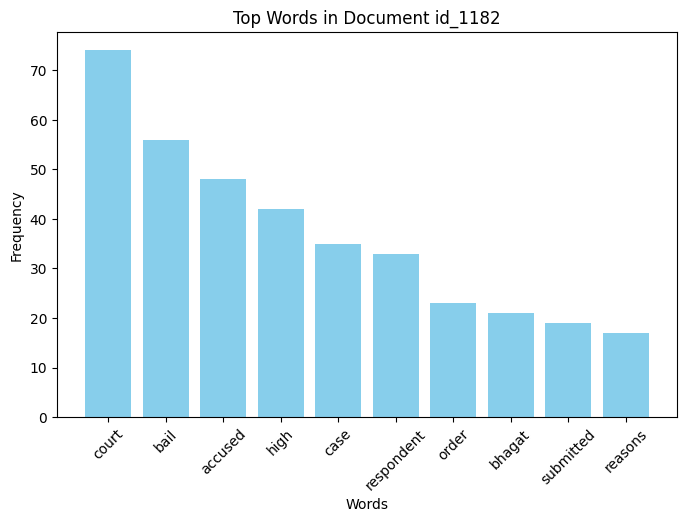

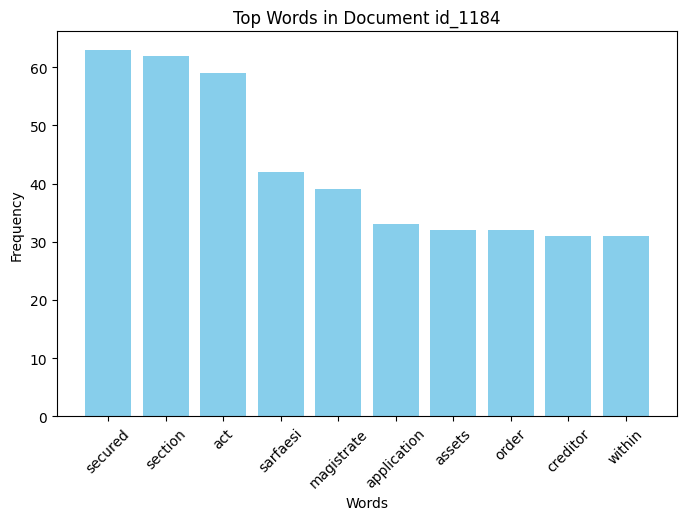

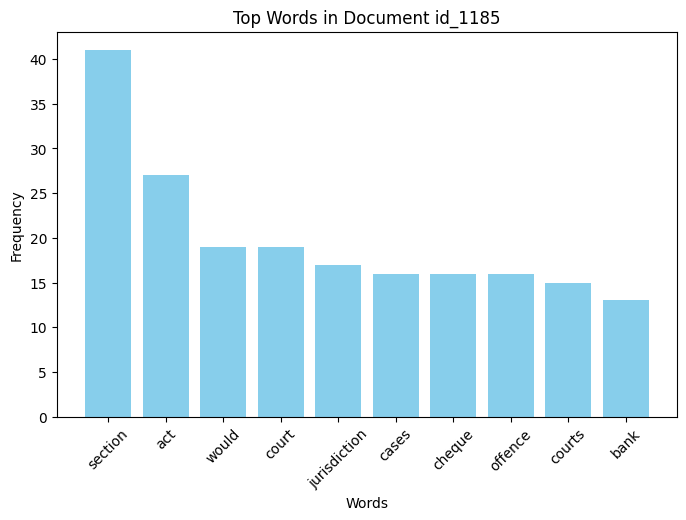

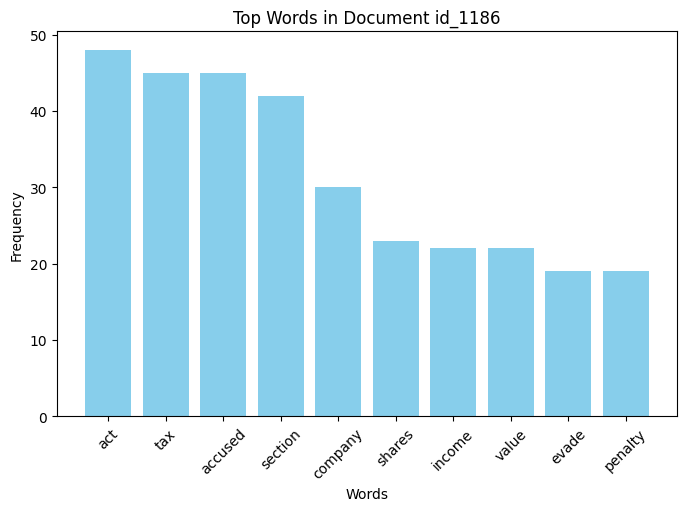

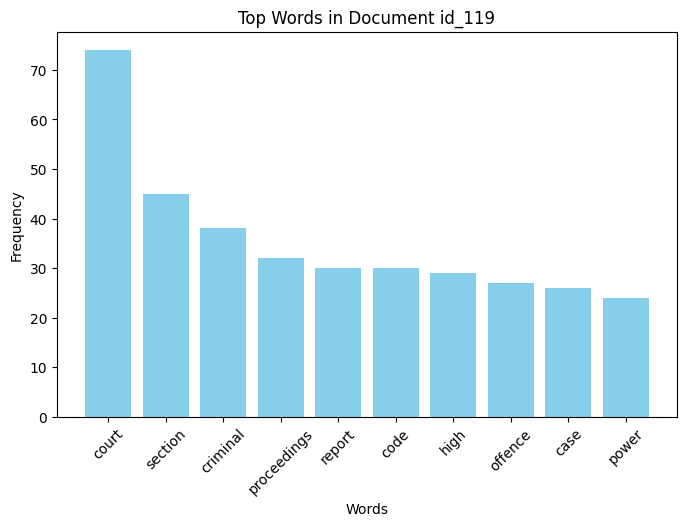

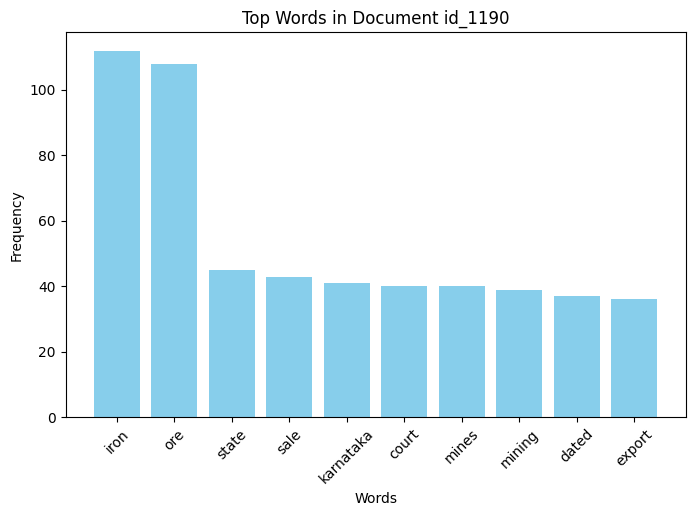

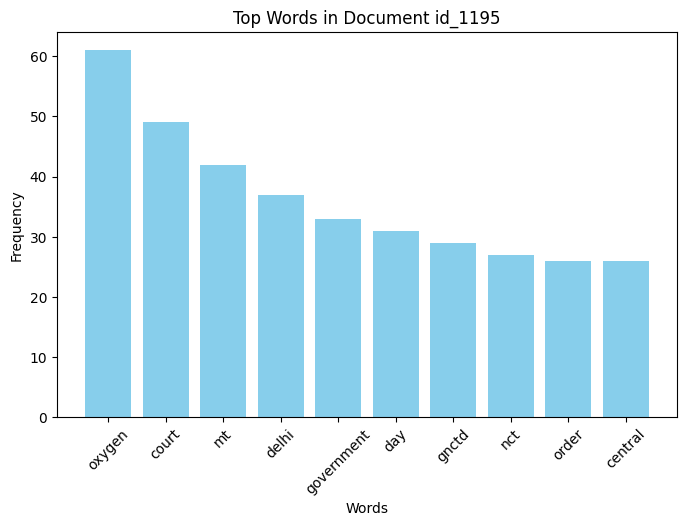

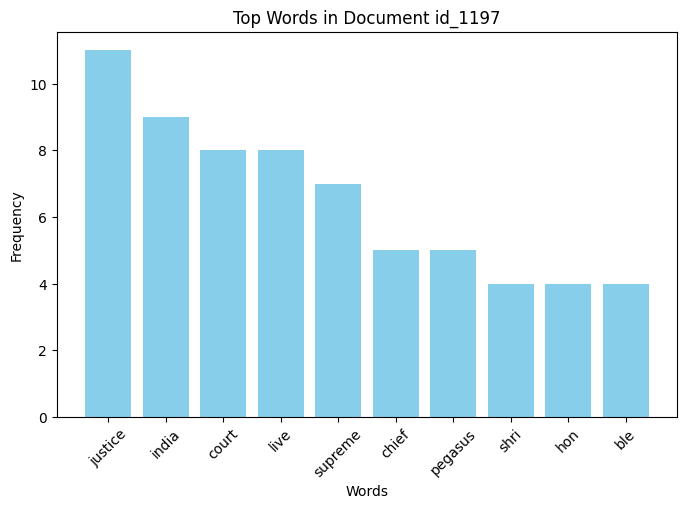

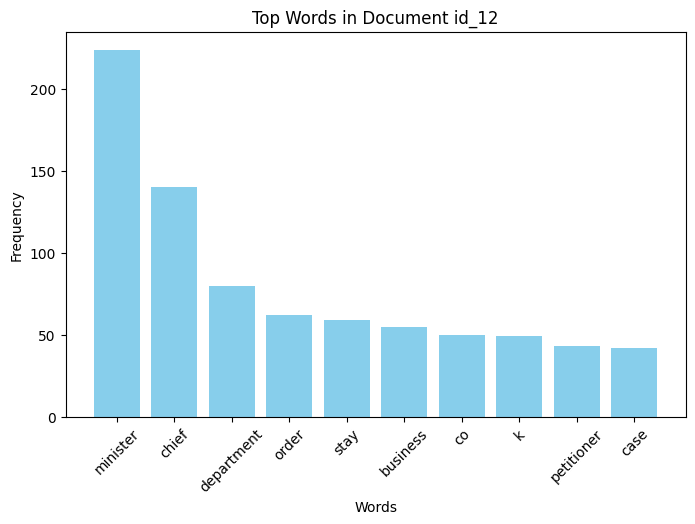

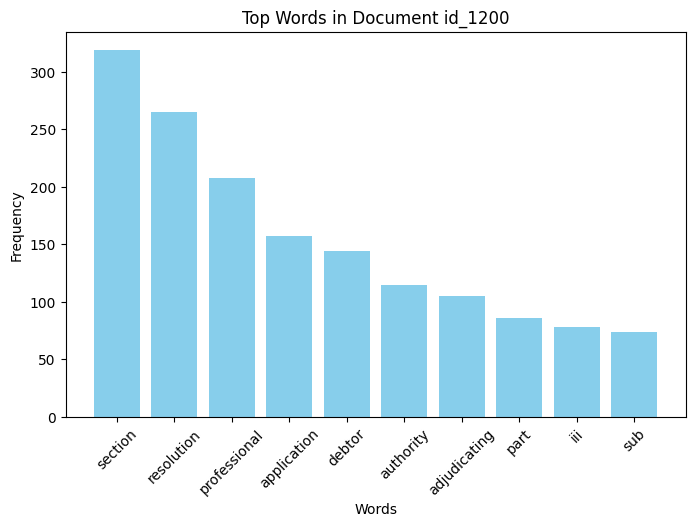

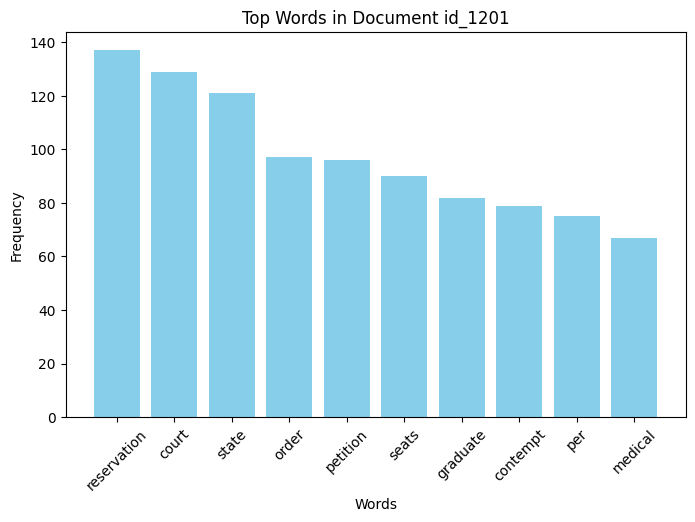

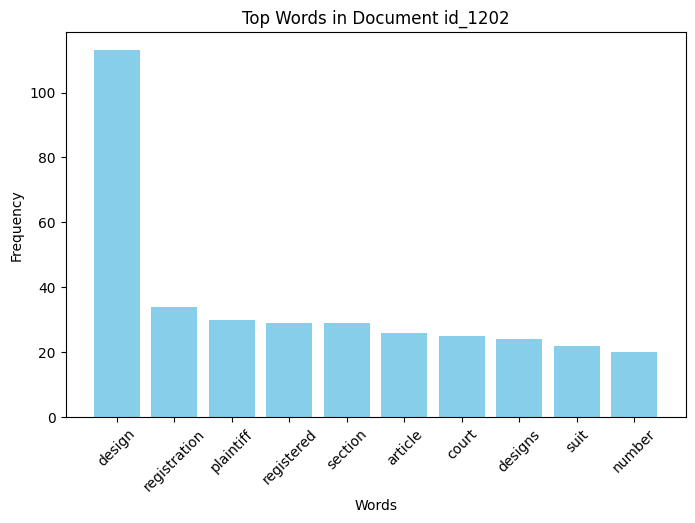

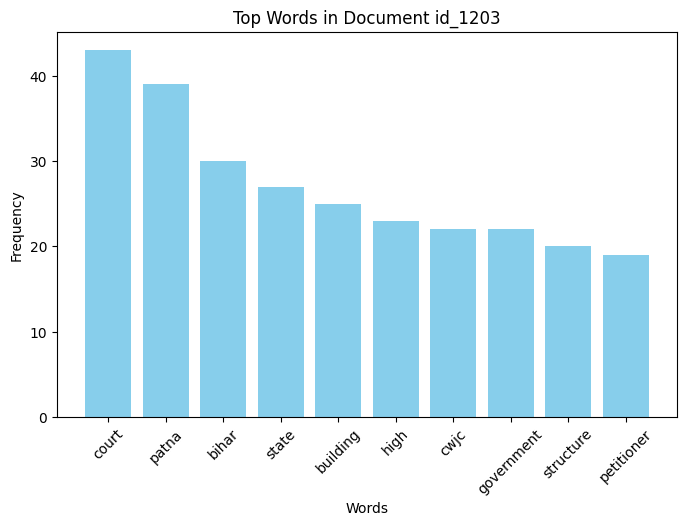

KeyboardInterrupt: 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Define preprocessing
stop_words = set(stopwords.words("english"))

def get_word_freq(text, top_n=10):
    tokens = word_tokenize(text.lower())
    filtered = [w for w in tokens if w.isalpha() and w not in stop_words]
    return Counter(filtered).most_common(top_n)

# Plot per-document
for idx, row in judg.iterrows():
    word_freq = get_word_freq(row["Judgment"], top_n=10)
    words, freqs = zip(*word_freq) if word_freq else ([], [])

    plt.figure(figsize=(8,5))
    plt.bar(words, freqs, color="skyblue")
    plt.title(f"Top Words in Document {row['ID']}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from collections import Counter
def extract_sentences(docs):
    all_sents = []
    one_sents=[]
    for doc in docs:
        sentences = nltk.sent_tokenize(doc)

        one_sent=[s for s in sentences if len(s.split()) == 1]
        #print(one_sent)
        one_sents.extend(one_sent)
        all_sents.extend(sentences)
    return all_sents,one_sents

# Collect sentences from all judgments
all_sents,one_sents= extract_sentences(judg["Judgment"])

# Count most common sentences
sent_counter = Counter(all_sents)

# Show top 20
print(sent_counter.most_common(100))


[('no.', 867), ('.', 558), ('ii.', 236), ('explanation.', 183), ('iii.', 182), ('iv.', 134), ('nos.', 127), ('154 of 20 20 vinod dua vs. union of india & ors.', 117), ('case no.', 113), ('addl.', 110), ('page no.', 96), ('the authenticity of the order can be re-verified from delhi high court order portal by scanning the qr code shown above.', 93), ('w.p.', 86), ('(c) no.', 83), ('the ld.', 81), ('07/2019 cnr no.', 81), ('ld.', 76), ('vi.', 72), ('i.a.', 67), ('sh.', 65), ('& ors.', 65), ('(cr.)', 56), ('vii.', 56), ('no objection to the premature release of the prisoner.', 56), ('[emphasis is mine.]', 56), ('act.', 48), ('31/2021 page no.', 47), ('competition appeal (at) no.', 43), ('viii.', 41), ('misc.', 41), ('no costs.', 39), ('kunal kamra v union of india & connected matters per gs patel j oswpl -9792 -2023++j-f- gspatelj.', 39), ('ix.', 38), ('explanation .', 37), ('thru.', 36), ('dg (int.)', 35), ('respondent no.', 35), ('xi.', 34), ('illustrations.', 34), ('o.p.', 33), ('wp no.

In [ ]:
one_sents

['thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'addl.',
 'secy.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'u.p.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'u.p.',
 'thru.',
 'addl.',
 'secy.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'chief/prin.',
 'secy.',
 'lko.',
 'thru.',
 'addl.',
 'secy.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'thru.',
 'addl.',
 'thru.',
 'addl.',
 'chief/prin.',
 'secy.',
 'thru.',
 'addl.',
 'thru.',
 'addl.',
 'thru.',
 'addl.',
 'secy.',
 'thru.',
 'addl.',
 'u.p.',
 'lko.',
 'thru.',
 'addl.',
 'secy.',
 'thru.',
 'addl.',
 'chief/prin.secy.',
 'thru.',
 'addl.',
 'thru.',
 'prin./addl.',
 'lko.',
 'thru.',
 'addl.',
 '/prin.',
 '

In [ ]:
sent_counter=sent_counter.most_common(100)
sent_boiler=[s for s in sent_counter if len(s[0].split())<6]

In [ ]:
all_sent_boiler_items = [s for s, _ in sent_boiler]
print(all_sent_boiler_items)

['no.', '.', 'ii.', 'explanation.', 'iii.', 'iv.', 'nos.', 'case no.', 'addl.', 'page no.', 'w.p.', '(c) no.', 'the ld.', '07/2019 cnr no.', 'ld.', 'vi.', 'i.a.', 'sh.', '& ors.', '(cr.)', 'vii.', '[emphasis is mine.]', 'act.', '31/2021 page no.', 'competition appeal (at) no.', 'viii.', 'misc.', 'no costs.', 'ix.', 'explanation .', 'thru.', 'dg (int.)', 'respondent no.', 'xi.', 'illustrations.', 'o.p.', 'wp no.', 'secy.', 'mtrs.', 'smt.', 'writ petition (criminal) no.', 'm/s.', 'of gujarat.', '(supra).', 'illustration .', '02/2021 bhagwan shrikrishna virajman etc.', 'vs. u.p.', 'sunni central waqf board etc.', '(kat).', 'of india.', 'p .', '25-10-2011).', 'l.j.', 'xii.', ". '", 'illustration.', 'mr. vice-president: amendment no .', 'of gujarat, from the addl.', '12228/2021 cnr no.', 'dlse-02012234-2021 page no.', 'xiii.', 'high court of h.p.', 'fir no.', 'p.c.', 'the respondent no.', 'adv.', '2.', 'etc.', 'saibaba.', 'defendant no.', 'of !', 'ka.', '3.', 'leave granted.', 'appeal no.',

In [ ]:
all_sent_boiler_items.extend(one_sents)


In [ ]:
all_sent_boiler_items=list(set(all_sent_boiler_items))

In [ ]:
all_sent_boiler_items

['further.',
 '7/1.',
 '850/2008.',
 'xiii.',
 'furnish~d.',
 'r.s.',
 'ref.',
 '1692/201194.',
 '17.)',
 '127.mr.',
 'w.p(crl).',
 '39.',
 '1/20231.',
 'through:sh.',
 '4.5mr.',
 '182.mr.',
 '54.dr.',
 'allowed.',
 '12.ld.',
 '06.1996.',
 '124a.',
 'ltd.8.',
 '62.',
 'sub.',
 'cr.p.c.',
 'distt.',
 '(iv).',
 '20(ii).',
 'washim.',
 '3.mr.',
 '32.mr.',
 '128.mr.',
 'opp.',
 'lvii.',
 'd.d.',
 'crl.rev.pet.',
 '41.',
 'nangia102.',
 'ff.',
 '3]shri.',
 'and.',
 'rona.',
 '10.mr.',
 'xix.',
 '19.mr.',
 'a(1).',
 'mat.',
 'r.p.',
 '23(ix).',
 'bangalore',
 '29.09.2023',
 'asj.',
 'departmental.',
 '4,50,000/-.',
 '44.',
 'ans6.',
 '16.09.2022',
 'meshram.',
 '869.',
 '(vol.',
 '25.',
 'u.d.',
 'wp(crl.)',
 '(xiv).',
 '279.mr.',
 '110.mr.',
 '[26a.',
 'lll.',
 '4.ms.',
 'ka-2.',
 'v.v.',
 '20."',
 '11/2020.',
 '4.3mr.',
 '24/2013.',
 '(b.h.u.)',
 '493/2022].',
 'xvii.',
 '(xix).',
 'n.n.',
 '111.',
 '(4)md.',
 '16498-a.',
 '118.',
 '(2.)',
 'appl.',
 '1232(e).',
 'xlvi.',
 '2016).',
 'ms.h

In [ ]:
from collections import Counter
import re

def tokenize_words(text):
    text = text.lower()
    words = re.findall(r'\b[a-z\.]+\b', text)
    return words

all_tokens = []
for doc in judg["Judgment"]:
    all_tokens.extend(tokenize_words(str(doc)))

word_freq = Counter(all_tokens)
print(word_freq.most_common(50))


[('the', 770515), ('of', 443642), ('to', 242121), ('and', 201556), ('in', 189362), ('a', 133253), ('that', 123287), ('is', 123255), ('be', 84236), ('by', 84024), ('for', 77443), ('on', 74264), ('as', 71338), ('or', 65660), ('it', 60262), ('not', 58109), ('was', 55853), ('court', 54963), ('.', 51554), ('this', 46305), ('with', 46083), ('has', 43005), ('which', 42219), ('under', 37369), ('section', 34477), ('any', 33175), ('an', 33145), ('are', 32578), ('act', 32565), ('no', 29299), ('from', 28708), ('state', 27722), ('have', 26798), ('at', 26387), ('case', 25947), ('been', 25433), ('such', 25315), ('s', 24325), ('he', 23983), ('also', 21147), ('would', 19770), ('order', 19602), ('his', 18663), ('may', 17839), ('other', 17481), ('law', 17263), ('shall', 17246), ('there', 17232), ('had', 17020), ('if', 15905)]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = vectorizer.fit_transform(judg["Judgment"].astype(str))

avg_tfidf = np.asarray(X.mean(axis=0)).ravel()
terms = vectorizer.get_feature_names_out()

# Sort by lowest average tf-idf → most likely boilerplate
low_tfidf_terms = [t for t, score in sorted(zip(terms, avg_tfidf), key=lambda x: x[1])[:50]]
print("\n🔹 Candidate boilerplate terms (low TF-IDF):")
print(low_tfidf_terms)


NameError: name 'np' is not defined

In [ ]:
boilerplate_dict = {
    "sentences": all_sent_boiler_items,
    "terms": ['fron', 'ebix', 'hin', 'rpa', 'fma', 'spv', 'axykno', 'thot', 'apte','ond', 'jv', 'deccan']
}

import json
with open("boilerplate_candidates.json", "w", encoding="utf-8") as f:
    json.dump(boilerplate_dict, f, indent=2, ensure_ascii=False)

print("\n✅ Boilerplate candidates saved to boilerplate_candidates.json")


✅ Boilerplate candidates saved to boilerplate_candidates.json


In [ ]:
judg

ID                                           Judgment  word_count  \
0       id_10  case writ c no. 11383 of 2023 petitioner syed ...        3496   
1     id_1000  versus appearance and date 22 09 2023 1.the pr...        1856   
2     id_1001  non reportable criminal appeal no. of 2024 spe...        1465   
3     id_1002   appellant versus umesh sharma s o late omprak...        2297   
4     id_1003  1whether reporters of local papers may be allo...        1899   
...       ...                                                ...         ...   
1195   id_995   arising out of special leave petition crimina...        7797   
1196   id_996   reserved on 15.03.2023 pronounced on 16.05.20...        8534   
1197   id_997  reportable writ petition c no 961 of 2021 neil...        1063   
1198   id_998  m s. biovet private limited .applicants in the...        2049   
1199   id_999  nc 2023 khc d 13177 db wa no. 100406 of 2023 c...        2680   

      sentence_count  
0                291  
1                 52  
2                 56  
3                 77  
4                 59  
...              ...  
1195             256  
1196             268  
1197              27  
1198              57  
1199              82  

[1200 rows x 4 columns]

In [ ]:
ref=clean_text(ref,'Summary')

after cleaning
           ID  word_count  sentence_count
0       id_10         727              22
1     id_1000         571              16
2     id_1001         528              17
3     id_1002         423              17
4     id_1003         469              16
...       ...         ...             ...
1195   id_995         707              26
1196   id_996         744              22
1197   id_997         562              18
1198   id_998         452              13
1199   id_999         638              22

[1200 rows x 3 columns]
27
2181
571.2291666666666


In [ ]:
ref

ID                                            Summary  word_count  \
0       id_10  the allahabad high court on thursday stayed th...         727   
1     id_1000  a convict in gujarat who had secured bail in 2...         571   
2     id_1001  a police officer failing in their fundamental ...         528   
3     id_1002  the chhattisgarh high court recently observed ...         423   
4     id_1003  the gujarat high court recently quashed a firs...         469   
...       ...                                                ...         ...   
1195   id_995  facts sourced from a statement made by accused...         707   
1196   id_996  the delhi high court recently directed mediati...         744   
1197   id_997  the supreme court on friday passed an interim ...         562   
1198   id_998  the bombay high court on thursday permitted bi...         452   
1199   id_999  the karnataka high court recently set aside a ...         638   

      sentence_count  
0                 22  
1                 16  
2                 17  
3                 17  
4                 16  
...              ...  
1195              26  
1196              22  
1197              18  
1198              13  
1199              22  

[1200 rows x 4 columns]

In [54]:
merged_df = judg.merge(ref, on="ID", how="inner")

In [55]:
merged_df = merged_df[['ID','Judgment','Summary']]
merged_df

ID                                           Judgment  \
0       id_10  case writ c no. 11383 of 2023 petitioner syed ...   
1     id_1000  versus appearance and date 22 09 2023 1.the pr...   
2     id_1001  non reportable criminal appeal no. of 2024 spe...   
3     id_1002   appellant versus umesh sharma s o late omprak...   
4     id_1003  1whether reporters of local papers may be allo...   
...       ...                                                ...   
1195   id_995   arising out of special leave petition crimina...   
1196   id_996   reserved on 15.03.2023 pronounced on 16.05.20...   
1197   id_997  reportable writ petition c no 961 of 2021 neil...   
1198   id_998  m s. biovet private limited .applicants in the...   
1199   id_999  nc 2023 khc d 13177 db wa no. 100406 of 2023 c...   

                                                Summary  
0     the allahabad high court on thursday stayed th...  
1     a convict in gujarat who had secured bail in 2...  
2     a police officer failing in their fundamental ...  
3     the chhattisgarh high court recently observed ...  
4     the gujarat high court recently quashed a firs...  
...                                                 ...  
1195  facts sourced from a statement made by accused...  
1196  the delhi high court recently directed mediati...  
1197  the supreme court on friday passed an interim ...  
1198  the bombay high court on thursday permitted bi...  
1199  the karnataka high court recently set aside a ...  

[1200 rows x 3 columns]

In [59]:
merged_df["compression"] = merged_df.apply(lambda x: compression_fraction(x["Judgment"], x["Summary"]), axis=1)
merged_df

ID                                           Judgment  \
0       id_10  case writ c no. 11383 of 2023 petitioner syed ...   
1     id_1000  versus appearance and date 22 09 2023 1.the pr...   
2     id_1001  non reportable criminal appeal no. of 2024 spe...   
3     id_1002   appellant versus umesh sharma s o late omprak...   
4     id_1003  1whether reporters of local papers may be allo...   
...       ...                                                ...   
1195   id_995   arising out of special leave petition crimina...   
1196   id_996   reserved on 15.03.2023 pronounced on 16.05.20...   
1197   id_997  reportable writ petition c no 961 of 2021 neil...   
1198   id_998  m s. biovet private limited .applicants in the...   
1199   id_999  nc 2023 khc d 13177 db wa no. 100406 of 2023 c...   

                                                Summary  compression  
0     the allahabad high court on thursday stayed th...     0.792048  
1     a convict in gujarat who had secured bail in 2...     0.692349  
2     a police officer failing in their fundamental ...     0.639590  
3     the chhattisgarh high court recently observed ...     0.815847  
4     the gujarat high court recently quashed a firs...     0.753028  
...                                                 ...          ...  
1195  facts sourced from a statement made by accused...     0.909324  
1196  the delhi high court recently directed mediati...     0.912819  
1197  the supreme court on friday passed an interim ...     0.471308  
1198  the bombay high court on thursday permitted bi...     0.779405  
1199  the karnataka high court recently set aside a ...     0.761940  

[1200 rows x 4 columns]

In [60]:
merged_df['compression'].mean() #for abstractive measure

np.float64(0.7383356811809372)

In [61]:
#for extractive measure
def get_extractive_fragments(doc_tokens, sum_tokens):

    fragments = []
    i = 0
    doc_set = set(doc_tokens)

    while i < len(sum_tokens):
        if sum_tokens[i] in doc_set:
            start = i
            length = 0
            while i + length < len(sum_tokens) and sum_tokens[i + length] in doc_set:
                length += 1
            fragments.append(sum_tokens[start:start+length])
            i += length
        else:
            i += 1
    return fragments

def summary_density(doc, summary):
    doc_tokens = word_tokenize(str(doc).lower())
    sum_tokens = word_tokenize(str(summary).lower())
    sum_len = len(sum_tokens)

    if sum_len == 0:
        return 0

    fragments = get_extractive_fragments(doc_tokens, sum_tokens)
    sum_sq = sum(len(f)**2 for f in fragments)

    density = sum_sq / sum_len
    return density



In [62]:
merged_df["density"] = merged_df.apply(lambda x: summary_density(x["Judgment"], x["Summary"]), axis=1)
merged_df

ID                                           Judgment  \
0       id_10  case writ c no. 11383 of 2023 petitioner syed ...   
1     id_1000  versus appearance and date 22 09 2023 1.the pr...   
2     id_1001  non reportable criminal appeal no. of 2024 spe...   
3     id_1002   appellant versus umesh sharma s o late omprak...   
4     id_1003  1whether reporters of local papers may be allo...   
...       ...                                                ...   
1195   id_995   arising out of special leave petition crimina...   
1196   id_996   reserved on 15.03.2023 pronounced on 16.05.20...   
1197   id_997  reportable writ petition c no 961 of 2021 neil...   
1198   id_998  m s. biovet private limited .applicants in the...   
1199   id_999  nc 2023 khc d 13177 db wa no. 100406 of 2023 c...   

                                                Summary  compression  \
0     the allahabad high court on thursday stayed th...     0.792048   
1     a convict in gujarat who had secured bail in 2...     0.692349   
2     a police officer failing in their fundamental ...     0.639590   
3     the chhattisgarh high court recently observed ...     0.815847   
4     the gujarat high court recently quashed a firs...     0.753028   
...                                                 ...          ...   
1195  facts sourced from a statement made by accused...     0.909324   
1196  the delhi high court recently directed mediati...     0.912819   
1197  the supreme court on friday passed an interim ...     0.471308   
1198  the bombay high court on thursday permitted bi...     0.779405   
1199  the karnataka high court recently set aside a ...     0.761940   

         density  
0      24.607978  
1      36.252189  
2      27.310606  
3      24.451537  
4      20.219616  
...          ...  
1195   67.236209  
1196  169.012097  
1197    7.516014  
1198    7.820796  
1199   31.866771  

[1200 rows x 5 columns]

In [63]:
merged_df['density'].mean()

np.float64(38.38622261917963)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(merged_df, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
import json

def save_jsonl(df, path):
    with open(path, "w", encoding="utf-8") as f:
        for _, row in df.iterrows():
            f.write(json.dumps(row.to_dict(), ensure_ascii=False) + "\n")

# Save to JSONL
# save_jsonl(train_df, "./dataset/train/train_split.jsonl")
# save_jsonl(val_df, "./dataset/train/val_split.jsonl")

# print("Train/Test JSONL files saved!")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(train_df.shape)
print(val_df.shape)

(960, 3)
(240, 3)


In [ ]:
train_df

ID                                           Judgment  \
331   id_1498  and w.m.p. md no.21615 of 2022 s.lawrence vima...   
409     id_16  this file relates to reconsideration of the pr...   
76    id_1106  1pa. rg misc. 2021 date 24.06.202l considering...   
868    id_539  in the high court of madhya pradeshat jabalpur...   
138   id_1205  crl. a. no.1200 2023 criminal appeal no.1200 o...   
...       ...                                                ...   
1044   id_797  haji abdul gani khan anr. petitioners v. union...   
1095   id_863  khalil abbas fakir .. applicant tabbasum khali...   
1130   id_911   criminal revisional jurisdiction appellate si...   
860    id_527  1 cc.no.30751 2021 dated this the 18th day of ...   
1126   id_907  s.b. criminal writ petition no. 565 2022 shash...   

                                                Summary  
331   designation of a lawyer as a senior advocate i...  
409   the union law minister told the supreme court ...  
76    the rajasthan high court will start regular he...  
868   the madhya pradesh high court recently quashed...  
138   while society should be protected from drug re...  
...                                                 ...  
1044  the supreme court on monday dismissed the peti...  
1095  the bombay high court recently held that a div...  
1130  the calcutta high court recently quashed a che...  
860   an special court in bengaluru recently convict...  
1126  surveillance without procedural safeguards wou...  

[960 rows x 3 columns]

In [ ]:
val_df=load_jsonl('./dataset/train/val_split.jsonl')

In [ ]:
val_path='./dataset/validation/val_judg.jsonl'
val=load_jsonl(train_path)

In [ ]:
nltk.sent_tokenize(val['Judgment'].iloc[1])

['Versus\nAppearance:\nand\nDate : 22/09/2023\n1.The present case is an eye opener.',
 'The convict-\nChandanji @ Gato Chhanaji Thakor has filed the\npresent application seeking regular bail through\njail.',
 'Such application was filed by him on\n05.08.2023, which is forwarded to the Registry of\nthis Court vide communication dated 11.08.2023\nwritten by the Deputy Superintendent of Ahmedabad\nCentral Jail.',
 '2.When the matter was listed yesterday, learned\nadvocate Mr.Soni appearing for the applicant-convict\nhas invited attention of this Court to the order\ndated 29.09.2020 passed in Criminal Misc.',
 'Application\n(for suspension of sentence) No.1 of 2020 in the\ncaptioned appeal and has submitted that this Court,\nafter passing a comprehensive order, had already\nreleased the applicant on regular bail by suspending\nhis sentence under the provision of Section 389 of\nthe Code of Criminal Procedure, 1973 (for short "the\n3.The matter was ordered to be listed today and\nlearned AP

In [ ]:

val_df["word_count"] = val_df["Judgment"].apply(lambda x: len(nltk.word_tokenize(x)))
val_df["sentence_count"] = val_df["Judgment"].apply(lambda x: len(nltk.sent_tokenize(x)))

print(val_df[["ID", "word_count", "sentence_count"]])

          ID  word_count  sentence_count
0     id_972        1210              36
1     id_533        3082              78
2    id_1145         547              23
3    id_1640       12750             401
4    id_1079         803              28
..       ...         ...             ...
235  id_1568        2580             138
236   id_538        3543             123
237  id_1791       39203            1167
238   id_993        7685             234
239   id_546        6041             212

[240 rows x 3 columns]


In [ ]:
val_df['Judgment'].isnull().sum()

np.int64(0)

In [ ]:
val_df=clean_text(val_df,'Judgment')

after cleaning
          ID  word_count  sentence_count
0     id_972        1210              36
1     id_533        3082              78
2    id_1145         547              23
3    id_1640       12750             401
4    id_1079         803              28
..       ...         ...             ...
235  id_1568        2580             138
236   id_538        3543             123
237  id_1791       39203            1167
238   id_993        7685             234
239   id_546        6041             212

[240 rows x 3 columns]
166
132039
7324.75


In [ ]:

val_df

ID                                           Judgment  \
0     id_972  through mr. hemant daswani ms. sauyma bajpai a...   
1     id_533  order per the hon ble the chief justice alok a...   
2    id_1145  vasundhara d o praful bhojane union of india t...   
3    id_1640  reportable high court bar association allahaba...   
4    id_1079  applicant phoolchandra yadav and 2 others oppo...   
..       ...                                                ...   
235  id_1568  ms. kangana ranaut ...petitioner versus 1. the...   
236   id_538  versus appearance ms urvashi k mehta 11469 for...   
237  id_1791  reportable civil appeal no. 8129 of 2022 madhy...   
238   id_993  writ petition nos.16650 of 2020 and 144 48 of ...   
239   id_546  s.b. civil writ petition no. 3753 2006 petitio...   

                                               Summary  word_count  \
0    the delhi high court has upheld a single judge...        1210   
1    the telangana high court recently upheld the c...        3082   
2    the bombay high court today issued notice in a...         547   
3    a constitution bench of the supreme court on t...       12750   
4    the allahabad high court has granted bail to t...         803   
..                                                 ...         ...   
235  the bombay high court on friday rejected a pet...        2580   
236  a rape is a rape even if it is committed by th...        3543   
237  the central government s refusal to renew broa...       39203   
238  the madras high court on monday upheld the con...        7685   
239  the rajasthan high court last week invoked man...        6041   

     sentence_count  
0                36  
1                78  
2                23  
3               401  
4                28  
..              ...  
235             138  
236             123  
237            1167  
238             234  
239             212  

[240 rows x 5 columns]

In [ ]:
val_df = val_df[['ID','Judgment','Summary']]
save_jsonl(val_df, "./dataset/train/val_split2.jsonl")

In [ ]:
val_df

ID                                           Judgment  \
0     id_972  through mr. hemant daswani ms. sauyma bajpai a...   
1     id_533  order per the hon ble the chief justice alok a...   
2    id_1145  vasundhara d o praful bhojane union of india t...   
3    id_1640  reportable high court bar association allahaba...   
4    id_1079  applicant phoolchandra yadav and 2 others oppo...   
..       ...                                                ...   
235  id_1568  ms. kangana ranaut ...petitioner versus 1. the...   
236   id_538  versus appearance ms urvashi k mehta 11469 for...   
237  id_1791  reportable civil appeal no. 8129 of 2022 madhy...   
238   id_993  writ petition nos.16650 of 2020 and 144 48 of ...   
239   id_546  s.b. civil writ petition no. 3753 2006 petitio...   

                                               Summary  
0    the delhi high court has upheld a single judge...  
1    the telangana high court recently upheld the c...  
2    the bombay high court today issued notice in a...  
3    a constitution bench of the supreme court on t...  
4    the allahabad high court has granted bail to t...  
..                                                 ...  
235  the bombay high court on friday rejected a pet...  
236  a rape is a rape even if it is committed by th...  
237  the central government s refusal to renew broa...  
238  the madras high court on monday upheld the con...  
239  the rajasthan high court last week invoked man...  

[240 rows x 3 columns]

In [ ]:
def split_to_sentences_summ(para):
    sents = tokenize.sent_tokenize(para)
    return sents

def get_chunks_data_from_docV2(doc, summ):
    doc_sents = split_to_sentences_summ(doc)
    summ_sents = split_to_sentences_summ(summ)
    return len(max(doc_sents)), len(max(summ_sents))
mlj=0
mls=0
for _, row in tqdm(df.iterrows(), total=len(df)):
         doc_id = str(row["ID"])
         judgment = row["Judgment"]
         reference = row["Summary"]
         dl, sl = get_chunks_data_from_docV2(judgment,reference)
         print(doc_id, dl)
        #  if dl>mlj:
        #    mlj=dl
        #  if sl>mls:
        #    mls=sl


  2%|▏         | 16/960 [00:00<00:06, 156.69it/s]

id_1498 154
id_16 134
id_1106 42
id_539 4
id_1205 110
id_1792 43
id_273 95
id_610 140
id_1084 181
id_1211 121
id_338 133
id_1559 432
id_1544 110
id_1206 306
id_558 36
id_791 225
id_1334 146
id_175 83
id_14 86
id_961 152
id_1709 131
id_1531 123
id_736 175
id_190 43
id_262 98
id_41 105


  5%|▍         | 44/960 [00:00<00:09, 97.82it/s] 

id_1807 22
id_1835 35
id_600 277
id_1681 106
id_1852 156
id_40 369
id_216 158
id_499 15
id_1430 146
id_105 128
id_1039 140
id_1358 165
id_1629 147
id_1202 331
id_871 231
id_532 4
id_1002 134
id_491 37


  6%|▌         | 57/960 [00:00<00:08, 105.53it/s]

id_1868 134
id_776 260
id_248 14
id_507 228
id_424 63
id_837 215
id_1643 169
id_971 128
id_1637 123
id_960 152
id_1144 200
id_408 24
id_1719 83
id_765 483
id_455 11
id_926 491
id_509 28
id_709 296
id_1337 40
id_992 62
id_267 190
id_525 33
id_62 95
id_1091 33
id_1092 27


  9%|▊         | 83/960 [00:00<00:08, 104.59it/s]

id_47 28
id_1313 313
id_1012 28
id_1717 130
id_955 101
id_1442 73
id_160 185
id_391 112
id_838 48
id_303 112
id_935 101
id_347 104
id_753 80
id_1765 48
id_1863 111
id_898 84
id_1824 40
id_354 73
id_1410 12
id_679 253


 10%|▉         | 94/960 [00:00<00:09, 90.32it/s] 

id_1351 204
id_1593 33
id_1001 35
id_1005 155
id_1465 77
id_858 88
id_1657 58
id_345 114
id_1319 91
id_852 527
id_1033 56
id_942 99
id_1542 163
id_478 78
id_417 85
id_208 49
id_166 67


 13%|█▎        | 124/960 [00:01<00:08, 96.51it/s]

id_366 5
id_1780 6
id_802 209
id_1584 71
id_1386 73
id_1432 133
id_1030 43
id_1506 47
id_1845 73
id_1063 232
id_1476 74
id_115 38
id_447 229
id_1073 181
id_1758 78
id_1316 76
id_1174 57
id_607 94
id_83 116
id_896 123
id_11 10
id_657 58
id_379 40
id_336 187
id_1814 34
id_846 63
id_798 217
id_1806 222
id_1819 214
id_1623 79
id_750 144
id_149 154
id_617 227
id_1474 134
id_452 233


 15%|█▍        | 142/960 [00:01<00:07, 112.78it/s]

id_951 56
id_1767 147
id_498 60
id_335 183
id_584 188
id_1081 89
id_346 108
id_1135 242
id_522 5
id_191 453
id_153 88
id_63 159
id_1418 109


 17%|█▋        | 167/960 [00:01<00:08, 96.09it/s]

id_1616 169
id_893 19
id_1540 369
id_162 176
id_280 260
id_1764 319
id_1697 121
id_862 256
id_1266 794
id_86 337
id_1633 52
id_1155 146
id_1552 302
id_1354 857477
id_324 134
id_209 36
id_1856 113
id_1708 182
id_311 205


 20%|██        | 193/960 [00:02<00:08, 93.97it/s]

id_1393 175
id_1700 10
id_24 20
id_151 29
id_263 9
id_1805 9
id_1667 136
id_1267 37
id_1203 292
id_947 14
id_320 71
id_1841 53
id_111 17
id_403 50
id_54 35
id_396 58
id_1038 55
id_1790 88
id_1242 102
id_137 81


 21%|██▏       | 204/960 [00:02<00:11, 67.02it/s]

id_1453 26
id_1653 188
id_1522 108
id_1501 3
id_1424 343
id_66 43
id_1140 633
id_1684 690
id_783 192
id_6 264
id_389 164
id_650 85
id_1882 5
id_450 62
id_392 121
id_296 96
id_1087 92


 24%|██▎       | 226/960 [00:02<00:09, 76.34it/s]

id_44 106
id_372 43
id_1825 6
id_850 82
id_867 212
id_1447 400
id_1381 5
id_670 218
id_760 46
id_1467 242
id_1768 270
id_1327 18
id_1575 12
id_135 21
id_459 209
id_1703 506
id_330 49
id_1450 92
id_89 68
id_857 112
id_407 309
id_606 67
id_923 71
id_1370 78
id_394 113
id_1858 292
id_1099 172
id_1137 312
id_1796 78


 27%|██▋       | 263/960 [00:02<00:05, 117.05it/s]

id_1042 86
id_528 241
id_1839 160
id_1654 738
id_1650 220
id_1389 47
id_1305 223
id_1831 149
id_479 33
id_1846 203
id_1546 15
id_461 49
id_1107 110
id_1116 116
id_1785 79
id_1111 187
id_1666 110
id_921 20
id_1883 44
id_984 462
id_839 135
id_364 15
id_1638 97
id_1810 235
id_844 7
id_823 185
id_1526 40
id_1287 140
id_1677 429
id_1850 57
id_1004 27
id_1459 75
id_256 585
id_1592 2
id_995 161
id_796 101


 31%|███▏      | 301/960 [00:03<00:05, 123.71it/s]

id_819 61
id_1148 217
id_1781 7
id_1870 61
id_1083 69
id_142 167
id_814 19
id_1353 31
id_1332 36
id_1216 33
id_897 65
id_1555 91
id_117 219
id_451 8
id_1372 16
id_941 25
id_1008 20
id_1655 14
id_544 19
id_1576 76
id_678 4
id_1669 203
id_931 113
id_1215 197
id_1730 46
id_886 102


 37%|███▋      | 352/960 [00:03<00:03, 179.89it/s]

id_1788 148
id_1257 48
id_945 65
id_803 495
id_1844 61
id_994 80
id_1006 49
id_1832 26
id_504 87
id_1538 315
id_1496 54
id_319 178
id_487 88
id_1388 107
id_565 258
id_492 12
id_986 104
id_589 107
id_1763 259
id_465 311
id_356 142
id_771 4
id_925 29
id_1641 159
id_1770 140
id_671 18
id_1338 47
id_788 24
id_1315 75
id_1109 67
id_122 178
id_1853 4
id_323 306
id_1851 27
id_12 208
id_419 28
id_1599 143
id_682 70
id_1736 224
id_548 150
id_1733 130
id_340 47
id_1523 80
id_1573 71
id_10 42
id_1541 82
id_915 70
id_1695 190
id_413 146
id_387 172
id_125 300
id_1656 40
id_1182 9
id_627 147
id_177 56
id_1132 58


 39%|███▉      | 372/960 [00:03<00:03, 171.11it/s]

id_949 142
id_1265 168
id_764 238
id_726 12
id_1373 339
id_1096 12
id_1195 81
id_1444 79
id_914 16
id_1490 25
id_757 172
id_1726 100
id_260 169
id_608 273
id_1720 50
id_1509 57
id_675 44
id_1241 155


 41%|████      | 391/960 [00:03<00:04, 140.94it/s]

id_1034 212
id_1751 170
id_1280 25
id_875 184
id_1247 33
id_82 106
id_1251 423
id_1754 183
id_681 149
id_312 53
id_1713 27
id_1101 70
id_699 6
id_1848 164
id_1349 157
id_1318 267
id_655 64
id_1197 149
id_940 406
id_359 237
id_642 359
id_1269 63
id_1052 386
id_1151 14
id_512 106
id_1828 27
id_240 32
id_728 77
id_957 129
id_1704 283
id_1687 173


 45%|████▌     | 435/960 [00:03<00:03, 165.56it/s]

id_103 44
id_253 1520
id_281 16
id_385 172
id_72 206
id_1547 39
id_50 62
id_81 250
id_1569 63
id_1660 232
id_1396 154
id_395 26
id_698 23
id_1648 93
id_1581 78
id_37 51
id_1255 85
id_1021 154
id_658 96
id_466 397
id_1859 45
id_1082 192
id_1409 144
id_906 14
id_1416 336
id_503 112
id_1549 55
id_56 118
id_751 70
id_526 21
id_344 159
id_481 238
id_1799 140
id_550 103


 50%|█████     | 483/960 [00:04<00:02, 169.96it/s]

id_581 175
id_1664 5
id_158 17
id_275 120
id_599 261
id_677 40
id_1558 70
id_1601 65
id_1102 22
id_901 752
id_53 55
id_1727 430
id_643 38
id_189 227
id_1161 132
id_1609 346
id_1867 178
id_187 88
id_113 72
id_933 293
id_1725 44
id_547 132
id_623 165
id_725 273
id_101 159
id_1582 45
id_388 161
id_1811 21
id_1053 322
id_1245 241
id_1608 271
id_1836 51
id_1400 36
id_456 32
id_1626 7
id_299 87
id_1795 194
id_903 12
id_274 124
id_297 64
id_813 102
id_969 29
id_775 7
id_777 47
id_1387 75
id_1505 207
id_1017 46
id_586 35


 54%|█████▍    | 521/960 [00:04<00:02, 161.89it/s]

id_1489 176
id_1872 112
id_811 161
id_435 41
id_133 51
id_126 20
id_1142 10
id_1757 127
id_1027 140
id_1537 220
id_360 45
id_861 27
id_890 130
id_1880 94
id_741 37
id_1512 35
id_1631 123
id_673 16
id_1320 38
id_1304 243
id_590 63
id_615 154
id_1136 86
id_598 139
id_1095 184
id_571 8
id_1423 15
id_305 80
id_1117 49
id_1636 42
id_444 116
id_1226 227
id_1104 15
id_792 120
id_1840 268
id_1652 75
id_318 40
id_1272 50
id_1408 281
id_1350 64
id_171 98
id_946 43
id_1817 185
id_1167 85
id_219 102
id_908 121
id_383 103
id_1747 58
id_215 198


 60%|██████    | 579/960 [00:04<00:01, 211.65it/s]

id_426 55
id_737 161
id_517 279
id_1184 235
id_1164 79
id_1692 478
id_369 195
id_718 168
id_1077 196
id_1869 175
id_427 39
id_684 109
id_25 437
id_587 108
id_611 312
id_1149 204
id_217 169
id_155 14
id_1403 57
id_249 184
id_1062 18
id_1525 47
id_409 13
id_1284 121
id_1146 14
id_1003 23
id_193 48
id_716 15
id_1070 149
id_1395 231
id_860 148
id_1647 82
id_685 138
id_421 164
id_51 131
id_3 101
id_145 155
id_1513 167
id_535 22
id_1468 109
id_1220 90
id_1180 19
id_824 137
id_1833 135
id_306 31
id_26 214
id_1069 14


 63%|██████▎   | 602/960 [00:04<00:01, 200.63it/s]

id_35 103
id_449 40
id_1532 22
id_938 44
id_1212 134
id_1689 211
id_246 32
id_1585 62
id_939 30
id_637 57
id_1482 15
id_1022 139
id_292 126
id_1045 229
id_48 220
id_1734 16
id_484 86
id_833 92
id_1598 17
id_471 77
id_1783 85
id_393 57
id_830 264
id_568 279
id_1049 22
id_1254 34
id_1363 18
id_460 32


 65%|██████▍   | 623/960 [00:04<00:02, 145.64it/s]

id_851 5
id_841 54
id_425 31
id_983 8
id_1711 75
id_1227 66
id_22 51
id_257 84
id_518 94
id_1428 193
id_204 31
id_999 122
id_293 100
id_543 5
id_1829 64
id_928 468
id_362 95
id_439 140
id_1020 88
id_1185 74
id_1485 286
id_1382 549
id_648 3
id_973 114
id_1275 25
id_1163 4
id_966 335
id_562 174
id_1871 103
id_1261 87


 69%|██████▉   | 661/960 [00:05<00:02, 137.07it/s]

id_1445 3
id_1723 97
id_1524 175
id_778 5
id_70 125
id_376 68
id_937 50
id_1753 56
id_1554 134
id_1061 64
id_1696 71
id_1230 188
id_80 64
id_1249 178
id_1018 23
id_1746 280
id_1067 137
id_1276 75
id_1798 72
id_1750 316
id_695 288
id_639 110
id_486 2070
id_702 408
id_1701 35


 73%|███████▎  | 697/960 [00:05<00:01, 151.47it/s]

id_909 261
id_1421 99
id_767 64
id_446 47
id_640 69
id_1335 20
id_1031 24
id_1420 3
id_934 74
id_1639 161
id_96 11
id_1545 168
id_1339 57
id_1048 30
id_264 125
id_382 110
id_976 708
id_1556 92
id_1688 150
id_554 209
id_979 66
id_295 68
id_1041 713
id_746 4
id_968 18
id_1283 219
id_88 10
id_892 59
id_826 166
id_1732 93
id_602 163
id_694 135
id_98 35
id_855 49
id_45 226
id_184 97
id_1234 307
id_283 139
id_997 109


 74%|███████▍  | 714/960 [00:05<00:01, 123.89it/s]

id_1238 82
id_477 117
id_32 522
id_74 25
id_549 173
id_575 103
id_60 76
id_998 58
id_1225 82
id_696 229
id_730 84
id_1740 265
id_1156 7
id_1336 282
id_707 76
id_516 156
id_1147 581
id_1618 192
id_1615 18
id_203 118
id_1847 85
id_821 116
id_61 148
id_268 283
id_1172 152
id_1071 226


 79%|███████▉  | 756/960 [00:05<00:01, 156.93it/s]

id_1223 181
id_1591 29
id_987 29
id_1309 89
id_916 72
id_251 20
id_864 311
id_1346 13
id_1007 148
id_1233 320
id_1047 149
id_1658 50
id_241 39
id_1378 82
id_1449 128
id_576 18
id_801 3
id_551 290
id_1830 113
id_200 117
id_929 125
id_770 241
id_93 40
id_1394 29
id_188 171
id_1440 226
id_714 113
id_1605 150
id_1221 17
id_651 24
id_1690 98
id_662 163
id_710 196
id_414 243
id_222 46
id_988 80
id_927 18
id_1804 194


 84%|████████▎ | 803/960 [00:06<00:00, 179.18it/s]

id_220 12
id_632 95
id_625 339
id_1710 296
id_474 232
id_327 163
id_845 140
id_1219 48
id_1217 130
id_967 63
id_674 140
id_1521 81
id_159 216
id_628 3
id_667 95
id_905 53
id_252 40
id_1674 282
id_1270 134
id_1873 227
id_1213 12
id_384 102
id_7 556
id_1288 79
id_555 68
id_1417 37
id_1434 123
id_856 137
id_1586 99
id_1177 104
id_1302 96
id_497 373
id_1366 206
id_924 51
id_157 148
id_519 24
id_1324 42
id_224 107
id_1000 73
id_1157 23
id_309 34
id_661 3
id_842 118
id_1642 87


 88%|████████▊ | 841/960 [00:06<00:00, 157.73it/s]

id_258 198
id_996 214
id_1475 203
id_235 105
id_326 124
id_686 107
id_206 185
id_212 62
id_963 401
id_885 134
id_443 58
id_232 5
id_75 231
id_1813 66
id_284 157
id_1837 246
id_1762 289
id_820 17
id_179 91
id_381 68
id_888 18
id_1705 22
id_1138 224
id_758 9
id_1820 246
id_370 85
id_531 36
id_566 323
id_785 271
id_1307 107
id_1579 199
id_441 16
id_540 12
id_1583 22
id_401 86
id_869 37
id_766 141
id_225 88
id_1881 168
id_672 192
id_349 62
id_288 149
id_1141 169


 90%|█████████ | 865/960 [00:06<00:00, 161.59it/s]

id_453 17
id_1595 104
id_1731 58
id_835 148
id_816 48
id_626 53
id_415 182
id_1293 15
id_1200 150
id_809 72
id_1051 184
id_755 66
id_134 62
id_1561 94
id_1429 108
id_1612 376
id_1578 888
id_1855 23
id_853 71
id_234 690
id_1756 125
id_1086 89
id_1015 170
id_827 7


 94%|█████████▍| 904/960 [00:06<00:00, 163.91it/s]

id_1714 100
id_1562 147
id_1271 157
id_398 582
id_132 86
id_438 37
id_840 15
id_55 131
id_1508 173
id_343 6
id_1439 130
id_754 100
id_1663 230
id_467 175
id_1406 101
id_722 123
id_1298 191
id_1236 245
id_353 239
id_1589 215
id_316 89
id_91 140
id_1822 3
id_759 53
id_763 117
id_878 56
id_1306 20
id_1044 182
id_410 259
id_1738 169
id_982 53
id_1134 350
id_579 11
id_1821 171


 98%|█████████▊| 937/960 [00:07<00:00, 133.81it/s]

id_412 76
id_1357 127
id_1013 102
id_1471 15
id_1865 68
id_1574 341
id_1244 159
id_502 225
id_1025 54
id_233 54
id_94 138
id_49 73
id_182 90
id_962 21
id_294 123
id_67 522
id_1273 242
id_693 189
id_310 20
id_1743 377
id_848 78
id_1694 84
id_520 573
id_380 7
id_1376 142
id_1026 3
id_1668 68
id_1413 18
id_668 183
id_1572 126
id_454 271
id_1515 165


100%|██████████| 960/960 [00:07<00:00, 132.61it/s]

id_404 315
id_1190 11
id_542 75
id_904 62
id_1119 113
id_1497 113
id_1682 57
id_1175 135
id_797 126
id_863 81
id_911 31
id_527 99
id_907 199


In [ ]:
vdf=load_jsonl('./dataset/train/val_split2.jsonl')

In [ ]:
vdf

ID                                           Judgment  \
0     id_972  through mr. hemant daswani ms. sauyma bajpai a...   
1     id_533  order per the hon ble the chief justice alok a...   
2    id_1145  vasundhara d o praful bhojane union of india t...   
3    id_1640  reportable high court bar association allahaba...   
4    id_1079  applicant phoolchandra yadav and 2 others oppo...   
..       ...                                                ...   
235  id_1568  ms. kangana ranaut ...petitioner versus 1. the...   
236   id_538  versus appearance ms urvashi k mehta 11469 for...   
237  id_1791  reportable civil appeal no. 8129 of 2022 madhy...   
238   id_993  writ petition nos.16650 of 2020 and 144 48 of ...   
239   id_546  s.b. civil writ petition no. 3753 2006 petitio...   

                                               Summary  
0    the delhi high court has upheld a single judge...  
1    the telangana high court recently upheld the c...  
2    the bombay high court today issued notice in a...  
3    a constitution bench of the supreme court on t...  
4    the allahabad high court has granted bail to t...  
..                                                 ...  
235  the bombay high court on friday rejected a pet...  
236  a rape is a rape even if it is committed by th...  
237  the central government s refusal to renew broa...  
238  the madras high court on monday upheld the con...  
239  the rajasthan high court last week invoked man...  

[240 rows x 3 columns]